In [1]:
# ganpati bappa moriya 

## Group Case Study - Healthcare
### Business Understanding and Problem Statement
CMS rates hospitals in the US on a scale of 1-5, with the objective of making it easier for patients and consumers to compare the quality of services offered by hospitals.

The ratings directly influence the choice of hospitals made by consumers and may significantly impact hospitals' revenues. Thus, it is extremely important for hospitals to understand the methodology that CMS uses for calculating the ratings so that they can work on improving the factors that affect their ratings.

This project is focused on developing an approach to calculate hospital ratings and using it to identify areas of improvement for certain hospitals. It will also require a thorough understanding of the rating system developed by CMS.

In this project, you will approach the ‘CMS rating problem’ from different angles. You can think of it as ‘re-engineering the CMS rating system’.

This modelling has three main parts, which are described below. Note that you are expected to conduct suitable EDA for each part of the problem and clearly mention the insights in your report.

In [297]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

#display column and rows customization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 300)

import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#### Followig mentioned are the Groups for which we will be doing EDA
1. Mortality 
2. Safety of Care 
3. Readmission
4. Patient Experience 
5. Effectiveness of Care 
6. Timeliness of Care 
7. Efficient Use of Medical Imaging

In [3]:
# Consider 1st group Mortality
# Reading relevant csv File 

df = pd.read_csv(r"E:\DataScience\HealthCare\Case Study\Readmissions and Deaths - Hospital.csv")

In [4]:
print(df.shape)
df.head()

(67452, 18)


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT_30_AMI,No Different than the National Rate,733,12.5,10.6,14.9,NaN,07/01/2012,06/30/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,278,4.2,2.6,6.8,NaN,07/01/2012,06/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for chronic obstructive pulmonary d...,MORT_30_COPD,No Different than the National Rate,586,9.3,7.3,11.8,NaN,07/01/2012,06/30/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart failure (HF) 30-Day Mortality Rate,MORT_30_HF,No Different than the National Rate,797,12.4,10.4,14.6,NaN,07/01/2012,06/30/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Pneumonia (PN) 30-Day Mortality Rate,MORT_30_PN,No Different than the National Rate,599,15.5,13.0,18.5,NaN,07/01/2012,06/30/2015


The above dataframe contains rows = (52998) and columns = (18)

In [5]:
# The Measure ID column contains Data for Mortality and Readmission Both 
# They can be distingushed by initials MORT and READM

# Seperate values with initial MORT to get mortality data. 

df_mortality = df.loc[df["Measure ID"].str.startswith("MORT")]

In [6]:
print(df_mortality.shape)

df_mortality.head()

(28908, 18)


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT_30_AMI,No Different than the National Rate,733,12.5,10.6,14.9,NaN,07/01/2012,06/30/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,278,4.2,2.6,6.8,NaN,07/01/2012,06/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for chronic obstructive pulmonary d...,MORT_30_COPD,No Different than the National Rate,586,9.3,7.3,11.8,NaN,07/01/2012,06/30/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart failure (HF) 30-Day Mortality Rate,MORT_30_HF,No Different than the National Rate,797,12.4,10.4,14.6,NaN,07/01/2012,06/30/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Pneumonia (PN) 30-Day Mortality Rate,MORT_30_PN,No Different than the National Rate,599,15.5,13.0,18.5,NaN,07/01/2012,06/30/2015


DataFrame contains rows = 28908 and columns = 18

In [7]:
# Select different values for Measure ID

df_mortality["Measure ID"].unique()

array(['MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK'], dtype=object)

In [8]:
# There is one more csv which contains measure related to mortality
# Therefore, importing thats file as well

df = pd.read_csv(r"E:\DataScience\HealthCare\Case Study\Complications - Hospital.csv")

In [9]:
# PSI_4_SURG_COMP describes Deaths among Patients with Serious Treatable Complications after Surgery 
# Appending values with this measure to mortality dataframe

df_mortality = df_mortality.append(df.loc[df["Measure ID"] == "PSI_4_SURG_COMP"], ignore_index = True)

In [10]:
print(df_mortality.shape)
df_mortality.head()

(33726, 18)


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT_30_AMI,No Different than the National Rate,733,12.5,10.6,14.9,NaN,07/01/2012,06/30/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,278,4.2,2.6,6.8,NaN,07/01/2012,06/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for chronic obstructive pulmonary d...,MORT_30_COPD,No Different than the National Rate,586,9.3,7.3,11.8,NaN,07/01/2012,06/30/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart failure (HF) 30-Day Mortality Rate,MORT_30_HF,No Different than the National Rate,797,12.4,10.4,14.6,NaN,07/01/2012,06/30/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Pneumonia (PN) 30-Day Mortality Rate,MORT_30_PN,No Different than the National Rate,599,15.5,13.0,18.5,NaN,07/01/2012,06/30/2015


In [11]:
# dataframe contains (rows, columns) = (33726, 18)
df_mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33726 entries, 0 to 33725
Data columns (total 18 columns):
Provider ID             33726 non-null int64
Hospital Name           33726 non-null object
Address                 33726 non-null object
City                    33726 non-null object
State                   33726 non-null object
ZIP Code                33726 non-null int64
County Name             33621 non-null object
Phone Number            33726 non-null int64
Measure Name            33726 non-null object
Measure ID              33726 non-null object
Compared to National    33726 non-null object
Denominator             33726 non-null object
Score                   33726 non-null object
Lower Estimate          33726 non-null object
Higher Estimate         33726 non-null object
Footnote                14509 non-null object
Measure Start Date      33726 non-null object
Measure End Date        33726 non-null object
dtypes: int64(3), object(15)
memory usage: 4.6+ MB


In [12]:
# Select different values for Measure ID

df_mortality["Measure ID"].unique()

array(['MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK', 'PSI_4_SURG_COMP'], dtype=object)

In [13]:
df_mortality[["Provider ID", "Measure ID", "Score"]]

,Provider ID,Measure ID,Score
0,10001,MORT_30_AMI,12.5
1,10001,MORT_30_CABG,4.2
2,10001,MORT_30_COPD,9.3
3,10001,MORT_30_HF,12.4
4,10001,MORT_30_PN,15.5
5,10001,MORT_30_STK,15.4
6,10005,MORT_30_AMI,16.0
7,10005,MORT_30_CABG,Not Available
8,10005,MORT_30_COPD,7.6
9,10005,MORT_30_HF,15.5


In [14]:
# The format available in above dataframe is not as required 
# Therefore, we will pivot the dataframe and convert it into required format 

df_mortality_final = df_mortality[["Provider ID", "Measure ID", "Score"]].pivot(index = "Provider ID", columns = "Measure ID")

In [15]:
print(df_mortality_final.shape)
df_mortality_final.head()

(4818, 7)


Score                                                    \
Measure ID     MORT_30_AMI   MORT_30_CABG MORT_30_COPD MORT_30_HF MORT_30_PN   
Provider ID                                                                    
10001                 12.5            4.2          9.3       12.4       15.5   
10005                 16.0  Not Available          7.6       15.5       20.8   
10006                 16.7            4.1          7.1       15.6       18.2   
10007        Not Available  Not Available          9.3       14.4       18.8   
10008        Not Available  Not Available          8.2       12.7       15.7   

                                            
Measure ID     MORT_30_STK PSI_4_SURG_COMP  
Provider ID                                 
10001                 15.4          168.26  
10005                 15.5          179.05  
10006                 17.9          198.33  
10007                 16.6   Not Available  
10008        Not Available   Not Available

In [16]:
# There are string values avaliable in mortality df
# replace them with nan

df_mortality_final.replace("Not Available", np.nan, inplace = True)

# The columns contains multiple level dropping the unnecessary one and reset int index

df_mortality_final.columns = df_mortality_final.columns.droplevel()
df_mortality_final.reset_index(inplace = True)

# Print final df

print(df_mortality_final.shape)
df_mortality_final.head()

(4818, 8)


Measure ID,Provider ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_4_SURG_COMP
0,10001,12.5,4.2,9.3,12.4,15.5,15.4,168.26
1,10005,16.0,NaN,7.6,15.5,20.8,15.5,179.05
2,10006,16.7,4.1,7.1,15.6,18.2,17.9,198.33
3,10007,NaN,NaN,9.3,14.4,18.8,16.6,NaN
4,10008,NaN,NaN,8.2,12.7,15.7,NaN,NaN


In [17]:
# check for duplicate rows 

df_mortality_final[df_mortality_final.duplicated()]

Measure ID,Provider ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_4_SURG_COMP


There are no duplicate rows. Finally we are left with 7 Measure for mortality as required.
The final dataframe contains 4818 data records and 7 features. 

In [18]:
df_mortality_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 8 columns):
Provider ID        4818 non-null int64
MORT_30_AMI        2388 non-null object
MORT_30_CABG       1038 non-null object
MORT_30_COPD       3591 non-null object
MORT_30_HF         3618 non-null object
MORT_30_PN         4088 non-null object
MORT_30_STK        2676 non-null object
PSI_4_SURG_COMP    1818 non-null object
dtypes: int64(1), object(7)
memory usage: 301.2+ KB


In [19]:
# Converting all columns with df measure to float

df_mortality_final.iloc[:,1:] = df_mortality_final.iloc[:,1:].astype(float)
df_mortality_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 8 columns):
Provider ID        4818 non-null int64
MORT_30_AMI        2388 non-null float64
MORT_30_CABG       1038 non-null float64
MORT_30_COPD       3591 non-null float64
MORT_30_HF         3618 non-null float64
MORT_30_PN         4088 non-null float64
MORT_30_STK        2676 non-null float64
PSI_4_SURG_COMP    1818 non-null float64
dtypes: float64(7), int64(1)
memory usage: 301.2 KB


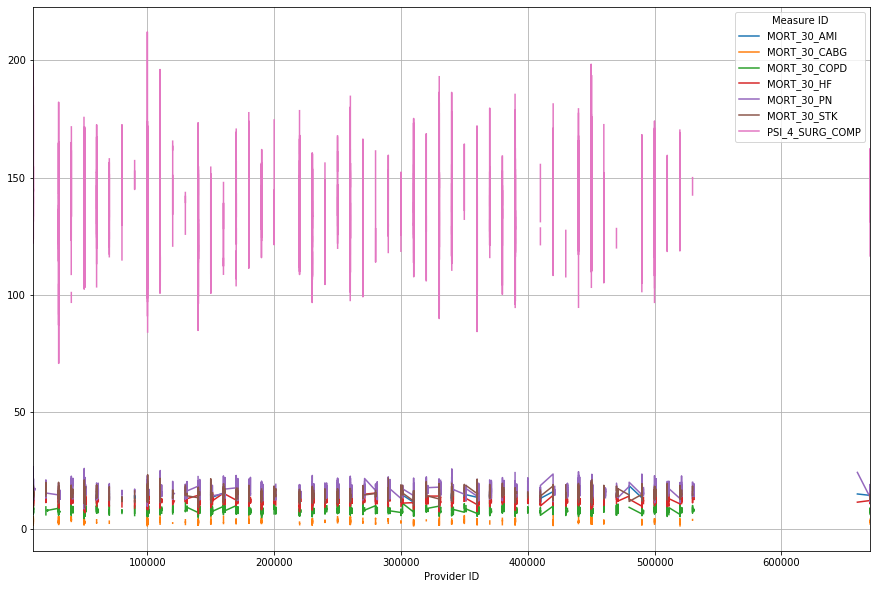

In [20]:
# plot line graph for each measure
df_mortality_final.plot(x="Provider ID", y=['MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD',
       'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK', 'PSI_4_SURG_COMP'] ,figsize=(15,10), grid=True  )
plt.show()

In [21]:
# as mortality is negative measure Lower is Better.
# Thus, we need to scale it in reverse direction (for the same we will multiply it by -1)

# -1 indicates bad, i.e. (mu - x) / sigma

df_mortality_final.iloc[:,1:] = (df_mortality_final.iloc[:,1:].mean() - df_mortality_final.iloc[:,1:])/df_mortality_final.iloc[:,1:].std()
df_mortality_final.head()

Measure ID,Provider ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_4_SURG_COMP
0,10001,1.249254,-0.995579,-1.093980,-0.165533,0.427653,-0.282009,-1.711558
1,10005,-1.545741,NaN,0.433948,-2.286130,-2.103406,-0.342103,-2.297783
2,10006,-2.104740,-0.880934,0.883338,-2.354537,-0.861754,-1.784350,-3.345272
3,10007,NaN,NaN,-1.093980,-1.533660,-1.148289,-1.003133,NaN
4,10008,NaN,NaN,-0.105321,-0.370752,0.332141,NaN,NaN


In [22]:
# Outlier imputation: According to the CMS documentation, they've trimmed the 
# measures at the 0.125th and the 99.875th percentiles

# lets check what are the values at this percentailes for each columns.

print(df_mortality_final.iloc[:,1:].quantile(0.00126)) 
print(df_mortality_final.iloc[:,1:].quantile(0.99876)) 
df_mortality_final.iloc[:,1:].describe()

Measure ID
MORT_30_AMI       -3.619589
MORT_30_CABG      -4.020691
MORT_30_COPD      -3.970079
MORT_30_HF        -3.038600
MORT_30_PN        -3.767714
MORT_30_STK       -3.963286
PSI_4_SURG_COMP   -3.332063
Name: 0.00126, dtype: float64
Measure ID
MORT_30_AMI        2.935862
MORT_30_CABG       2.181709
MORT_30_COPD       2.411266
MORT_30_HF         3.153197
MORT_30_PN         2.764447
MORT_30_STK        3.168268
PSI_4_SURG_COMP    2.840020
Name: 0.99876, dtype: float64


Measure ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_4_SURG_COMP
count,2.388000e+03,1.038000e+03,3.591000e+03,3.618000e+03,4.088000e+03,2.676000e+03,1.818000e+03
mean,-6.765480e-16,3.919205e-15,1.517693e-14,1.417349e-14,-1.012594e-14,-2.335952e-14,1.651503e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.740021e+00,-5.696027e+00,-5.408128e+00,-3.927883e+00,-4.968755e+00,-5.029407e+00,-4.096660e+00
25%,-6.673142e-01,-5.369984e-01,-5.547113e-01,-6.443774e-01,-6.229752e-01,-5.824772e-01,-6.178887e-01
50%,5.139874e-02,1.508720e-01,7.443538e-02,3.968628e-02,4.560634e-02,7.855290e-02,6.422874e-02
75%,6.103977e-01,7.240974e-01,6.137039e-01,6.553436e-01,6.664320e-01,6.794894e-01,6.693329e-01
max,3.724821e+00,2.214483e+00,3.130291e+00,3.802036e+00,3.675049e+00,3.383703e+00,3.584020e+00


In [23]:
# replaceing outliers by mean values for that columns

for col in df_mortality_final.columns: 
    if col != 'Provider ID':
        df_mortality_final[col].loc[((df_mortality_final[col] <= df_mortality_final[col].quantile(0.00126)) | 
           (df_mortality_final[col] >= df_mortality_final[col].quantile(0.99876)))] = df_mortality_final[col].mean()    

In [24]:
df_mortality_final.describe()

Measure ID,Provider ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_4_SURG_COMP
count,4818.000000,2388.000000,1038.000000,3591.000000,3618.000000,4088.000000,2676.000000,1818.000000
mean,267983.546492,0.002391,0.005162,-0.000003,0.001778,0.001817,0.001517,0.000826
std,156646.082755,0.979006,0.971128,0.981096,0.980899,0.978957,0.977458,0.981025
min,10001.000000,-3.302595,-3.861706,-3.970079,-2.970194,-3.727104,-3.887628,-3.299634
25%,140185.250000,-0.667314,-0.536998,-0.554711,-0.644377,-0.587158,-0.582477,-0.614086
50%,260037.000000,0.051399,0.150872,0.074435,0.039686,0.045606,0.078553,0.060154
75%,390209.250000,0.610398,0.724097,0.613704,0.655344,0.666432,0.679489,0.660776
max,670112.000000,2.926251,2.099838,2.321388,3.117973,2.719932,2.963048,2.820135


In [25]:
df_mortality_final.head()

Measure ID,Provider ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_4_SURG_COMP
0,10001,1.249254,-0.995579,-1.093980,-0.165533,0.427653,-0.282009,-1.711558e+00
1,10005,-1.545741,NaN,0.433948,-2.286130,-2.103406,-0.342103,-2.297783e+00
2,10006,-2.104740,-0.880934,0.883338,-2.354537,-0.861754,-1.784350,1.651503e-15
3,10007,NaN,NaN,-1.093980,-1.533660,-1.148289,-1.003133,NaN
4,10008,NaN,NaN,-0.105321,-0.370752,0.332141,NaN,NaN


In [26]:
# all numeric (float) variables in the dataset
df_mortality_final_numeric = df_mortality_final.select_dtypes(include=['float64'])
df_mortality_final_numeric.head()

Measure ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_4_SURG_COMP
0,1.249254,-0.995579,-1.093980,-0.165533,0.427653,-0.282009,-1.711558e+00
1,-1.545741,NaN,0.433948,-2.286130,-2.103406,-0.342103,-2.297783e+00
2,-2.104740,-0.880934,0.883338,-2.354537,-0.861754,-1.784350,1.651503e-15
3,NaN,NaN,-1.093980,-1.533660,-1.148289,-1.003133,NaN
4,NaN,NaN,-0.105321,-0.370752,0.332141,NaN,NaN


In [27]:
# correlation matrix
cor = df_mortality_final_numeric.corr()
cor

Measure ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_4_SURG_COMP
Measure ID,,,,,,,
MORT_30_AMI,1.000000,0.327637,0.187080,0.297494,0.304766,0.240363,0.187216
MORT_30_CABG,0.327637,1.000000,0.153658,0.184675,0.220265,0.119730,0.135302
MORT_30_COPD,0.187080,0.153658,1.000000,0.363624,0.331178,0.285506,0.137091
MORT_30_HF,0.297494,0.184675,0.363624,1.000000,0.381795,0.317898,0.111743
MORT_30_PN,0.304766,0.220265,0.331178,0.381795,1.000000,0.260654,0.168407
MORT_30_STK,0.240363,0.119730,0.285506,0.317898,0.260654,1.000000,0.130995
PSI_4_SURG_COMP,0.187216,0.135302,0.137091,0.111743,0.168407,0.130995,1.000000


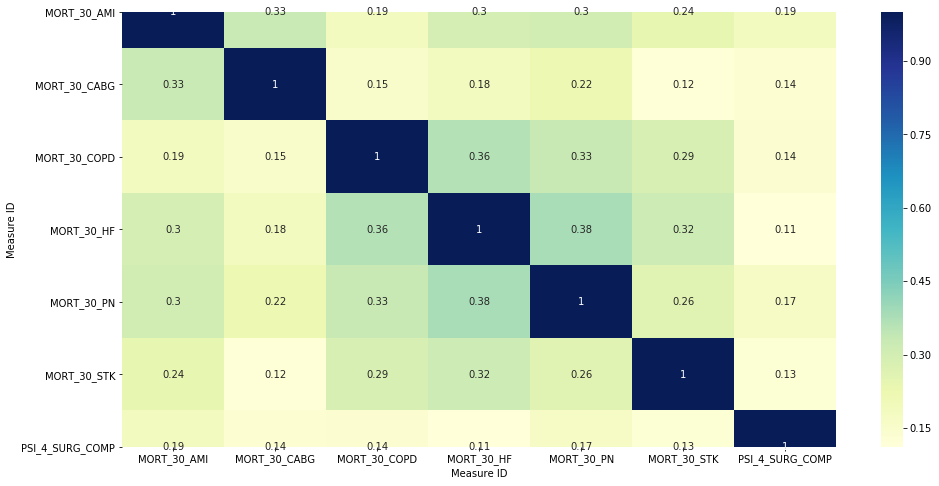

In [28]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [29]:
# Consider 2nd group Safety of Care
# Reading relevant csv File 

df = pd.read_csv(r"E:\DataScience\HealthCare\Case Study\Healthcare Associated Infections - Hospital.csv")

In [30]:
print(df.shape)
df.head()

(231264, 15)


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,NaN,1.03,NaN,1/1/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,NaN,2.765,NaN,1/1/2015,12/31/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Number of Device Days,HAI_1_DOPC_DAYS,NaN,7117,NaN,1/1/2015,12/31/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Predicted Cases,HAI_1_ELIGCASES,NaN,9.198,NaN,1/1/2015,12/31/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Observed Cases,HAI_1_NUMERATOR,NaN,16,NaN,1/1/2015,12/31/2015


In [31]:
# There are in total of (rows, columns) = (231264, 15)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231264 entries, 0 to 231263
Data columns (total 15 columns):
Provider ID             231264 non-null int64
Hospital Name           231264 non-null object
Address                 231264 non-null object
City                    231264 non-null object
State                   231264 non-null object
ZIP Code                231264 non-null int64
County Name             230544 non-null object
Phone Number            231264 non-null int64
Measure Name            231264 non-null object
Measure ID              231264 non-null object
Compared to National    38544 non-null object
Score                   231264 non-null object
Footnote                103373 non-null object
Measure Start Date      231264 non-null object
Measure End Date        231264 non-null object
dtypes: int64(3), object(12)
memory usage: 26.5+ MB


In [32]:
df["Measure ID"].unique()

array(['HAI_1_CI_LOWER', 'HAI_1_CI_UPPER', 'HAI_1_DOPC_DAYS',
       'HAI_1_ELIGCASES', 'HAI_1_NUMERATOR', 'HAI_1_SIR',
       'HAI_1a_CI_LOWER', 'HAI_1a_CI_UPPER', 'HAI_1a_DOPC_DAYS',
       'HAI_1a_ELIGCASES', 'HAI_1a_NUMERATOR', 'HAI_1a_SIR',
       'HAI_2_CI_LOWER', 'HAI_2_CI_UPPER', 'HAI_2_DOPC_DAYS',
       'HAI_2_ELIGCASES', 'HAI_2_NUMERATOR', 'HAI_2_SIR',
       'HAI_2a_CI_LOWER', 'HAI_2a_CI_UPPER', 'HAI_2a_DOPC_DAYS',
       'HAI_2a_ELIGCASES', 'HAI_2a_NUMERATOR', 'HAI_2a_SIR',
       'HAI_3_CI_LOWER', 'HAI_3_CI_UPPER', 'HAI_3_DOPC_DAYS',
       'HAI_3_ELIGCASES', 'HAI_3_NUMERATOR', 'HAI_3_SIR',
       'HAI_4_CI_LOWER', 'HAI_4_CI_UPPER', 'HAI_4_DOPC_DAYS',
       'HAI_4_ELIGCASES', 'HAI_4_NUMERATOR', 'HAI_4_SIR',
       'HAI_5_CI_LOWER', 'HAI_5_CI_UPPER', 'HAI_5_DOPC_DAYS',
       'HAI_5_ELIGCASES', 'HAI_5_NUMERATOR', 'HAI_5_SIR',
       'HAI_6_CI_LOWER', 'HAI_6_CI_UPPER', 'HAI_6_DOPC_DAYS',
       'HAI_6_ELIGCASES', 'HAI_6_NUMERATOR', 'HAI_6_SIR'], dtype=object)

In [33]:
df.Score.replace("Not Available", np.nan, inplace = True)
df.Score = df.Score.astype('float')

In [34]:
# Normalise the Score for each group of Measure ID and PLot them and then check the variance

df["NormalisedScore"] = (df.Score -df.Score.mean())/df.Score.std()

In [35]:
df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Footnote,Measure Start Date,Measure End Date,NormalisedScore
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,NaN,1.030,NaN,1/1/2015,12/31/2015,-0.173207
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,NaN,2.765,NaN,1/1/2015,12/31/2015,-0.173098
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Number of Device Days,HAI_1_DOPC_DAYS,NaN,7117.000,NaN,1/1/2015,12/31/2015,0.275919
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Predicted Cases,HAI_1_ELIGCASES,NaN,9.198,NaN,1/1/2015,12/31/2015,-0.172692
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Observed Cases,HAI_1_NUMERATOR,NaN,16.000,NaN,1/1/2015,12/31/2015,-0.172262


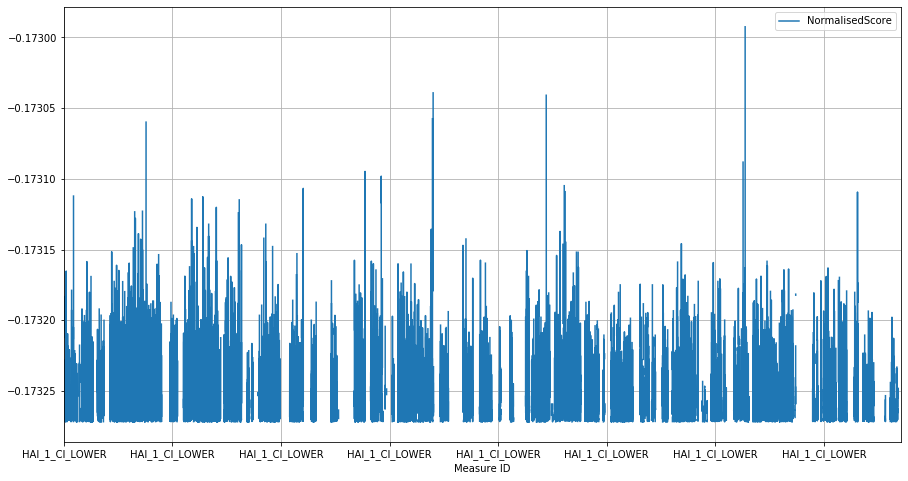

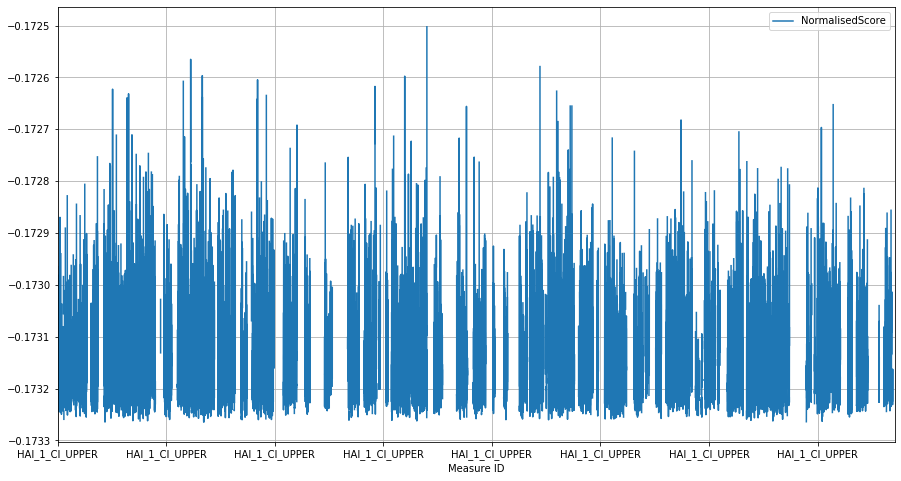

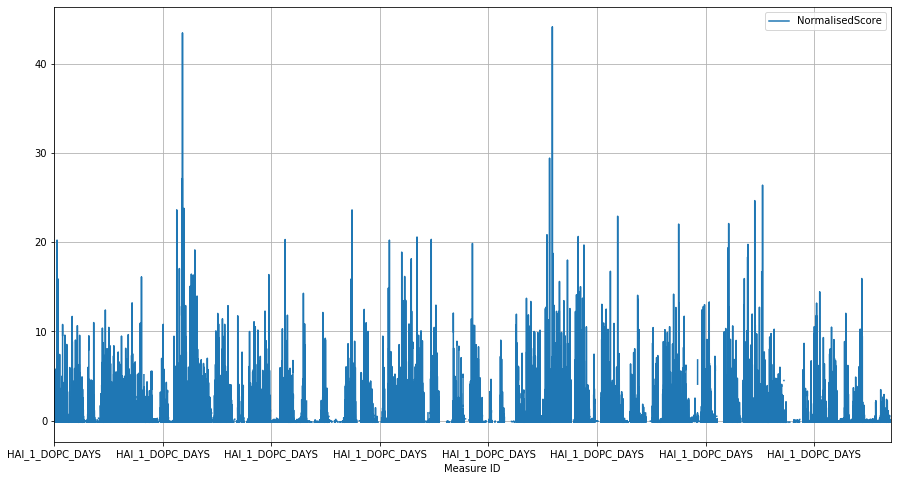

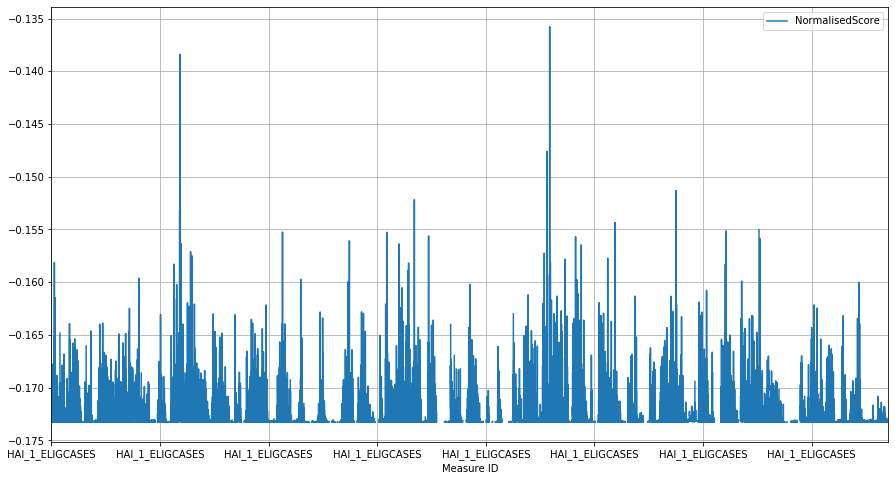

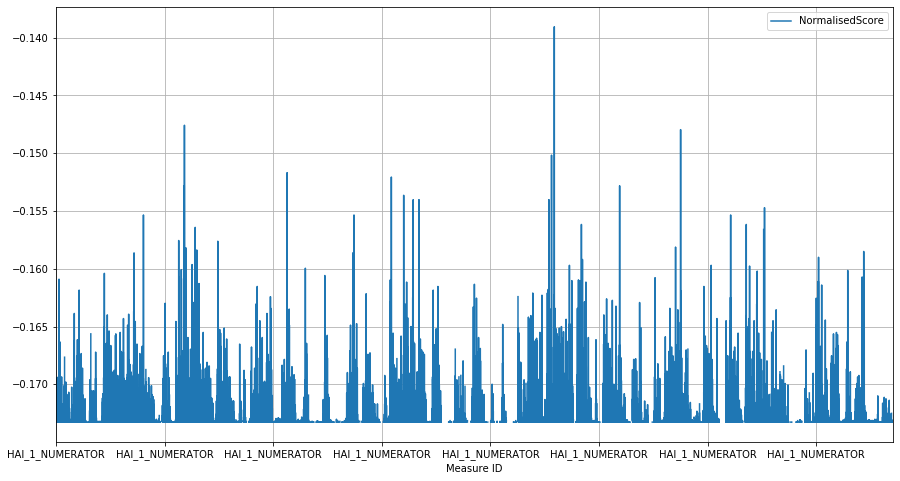

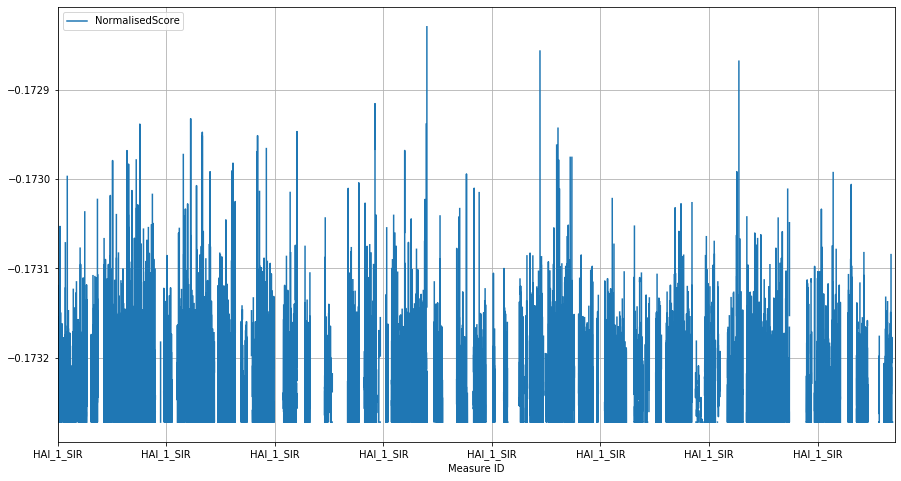

In [36]:
# Plotting each group of Measure Id and Plotting them 

df.loc[df["Measure ID"].str.endswith("_CI_LOWER")].plot(x='Measure ID', y='NormalisedScore' ,figsize=(15,8), grid=True)
df.loc[df["Measure ID"].str.endswith("_CI_UPPER")].plot(x='Measure ID', y='NormalisedScore' ,figsize=(15,8), grid=True)
df.loc[df["Measure ID"].str.endswith("_DOPC_DAYS")].plot(x='Measure ID', y='NormalisedScore' ,figsize=(15,8), grid=True)
df.loc[df["Measure ID"].str.endswith("_ELIGCASES")].plot(x='Measure ID', y='NormalisedScore' ,figsize=(15,8), grid=True)
df.loc[df["Measure ID"].str.endswith("_NUMERATOR")].plot(x='Measure ID', y='NormalisedScore' ,figsize=(15,8), grid=True)
df.loc[df["Measure ID"].str.endswith("_SIR")].plot(x='Measure ID', y='NormalisedScore' ,figsize=(15,8), grid=True)

In [37]:
# check the variance for each measure group and select the suitable once

print("Variance for Measure _CI_Lower = " + str(df.loc[df["Measure ID"].str.endswith("_CI_LOWER")].NormalisedScore.var()))
print("Variance for Measure _CI_UPPER = " + str(df.loc[df["Measure ID"].str.endswith("_CI_UPPER")].NormalisedScore.var()))
print("Variance for Measure _DOPC_DAYS = " + str(df.loc[df["Measure ID"].str.endswith("_DOPC_DAYS")].NormalisedScore.var()))
print("Variance for Measure _ELIGCASES = " + str(df.loc[df["Measure ID"].str.endswith("_ELIGCASES")].NormalisedScore.var()))
print("Variance for Measure _NUMERATOR = " + str(df.loc[df["Measure ID"].str.endswith("_NUMERATOR")].NormalisedScore.var()))
print("Variance for Measure _SIR = " + str(df.loc[df["Measure ID"].str.endswith("_SIR")].NormalisedScore.var()))

Variance for Measure _CI_Lower = 5.14420161835679e-10
Variance for Measure _CI_UPPER = 6.787974414953455e-09
Variance for Measure _DOPC_DAYS = 4.286837723567999
Variance for Measure _ELIGCASES = 1.8094528132817802e-06
Variance for Measure _NUMERATOR = 1.5739868923131902e-06
Variance for Measure _SIR = 1.676023093971518e-09


In [38]:
df.loc[df["Measure ID"].str.endswith("_SIR")]["Measure ID"].unique()

array(['HAI_1_SIR', 'HAI_1a_SIR', 'HAI_2_SIR', 'HAI_2a_SIR', 'HAI_3_SIR',
       'HAI_4_SIR', 'HAI_5_SIR', 'HAI_6_SIR'], dtype=object)

In [39]:
# We will be condidering measure which end with _SIR

df_safety = df.loc[df["Measure ID"].isin(['HAI_1_SIR', 'HAI_2_SIR', 'HAI_3_SIR', 'HAI_4_SIR', 'HAI_5_SIR', 'HAI_6_SIR'])]
print(df_safety.shape)
df_safety.head()

(28908, 16)


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Footnote,Measure Start Date,Measure End Date,NormalisedScore
5,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Central line-associated bloodstream infections...,HAI_1_SIR,Worse than the National Benchmark,1.740,NaN,1/1/2015,12/31/2015,-0.173162
17,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Catheter-associated urinary tract infections (...,HAI_2_SIR,No Different than National Benchmark,1.427,NaN,1/1/2015,12/31/2015,-0.173182
29,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Surgical Site Infection from colon surgery (SS...,HAI_3_SIR,No Different than National Benchmark,1.870,NaN,1/1/2015,12/31/2015,-0.173154
35,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Surgical Site Infection from abdominal hystere...,HAI_4_SIR,No Different than National Benchmark,0.000,NaN,1/1/2015,12/31/2015,-0.173272
41,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Methicillin-resistant Staphylococcus Aureus (M...,HAI_5_SIR,No Different than National Benchmark,0.422,NaN,1/1/2015,12/31/2015,-0.173245


In [40]:
# deleteing the normalised Score columns as no longer needed

df_safety.drop("NormalisedScore",axis=1,inplace = True)

In [41]:
# There are some other csv which contains data related to safety importing them and selecting the required measure 

df = pd.read_csv(r"E:\DataScience\HealthCare\Case Study\Complications - Hospital.csv")

In [42]:
# Measure like below are relavent to safety 
# "PSI_90_SAFETY" - Serious complications
# "COMP_HIP_KNEE" - Rate of complications for hip/knee replacement patients

# Selecting this measures and appending then 

df_safety = df_safety.append(df.loc[df["Measure ID"].isin(["PSI_90_SAFETY","COMP_HIP_KNEE"])], ignore_index = True)

In [43]:
print(df_safety.shape)

df_safety.head()

(38544, 18)


,Address,City,Compared to National,County Name,Denominator,Footnote,Higher Estimate,Hospital Name,Lower Estimate,Measure End Date,Measure ID,Measure Name,Measure Start Date,Phone Number,Provider ID,Score,State,ZIP Code
0,1108 ROSS CLARK CIRCLE,DOTHAN,Worse than the National Benchmark,HOUSTON,NaN,NaN,NaN,SOUTHEAST ALABAMA MEDICAL CENTER,NaN,12/31/2015,HAI_1_SIR,Central line-associated bloodstream infections...,1/1/2015,3347938701,10001,1.74,AL,36301
1,1108 ROSS CLARK CIRCLE,DOTHAN,No Different than National Benchmark,HOUSTON,NaN,NaN,NaN,SOUTHEAST ALABAMA MEDICAL CENTER,NaN,12/31/2015,HAI_2_SIR,Catheter-associated urinary tract infections (...,1/1/2015,3347938701,10001,1.427,AL,36301
2,1108 ROSS CLARK CIRCLE,DOTHAN,No Different than National Benchmark,HOUSTON,NaN,NaN,NaN,SOUTHEAST ALABAMA MEDICAL CENTER,NaN,12/31/2015,HAI_3_SIR,Surgical Site Infection from colon surgery (SS...,1/1/2015,3347938701,10001,1.87,AL,36301
3,1108 ROSS CLARK CIRCLE,DOTHAN,No Different than National Benchmark,HOUSTON,NaN,NaN,NaN,SOUTHEAST ALABAMA MEDICAL CENTER,NaN,12/31/2015,HAI_4_SIR,Surgical Site Infection from abdominal hystere...,1/1/2015,3347938701,10001,0,AL,36301
4,1108 ROSS CLARK CIRCLE,DOTHAN,No Different than National Benchmark,HOUSTON,NaN,NaN,NaN,SOUTHEAST ALABAMA MEDICAL CENTER,NaN,12/31/2015,HAI_5_SIR,Methicillin-resistant Staphylococcus Aureus (M...,1/1/2015,3347938701,10001,0.422,AL,36301


In [44]:
# Finally we are left with (rows,columns) = (38544, 18) 

df_safety["Measure ID"].unique()

array(['HAI_1_SIR', 'HAI_2_SIR', 'HAI_3_SIR', 'HAI_4_SIR', 'HAI_5_SIR',
       'HAI_6_SIR', 'COMP_HIP_KNEE', 'PSI_90_SAFETY'], dtype=object)

In [45]:
# required df is not in format as required therefore pivot it as before

df_safety_final = df_safety[["Provider ID", "Measure ID", "Score"]].pivot(index = "Provider ID", columns = "Measure ID")

In [46]:
print(df_safety_final.shape)
df_safety_final.head()

(4818, 8)


Score                                                    \
Measure ID   COMP_HIP_KNEE HAI_1_SIR HAI_2_SIR HAI_3_SIR HAI_4_SIR HAI_5_SIR   
Provider ID                                                                    
10001                  3.8      1.74     1.427      1.87         0     0.422   
10005                    3     1.062     0.456     0.386       NaN     1.388   
10006                  3.8     0.341     0.641      0.31       NaN     1.261   
10007        Not Available       NaN         0       NaN       NaN       NaN   
10008        Not Available       NaN       NaN       NaN       NaN       NaN   

                                     
Measure ID  HAI_6_SIR PSI_90_SAFETY  
Provider ID                          
10001           0.787          0.68  
10005           0.405          0.85  
10006           0.513          0.91  
10007               0          0.79  
10008           0.585           0.9

In [47]:
# There are string values avaliable in safety df
# replace them with nan

df_safety_final.replace("Not Available", np.nan, inplace = True)

# The columns contains multiple level dropping the unnecessary one and reset int index

df_safety_final.columns = df_safety_final.columns.droplevel()
df_safety_final.reset_index(inplace = True)

# Print final df

df_safety_final.head()

Measure ID,Provider ID,COMP_HIP_KNEE,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_4_SIR,HAI_5_SIR,HAI_6_SIR,PSI_90_SAFETY
0,10001,3.8,1.740,1.427,1.870,0.0,0.422,0.787,0.68
1,10005,3,1.062,0.456,0.386,NaN,1.388,0.405,0.85
2,10006,3.8,0.341,0.641,0.310,NaN,1.261,0.513,0.91
3,10007,NaN,NaN,0.000,NaN,NaN,NaN,0.000,0.79
4,10008,NaN,NaN,NaN,NaN,NaN,NaN,0.585,0.9


Finally we are left with 7 Measure for mortality as required.
The final dataframe contains 4818 data records and 7 features. 

In [48]:
# Converting all columns with df measure to float

df_safety_final.iloc[:,1:] = df_safety_final.iloc[:,1:].astype(float)
df_safety_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 9 columns):
Provider ID      4818 non-null int64
COMP_HIP_KNEE    2714 non-null float64
HAI_1_SIR        2375 non-null float64
HAI_2_SIR        2889 non-null float64
HAI_3_SIR        2043 non-null float64
HAI_4_SIR        856 non-null float64
HAI_5_SIR        1830 non-null float64
HAI_6_SIR        3272 non-null float64
PSI_90_SAFETY    3224 non-null float64
dtypes: float64(8), int64(1)
memory usage: 338.8 KB


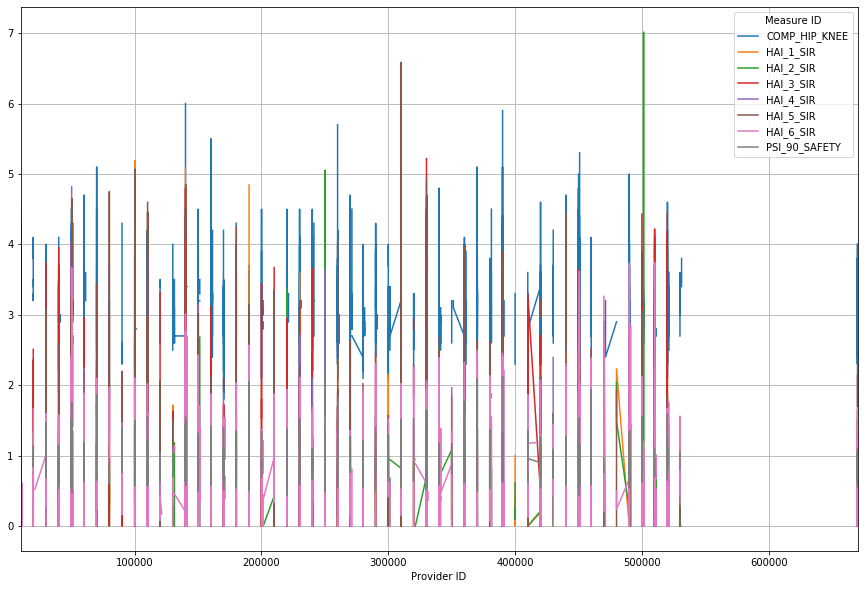

In [49]:
# plot line graph for each measure
df_safety_final.plot(x="Provider ID", y=['COMP_HIP_KNEE', 'HAI_1_SIR', 'HAI_2_SIR', 'HAI_3_SIR',
       'HAI_4_SIR', 'HAI_5_SIR', 'HAI_6_SIR', 'PSI_90_SAFETY'] ,figsize=(15,10), grid=True  )
plt.show()

In [50]:
# The HAI measures show how often patients in a particular hospital contract certain infections during the course 
# of their medical treatment, when compared to like hospitals.Thus, lower is better.
# Thus, we need to scale it in reverse direction (for the same we will multiply it by -1)

# -1 indicates bad, i.e. (mu - x) / sigma

df_safety_final.iloc[:,1:] = (df_safety_final.iloc[:,1:].mean() - df_safety_final.iloc[:,1:])/df_safety_final.iloc[:,1:].std()
df_safety_final.head()

Measure ID,Provider ID,COMP_HIP_KNEE,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_4_SIR,HAI_5_SIR,HAI_6_SIR,PSI_90_SAFETY
0,10001,-1.354968,-2.351227,-2.087871,-1.134824,1.017667,0.646805,0.056641,1.210759
1,10005,0.074460,-1.023000,0.050027,0.722932,NaN,-0.456856,0.798422,0.230418
2,10006,-1.354968,0.389466,-0.357296,0.818073,NaN,-0.311757,0.588703,-0.115585
3,10007,NaN,NaN,1.054025,NaN,NaN,NaN,1.584864,0.576421
4,10008,NaN,NaN,NaN,NaN,NaN,NaN,0.448891,-0.057918


In [51]:
# Outlier imputation: According to the CMS documentation, they've trimmed the 
# measures at the 0.125th and the 99.875th percentiles

# lets check what are the values at this percentailes for each columns.

print(df_safety_final.iloc[:,1:].quantile(0.00126)) 
print(df_safety_final.iloc[:,1:].quantile(0.99876)) 
df_safety_final.iloc[:,1:].describe()

Measure ID
COMP_HIP_KNEE   -4.242993
HAI_1_SIR       -7.494134
HAI_2_SIR       -5.686885
HAI_3_SIR       -4.491285
HAI_4_SIR       -4.403611
HAI_5_SIR       -5.801652
HAI_6_SIR       -4.714477
PSI_90_SAFETY   -6.030684
Name: 0.00126, dtype: float64
Measure ID
COMP_HIP_KNEE    2.510900
HAI_1_SIR        1.057497
HAI_2_SIR        1.054025
HAI_3_SIR        1.206148
HAI_4_SIR        1.017667
HAI_5_SIR        1.128943
HAI_6_SIR        1.584864
PSI_90_SAFETY    2.306636
Name: 0.99876, dtype: float64


Measure ID,COMP_HIP_KNEE,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_4_SIR,HAI_5_SIR,HAI_6_SIR,PSI_90_SAFETY
count,2.714000e+03,2.375000e+03,2.889000e+03,2.043000e+03,8.560000e+02,1.830000e+03,3.272000e+03,3.224000e+03
mean,1.692305e-14,-1.524488e-15,-4.786852e-17,-1.211407e-16,-6.104930e-16,1.549459e-15,-6.389551e-16,7.956009e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.285897e+00,-9.109904e+00,-1.438905e+01,-5.323536e+00,-4.615114e+00,-6.888024e+00,-5.679538e+00,-7.208643e+00
25%,-6.402539e-01,-4.019853e-01,-4.871994e-01,-5.577178e-01,-5.474487e-01,-4.477157e-01,-5.783390e-01,-4.039204e-01
50%,7.446038e-02,1.504631e-01,1.292905e-01,1.646035e-01,2.012121e-01,1.886602e-01,3.625153e-02,8.625029e-02
75%,6.104961e-01,6.539355e-01,7.788066e-01,7.072834e-01,1.017667e+00,6.399502e-01,6.299674e-01,5.764210e-01
max,2.754639e+00,1.057497e+00,1.054025e+00,1.206148e+00,1.017667e+00,1.128943e+00,1.584864e+00,2.594771e+00


In [52]:
# replaceing outliers by mean values for that columns

for col in df_safety_final.columns: 
    if col != 'Provider ID':
        df_safety_final[col].loc[((df_safety_final[col] <= df_safety_final[col].quantile(0.00126)) | 
           (df_safety_final[col] >= df_safety_final[col].quantile(0.99876)))] = df_safety_final[col].mean()    

df_safety_final.describe()

Measure ID,Provider ID,COMP_HIP_KNEE,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_4_SIR,HAI_5_SIR,HAI_6_SIR,PSI_90_SAFETY
count,4818.000000,2714.000000,2.375000e+03,2.889000e+03,2.043000e+03,8.560000e+02,1.830000e+03,3.272000e+03,3224.000000
mean,267983.546492,0.003336,-1.807735e-01,-2.215528e-01,-2.100171e-01,-2.628960e-01,-1.768989e-01,-1.651273e-01,0.007460
std,156646.082755,0.976992,8.160815e-01,7.526384e-01,8.110701e-01,7.775335e-01,8.292156e-01,8.079510e-01,0.959220
min,10001.000000,-4.035147,-7.485862e+00,-5.306829e+00,-4.353347e+00,-4.334586e+00,-4.914915e+00,-4.405695e+00,-5.651630
25%,140185.250000,-0.640254,-3.951286e-01,-4.827959e-01,-5.527103e-01,-5.351756e-01,-4.462876e-01,-5.744554e-01,-0.403920
50%,260037.000000,0.074460,-1.524488e-15,-4.786852e-17,-1.211407e-16,-6.104930e-16,1.549459e-15,-6.389551e-16,0.057417
75%,390209.250000,0.610496,2.640872e-01,1.909395e-01,3.110708e-01,1.538729e-01,3.437555e-01,3.401486e-01,0.576421
max,670112.000000,2.397282,9.830537e-01,9.747623e-01,1.112259e+00,9.148069e-01,1.018120e+00,1.501366e+00,2.306435


In [53]:
df_safety_final.head()

Measure ID,Provider ID,COMP_HIP_KNEE,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_4_SIR,HAI_5_SIR,HAI_6_SIR,PSI_90_SAFETY
0,10001,-1.354968,-2.351227,-2.087871e+00,-1.134824,-6.104930e-16,0.646805,5.664079e-02,1.210759
1,10005,0.074460,-1.023000,5.002750e-02,0.722932,NaN,-0.456856,7.984215e-01,0.230418
2,10006,-1.354968,0.389466,-3.572962e-01,0.818073,NaN,-0.311757,5.887034e-01,-0.115585
3,10007,NaN,NaN,-4.786852e-17,NaN,NaN,NaN,-6.389551e-16,0.576421
4,10008,NaN,NaN,NaN,NaN,NaN,NaN,4.488913e-01,-0.057918


In [54]:
# all numeric (float) variables in the dataset
df_safety_final_numeric = df_safety_final.select_dtypes(include=['float64'])
df_safety_final_numeric.head()

Measure ID,COMP_HIP_KNEE,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_4_SIR,HAI_5_SIR,HAI_6_SIR,PSI_90_SAFETY
0,-1.354968,-2.351227,-2.087871e+00,-1.134824,-6.104930e-16,0.646805,5.664079e-02,1.210759
1,0.074460,-1.023000,5.002750e-02,0.722932,NaN,-0.456856,7.984215e-01,0.230418
2,-1.354968,0.389466,-3.572962e-01,0.818073,NaN,-0.311757,5.887034e-01,-0.115585
3,NaN,NaN,-4.786852e-17,NaN,NaN,NaN,-6.389551e-16,0.576421
4,NaN,NaN,NaN,NaN,NaN,NaN,4.488913e-01,-0.057918


In [55]:
# correlation matrix
cor = df_safety_final_numeric.corr()
cor

Measure ID,COMP_HIP_KNEE,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_4_SIR,HAI_5_SIR,HAI_6_SIR,PSI_90_SAFETY
Measure ID,,,,,,,,
COMP_HIP_KNEE,1.000000,-0.001607,0.006199,-0.003193,0.017011,0.033577,0.010848,0.136946
HAI_1_SIR,-0.001607,1.000000,0.211730,0.082069,0.078394,0.208462,-0.043059,0.032974
HAI_2_SIR,0.006199,0.211730,1.000000,0.150355,0.137884,0.075081,0.022600,0.103632
HAI_3_SIR,-0.003193,0.082069,0.150355,1.000000,0.185295,0.032212,0.014902,0.095092
HAI_4_SIR,0.017011,0.078394,0.137884,0.185295,1.000000,-0.017868,-0.027387,0.105182
HAI_5_SIR,0.033577,0.208462,0.075081,0.032212,-0.017868,1.000000,0.084044,-0.049642
HAI_6_SIR,0.010848,-0.043059,0.022600,0.014902,-0.027387,0.084044,1.000000,0.029024
PSI_90_SAFETY,0.136946,0.032974,0.103632,0.095092,0.105182,-0.049642,0.029024,1.000000


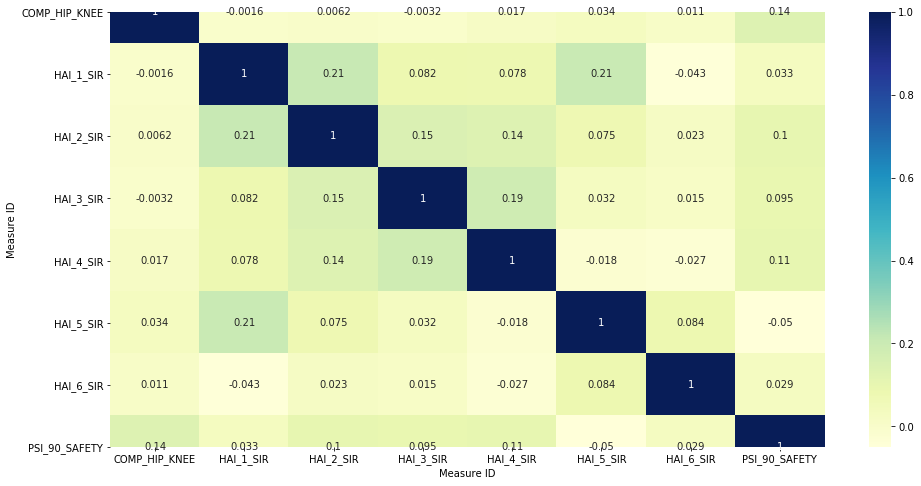

In [56]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [57]:
# Consider 3rd group Readmission
# Reading relevant csv File 

df = pd.read_csv(r"E:\DataScience\HealthCare\Case Study\Readmissions and Deaths - Hospital.csv")

In [58]:
# this file contains values for both Death and readmission 

df_readmission = df.loc[df["Measure ID"].str.startswith("READM")]

In [59]:
print(df_readmission.shape)
df_readmission.head()

(38544, 18)


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
6,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Myocardial Infarction (AMI) 30-Day Readm...,READM_30_AMI,No Different than the National Rate,781,16.5,14.6,18.8,NaN,07/01/2012,06/30/2015
7,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Rate of readmission for CABG,READM_30_CABG,No Different than the National Rate,273,15.1,12.3,18.5,NaN,07/01/2012,06/30/2015
8,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Rate of readmission for chronic obstructive pu...,READM_30_COPD,No Different than the National Rate,707,21.1,18.7,23.8,NaN,07/01/2012,06/30/2015
9,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart failure (HF) 30-Day Readmission Rate,READM_30_HF,No Different than the National Rate,981,21.4,19.2,23.7,NaN,07/01/2012,06/30/2015
10,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Rate of readmission after hip/knee replacement,READM_30_HIP_KNEE,No Different than the National Rate,335,5.1,3.8,6.8,NaN,07/01/2012,06/30/2015


In [60]:
# get all the unique values for measure ID

df_readmission["Measure ID"].unique()

array(['READM_30_AMI', 'READM_30_CABG', 'READM_30_COPD', 'READM_30_HF',
       'READM_30_HIP_KNEE', 'READM_30_HOSP_WIDE', 'READM_30_PN',
       'READM_30_STK'], dtype=object)

In [61]:
# pivot the table and turn it into the frm required

df_readmission_final = df_readmission[["Provider ID", "Measure ID", "Score"]].pivot(index = "Provider ID", columns = "Measure ID")

In [62]:
print(df_readmission_final.shape)
df_readmission_final.head()

(4818, 8)


Score                                           \
Measure ID    READM_30_AMI  READM_30_CABG READM_30_COPD READM_30_HF   
Provider ID                                                           
10001                 16.5           15.1          21.1        21.4   
10005                 16.7  Not Available          18.0        21.9   
10006                 16.1           15.2          19.8        20.6   
10007        Not Available  Not Available          19.9        21.1   
10008        Not Available  Not Available          19.2        23.1   

                                                                             
Measure ID  READM_30_HIP_KNEE READM_30_HOSP_WIDE READM_30_PN   READM_30_STK  
Provider ID                                                                  
10001                     5.1               15.4        18.7           12.7  
10005                     5.7               14.9        16.4           13.4  
10006                     5.0               15.4        17.9           12.0  
10007           Not Available               16.6        17.3           12.7  
10008           Not Available               15.7        16.0  Not Available

In [63]:
# There are string values avaliable in readmission df
# replace them with nan

df_readmission_final.replace("Not Available", np.nan, inplace = True)

# The columns contains multiple level dropping the unnecessary one and reset int index

df_readmission_final.columns = df_readmission_final.columns.droplevel()
df_readmission_final.reset_index(inplace = True)

# Print final df

df_readmission_final.head()

Measure ID,Provider ID,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
0,10001,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7
1,10005,16.7,NaN,18.0,21.9,5.7,14.9,16.4,13.4
2,10006,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0
3,10007,NaN,NaN,19.9,21.1,NaN,16.6,17.3,12.7
4,10008,NaN,NaN,19.2,23.1,NaN,15.7,16.0,NaN


In [64]:
# Converting all columns with df measure to float

df_readmission_final.iloc[:,1:] = df_readmission_final.iloc[:,1:].astype(float)
df_readmission_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 9 columns):
Provider ID           4818 non-null int64
READM_30_AMI          2163 non-null float64
READM_30_CABG         1027 non-null float64
READM_30_COPD         3648 non-null float64
READM_30_HF           3650 non-null float64
READM_30_HIP_KNEE     2731 non-null float64
READM_30_HOSP_WIDE    4395 non-null float64
READM_30_PN           4089 non-null float64
READM_30_STK          2608 non-null float64
dtypes: float64(8), int64(1)
memory usage: 338.8 KB


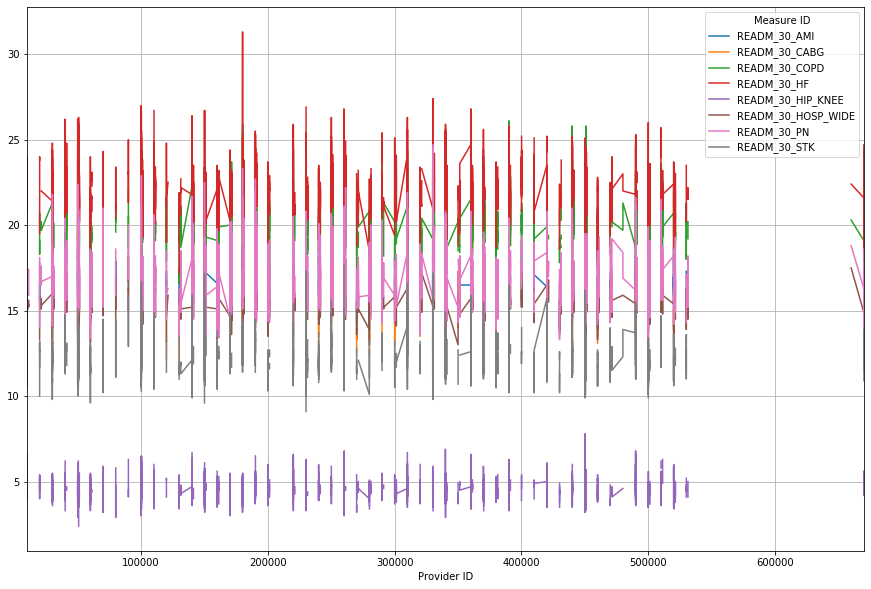

In [65]:
# plot line graph for each measure
df_readmission_final.plot(x="Provider ID", y=['READM_30_AMI', 'READM_30_CABG', 'READM_30_COPD',
       'READM_30_HF', 'READM_30_HIP_KNEE', 'READM_30_HOSP_WIDE', 'READM_30_PN',
       'READM_30_STK'] ,figsize=(15,10), grid=True  )
plt.show()

In [66]:
# as readmission is negative measure Lower is Better.
# Thus, we need to scale it in reverse direction (for the same we will multiply it by -1)

# -1 indicates bad, i.e. (mu - x) / sigma

df_readmission_final.iloc[:,1:] = (df_readmission_final.iloc[:,1:].mean() - df_readmission_final.iloc[:,1:])/df_readmission_final.iloc[:,1:].std()
df_readmission_final.head()

Measure ID,Provider ID,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
0,10001,0.408636,-0.614857,-0.866788,0.370373,-0.884008,0.215383,-1.105347,-0.124545
1,10005,0.199928,NaN,1.574335,0.036448,-1.968080,0.820556,0.495580,-0.776969
2,10006,0.826052,-0.703595,0.156909,0.904652,-0.703330,0.215383,-0.548503,0.527879
3,10007,NaN,NaN,0.078163,0.570727,NaN,-1.237030,-0.130870,-0.124545
4,10008,NaN,NaN,0.629384,-0.764971,NaN,-0.147720,0.774002,NaN


In [67]:
# Outlier imputation: According to the CMS documentation, they've trimmed the 
# measures at the 0.125th and the 99.875th percentiles

# lets check what are the values at this percentailes for each columns.

print(df_readmission_final.iloc[:,1:].quantile(0.00126)) 
print(df_readmission_final.iloc[:,1:].quantile(0.99876)) 
df_readmission_final.iloc[:,1:].describe()

Measure ID
READM_30_AMI         -3.538835
READM_30_CABG        -4.008494
READM_30_COPD        -4.112248
READM_30_HF          -3.329661
READM_30_HIP_KNEE    -3.876081
READM_30_HOSP_WIDE   -3.955894
READM_30_PN          -3.868563
READM_30_STK         -4.185966
Name: 0.00126, dtype: float64
Measure ID
READM_30_AMI          3.188446
READM_30_CABG         2.749284
READM_30_COPD         2.755524
READM_30_HF           3.207077
READM_30_HIP_KNEE     3.021322
READM_30_HOSP_WIDE    3.629252
READM_30_PN           2.718145
READM_30_STK          2.578353
Name: 0.99876, dtype: float64


Measure ID,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
count,2.163000e+03,1.027000e+03,3.648000e+03,3.650000e+03,2.731000e+03,4.395000e+03,4.089000e+03,2.608000e+03
mean,-7.821041e-15,8.507368e-15,5.763786e-15,1.324834e-14,1.584507e-15,-2.682508e-14,4.086730e-14,-2.645315e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.869883e+00,-4.874269e+00,-4.804083e+00,-6.241331e+00,-5.762329e+00,-5.231166e+00,-5.281677e+00,-4.784714e+00
25%,-6.349054e-01,-6.148568e-01,-5.518041e-01,-5.646159e-01,-5.226512e-01,-5.108232e-01,-5.485030e-01,-4.973587e-01
50%,9.557352e-02,9.504531e-02,7.816308e-02,3.644808e-02,1.938441e-02,9.434903e-02,7.794659e-02,6.186160e-02
75%,6.173442e-01,6.274719e-01,6.293844e-01,6.375121e-01,5.614201e-01,5.784868e-01,6.347906e-01,6.210819e-01
max,3.956676e+00,3.112129e+00,3.227999e+00,3.776402e+00,3.994313e+00,5.782968e+00,2.931772e+00,3.230777e+00


In [68]:
# replaceing outliers by mean values for that columns

for col in df_readmission_final.columns: 
    if col != 'Provider ID':
        df_readmission_final[col].loc[((df_readmission_final[col] <= df_readmission_final[col].quantile(0.00126)) | 
           (df_readmission_final[col] >= df_readmission_final[col].quantile(0.99876)))] = df_readmission_final[col].mean()    

In [69]:
df_readmission_final.describe()

Measure ID,Provider ID,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
count,4818.000000,2163.000000,1027.000000,3648.000000,3650.000000,2731.000000,4395.000000,4089.000000,2608.000000
mean,267983.546492,0.000266,0.003000,0.001491,0.000833,0.001663,-0.000258,0.002444,0.001502
std,156646.082755,0.980344,0.970875,0.978501,0.979569,0.976608,0.970906,0.979302,0.976972
min,10001.000000,-3.452467,-3.631941,-4.016624,-3.302796,-3.774865,-3.899787,-3.750356,-3.852680
25%,140185.250000,-0.634905,-0.526119,-0.551804,-0.564616,-0.522651,-0.510823,-0.548503,-0.497359
50%,260037.000000,0.095574,0.095045,0.078163,0.036448,0.019384,0.094349,0.077947,0.061862
75%,390209.250000,0.617344,0.627472,0.629384,0.637512,0.561420,0.578487,0.634791,0.621082
max,670112.000000,3.121843,2.490965,2.676778,3.175338,2.910241,3.362279,2.653350,2.485149


In [70]:
print(df_readmission_final.shape)
df_readmission_final.head()

(4818, 9)


Measure ID,Provider ID,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
0,10001,0.408636,-0.614857,-0.866788,0.370373,-0.884008,0.215383,-1.105347,-0.124545
1,10005,0.199928,NaN,1.574335,0.036448,-1.968080,0.820556,0.495580,-0.776969
2,10006,0.826052,-0.703595,0.156909,0.904652,-0.703330,0.215383,-0.548503,0.527879
3,10007,NaN,NaN,0.078163,0.570727,NaN,-1.237030,-0.130870,-0.124545
4,10008,NaN,NaN,0.629384,-0.764971,NaN,-0.147720,0.774002,NaN


In [71]:
# all numeric (float) variables in the dataset
df_readmission_final_numeric = df_readmission_final.select_dtypes(include=['float64'])
df_readmission_final_numeric.head()

Measure ID,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
0,0.408636,-0.614857,-0.866788,0.370373,-0.884008,0.215383,-1.105347,-0.124545
1,0.199928,NaN,1.574335,0.036448,-1.968080,0.820556,0.495580,-0.776969
2,0.826052,-0.703595,0.156909,0.904652,-0.703330,0.215383,-0.548503,0.527879
3,NaN,NaN,0.078163,0.570727,NaN,-1.237030,-0.130870,-0.124545
4,NaN,NaN,0.629384,-0.764971,NaN,-0.147720,0.774002,NaN


In [72]:
# correlation matrix
cor = df_readmission_final_numeric.corr()
cor

Measure ID,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
Measure ID,,,,,,,,
READM_30_AMI,1.000000,0.364339,0.285502,0.375340,0.209529,0.456887,0.356903,0.308299
READM_30_CABG,0.364339,1.000000,0.105007,0.235295,0.124148,0.279980,0.159571,0.151923
READM_30_COPD,0.285502,0.105007,1.000000,0.361702,0.138710,0.497127,0.360779,0.284856
READM_30_HF,0.375340,0.235295,0.361702,1.000000,0.148917,0.559825,0.431130,0.357056
READM_30_HIP_KNEE,0.209529,0.124148,0.138710,0.148917,1.000000,0.305488,0.186960,0.175308
READM_30_HOSP_WIDE,0.456887,0.279980,0.497127,0.559825,0.305488,1.000000,0.564474,0.459096
READM_30_PN,0.356903,0.159571,0.360779,0.431130,0.186960,0.564474,1.000000,0.363609
READM_30_STK,0.308299,0.151923,0.284856,0.357056,0.175308,0.459096,0.363609,1.000000


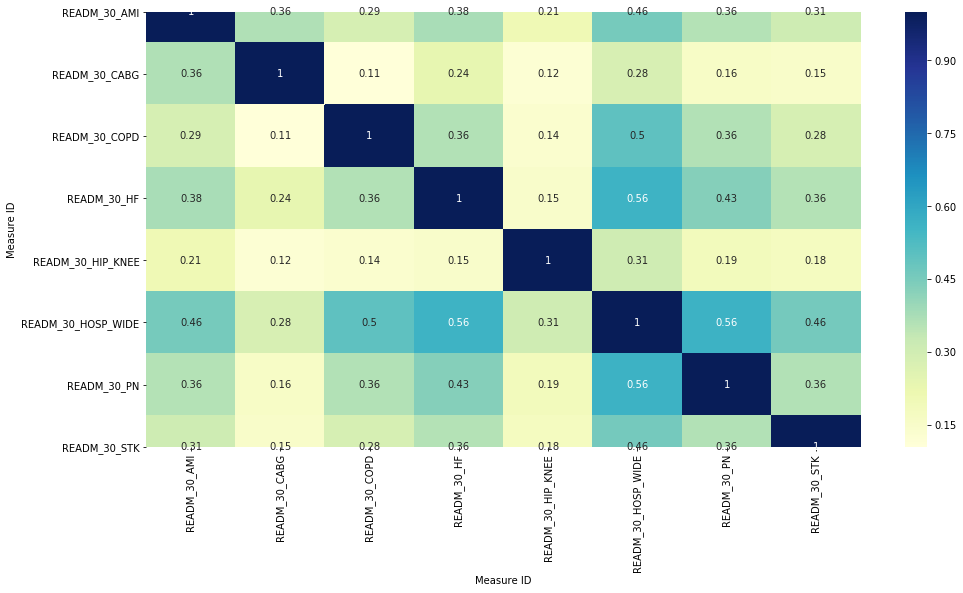

In [73]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [74]:
# Consider 4th group Patient Experience
# Reading relevant csv File 

df = pd.read_csv(r"E:\DataScience\HealthCare\Case Study\HCAHPS - Hospital.csv", engine="python", sep=',', quotechar='"', error_bad_lines=False)

In [75]:
print(df.shape)
df.head()

(264990, 22)


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_STAR_RATING,Summary star rating,Summary star rating,3,NaN,Not Applicable,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,"Room was ""always"" clean",Not Applicable,NaN,66,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_SN_P,Patients who reported that their room and bath...,"Room was ""sometimes"" or ""never"" clean",Not Applicable,NaN,12,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_U_P,Patients who reported that their room and bath...,"Room was ""usually"" clean",Not Applicable,NaN,22,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_LINEAR_SCORE,Cleanliness - linear mean score,Cleanliness - linear mean score,Not Applicable,NaN,Not Applicable,NaN,84,1194,NaN,27,NaN,01/01/2015,12/31/2015


There are total number of (rows, columns) = (264990, 22)

In [76]:
# From the above we can see that HCAHPS Linear Mean Value indicated the mean score values
# we will take all meaures where we have score for this column 
# we wont consider measure with value 'Not Applicable'

# So the measure left are 
# H_CLEAN_LINEAR_SCORE
# H_COMP_1_LINEAR_SCORE
# H_COMP_2_LINEAR_SCORE
# H_COMP_3_LINEAR_SCORE
# H_COMP_4_LINEAR_SCORE
# H_COMP_5_LINEAR_SCORE
# H_COMP_6_LINEAR_SCORE
# H_COMP_7_LINEAR_SCORE
# H_HSP_RATING_LINEAR_SCORE
# H_QUIET_LINEAR_SCORE
# H_RECMND_LINEAR_SCORE

df_experience = df.loc[df["HCAHPS Measure ID"].isin(['H_CLEAN_LINEAR_SCORE',
'H_COMP_1_LINEAR_SCORE',
'H_COMP_2_LINEAR_SCORE',
'H_COMP_3_LINEAR_SCORE',
'H_COMP_4_LINEAR_SCORE',
'H_COMP_5_LINEAR_SCORE',
'H_COMP_6_LINEAR_SCORE',
'H_COMP_7_LINEAR_SCORE',
'H_HSP_RATING_LINEAR_SCORE',
'H_QUIET_LINEAR_SCORE',
'H_RECMND_LINEAR_SCORE']
)]


In [77]:
print(df_experience.shape)
df_experience.head()

(52998, 22)


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Measure Start Date,Measure End Date
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_LINEAR_SCORE,Cleanliness - linear mean score,Cleanliness - linear mean score,Not Applicable,NaN,Not Applicable,NaN,84,1194,NaN,27,NaN,01/01/2015,12/31/2015
7,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,Nurse communication - linear mean score,Not Applicable,NaN,Not Applicable,NaN,90,1194,NaN,27,NaN,01/01/2015,12/31/2015
12,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_COMP_2_LINEAR_SCORE,Doctor communication - linear mean score,Doctor communication - linear mean score,Not Applicable,NaN,Not Applicable,NaN,92,1194,NaN,27,NaN,01/01/2015,12/31/2015
17,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_COMP_3_LINEAR_SCORE,Staff responsiveness - linear mean score,Staff responsiveness - linear mean score,Not Applicable,NaN,Not Applicable,NaN,80,1194,NaN,27,NaN,01/01/2015,12/31/2015
22,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_COMP_4_LINEAR_SCORE,Pain management - linear mean score,Pain management - linear mean score,Not Applicable,NaN,Not Applicable,NaN,86,1194,NaN,27,NaN,01/01/2015,12/31/2015


In [78]:
# finally we are left with (rows, columns) = (52998, 22)

In [79]:
# pivot the table and turn it into the frm required

df_experience_final = df_experience[["Provider ID", "HCAHPS Measure ID", "HCAHPS Linear Mean Value"]].pivot(index = "Provider ID", columns = "HCAHPS Measure ID")

In [80]:
print(df_experience_final.shape)
df_experience_final.head()

(4818, 11)


HCAHPS Linear Mean Value                        \
HCAHPS Measure ID     H_CLEAN_LINEAR_SCORE H_COMP_1_LINEAR_SCORE   
Provider ID                                                        
10001                                   84                    90   
10005                                   83                    91   
10006                                   83                    91   
10007                                   89                    91   
10008                        Not Available         Not Available   

                                                               \
HCAHPS Measure ID H_COMP_2_LINEAR_SCORE H_COMP_3_LINEAR_SCORE   
Provider ID                                                     
10001                                92                    80   
10005                                94                    84   
10006                                94                    83   
10007                                96                    87   
10008                     Not Available         Not Available   

                                                               \
HCAHPS Measure ID H_COMP_4_LINEAR_SCORE H_COMP_5_LINEAR_SCORE   
Provider ID                                                     
10001                                86                    77   
10005                                88                    80   
10006                                87                    78   
10007                                89                    82   
10008                     Not Available         Not Available   

                                                               \
HCAHPS Measure ID H_COMP_6_LINEAR_SCORE H_COMP_7_LINEAR_SCORE   
Provider ID                                                     
10001                                87                    82   
10005                                88                    81   
10006                                83                    80   
10007                                86                    82   
10008                     Not Available         Not Available   

                                                                  \
HCAHPS Measure ID H_HSP_RATING_LINEAR_SCORE H_QUIET_LINEAR_SCORE   
Provider ID                                                        
10001                                    89                   88   
10005                                    90                   86   
10006                                    85                   86   
10007                                    87                   92   
10008                         Not Available        Not Available   

                                         
HCAHPS Measure ID H_RECMND_LINEAR_SCORE  
Provider ID                              
10001                                90  
10005                                89  
10006                                84  
10007                                86  
10008                     Not Available

In [81]:
# There are string values avaliable in experience df
# replace them with nan

df_experience_final.replace("Not Available", np.nan, inplace = True)

# The columns contains multiple level dropping the unnecessary one and reset int index

df_experience_final.columns = df_experience_final.columns.droplevel()
df_experience_final.reset_index(inplace = True)

# Print final df

df_experience_final.head()

HCAHPS Measure ID,Provider ID,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_4_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE
0,10001,84,90,92,80,86,77,87,82,89,88,90
1,10005,83,91,94,84,88,80,88,81,90,86,89
2,10006,83,91,94,83,87,78,83,80,85,86,84
3,10007,89,91,96,87,89,82,86,82,87,92,86
4,10008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# Converting all columns with df measure to float

df_experience_final.iloc[:,1:] = df_experience_final.iloc[:,1:].astype(float)
df_experience_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 12 columns):
Provider ID                  4818 non-null int64
H_CLEAN_LINEAR_SCORE         3508 non-null float64
H_COMP_1_LINEAR_SCORE        3508 non-null float64
H_COMP_2_LINEAR_SCORE        3508 non-null float64
H_COMP_3_LINEAR_SCORE        3508 non-null float64
H_COMP_4_LINEAR_SCORE        3508 non-null float64
H_COMP_5_LINEAR_SCORE        3508 non-null float64
H_COMP_6_LINEAR_SCORE        3508 non-null float64
H_COMP_7_LINEAR_SCORE        3508 non-null float64
H_HSP_RATING_LINEAR_SCORE    3508 non-null float64
H_QUIET_LINEAR_SCORE         3508 non-null float64
H_RECMND_LINEAR_SCORE        3508 non-null float64
dtypes: float64(11), int64(1)
memory usage: 451.8 KB


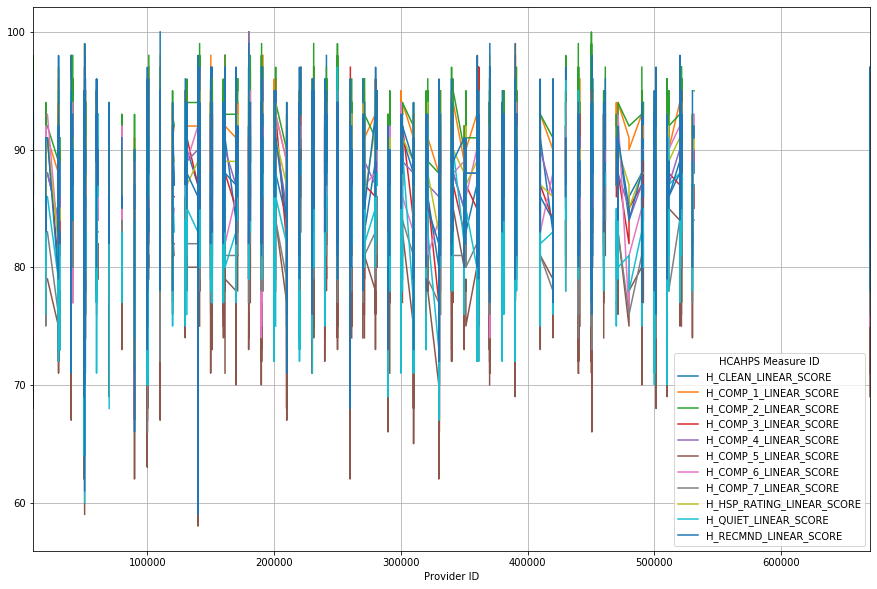

In [83]:
# plot line graph for each measure
df_experience_final.plot(x="Provider ID", y=['H_CLEAN_LINEAR_SCORE',
'H_COMP_1_LINEAR_SCORE',
'H_COMP_2_LINEAR_SCORE',
'H_COMP_3_LINEAR_SCORE',
'H_COMP_4_LINEAR_SCORE',
'H_COMP_5_LINEAR_SCORE',
'H_COMP_6_LINEAR_SCORE',
'H_COMP_7_LINEAR_SCORE',
'H_HSP_RATING_LINEAR_SCORE',
'H_QUIET_LINEAR_SCORE',
'H_RECMND_LINEAR_SCORE'] ,figsize=(15,10), grid=True  )
plt.show()

Finally we are left with 11 Measure for Effectiveness as required.
The final dataframe contains 4818 data records and 11 features. 

In [84]:
# as Experience is positive measure higher is Better.
# Thus, we need to scale it in same direction (for the same we will multiply it by 1)

# 1 indicates bad, i.e. (x - mu) / sigma

df_experience_final.iloc[:,1:] = (df_experience_final.iloc[:,1:] - df_experience_final.iloc[:,1:].mean())/df_experience_final.iloc[:,1:].std()
df_experience_final.head()

HCAHPS Measure ID,Provider ID,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_4_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE
0,10001,-0.852686,-0.523545,0.041177,-1.199873,-0.606383,-0.415225,0.027637,0.164883,0.084187,0.968547,0.450029
1,10005,-1.111599,-0.129172,0.859592,-0.290031,0.166720,0.284507,0.308654,-0.183346,0.391502,0.577224,0.221265
2,10006,-1.111599,-0.129172,0.859592,-0.517492,-0.219832,-0.181981,-1.096430,-0.531575,-1.145072,0.577224,-0.922555
3,10007,0.441879,-0.129172,1.678007,0.392350,0.553271,0.750996,-0.253380,0.164883,-0.530442,1.751192,-0.465027
4,10008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# Outlier imputation: According to the CMS documentation, they've trimmed the 
# measures at the 0.125th and the 99.875th percentiles

# lets check what are the values at this percentailes for each columns.

print(df_experience_final.iloc[:,1:].quantile(0.00126)) 
print(df_experience_final.iloc[:,1:].quantile(0.99876)) 
df_experience_final.iloc[:,1:].describe()

HCAHPS Measure ID
H_CLEAN_LINEAR_SCORE        -3.182905
H_COMP_1_LINEAR_SCORE       -4.861652
H_COMP_2_LINEAR_SCORE       -4.460104
H_COMP_3_LINEAR_SCORE       -4.289053
H_COMP_4_LINEAR_SCORE       -4.858448
H_COMP_5_LINEAR_SCORE       -3.913888
H_COMP_6_LINEAR_SCORE       -4.514255
H_COMP_7_LINEAR_SCORE       -4.013863
H_HSP_RATING_LINEAR_SCORE   -4.525535
H_QUIET_LINEAR_SCORE        -3.449720
H_RECMND_LINEAR_SCORE       -4.486968
Name: 0.00126, dtype: float64
HCAHPS Measure ID
H_CLEAN_LINEAR_SCORE         2.772098
H_COMP_1_LINEAR_SCORE        2.631441
H_COMP_2_LINEAR_SCORE        2.905629
H_COMP_3_LINEAR_SCORE        2.666953
H_COMP_4_LINEAR_SCORE        3.124348
H_COMP_5_LINEAR_SCORE        3.235354
H_COMP_6_LINEAR_SCORE        2.275770
H_COMP_7_LINEAR_SCORE        3.647171
H_HSP_RATING_LINEAR_SCORE    2.742867
H_QUIET_LINEAR_SCORE         2.729500
H_RECMND_LINEAR_SCORE        2.508904
Name: 0.99876, dtype: float64


HCAHPS Measure ID,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_4_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE
count,3.508000e+03,3.508000e+03,3.508000e+03,3.508000e+03,3.508000e+03,3.508000e+03,3.508000e+03,3.508000e+03,3.508000e+03,3.508000e+03,3.508000e+03
mean,-7.439570e-16,-3.413967e-15,-1.271186e-15,8.364967e-16,-2.828917e-15,1.006986e-15,6.400556e-16,1.351858e-15,-6.138508e-16,1.564092e-15,7.817135e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.218557e+00,-7.227891e+00,-6.915348e+00,-4.839239e+00,-6.791205e+00,-4.846864e+00,-6.997779e+00,-6.103236e+00,-7.291369e+00,-4.509974e+00,-6.641654e+00
25%,-5.937731e-01,-5.235452e-01,-7.772374e-01,-5.174918e-01,-6.063832e-01,-6.484693e-01,-5.343962e-01,-5.315751e-01,-5.304422e-01,-5.967451e-01,-6.937913e-01
50%,-7.594687e-02,2.652014e-01,4.117737e-02,-6.257106e-02,1.667196e-01,5.126318e-02,2.763704e-02,1.648826e-01,8.418745e-02,-9.760763e-03,2.212646e-01
75%,7.007925e-01,6.595747e-01,4.503848e-01,6.198101e-01,5.532710e-01,5.177515e-01,5.896703e-01,5.131114e-01,6.988171e-01,7.728851e-01,6.787925e-01
max,3.031011e+00,3.420188e+00,3.314837e+00,3.121874e+00,4.805336e+00,3.783170e+00,3.399837e+00,6.084773e+00,3.157336e+00,2.925161e+00,2.737668e+00


In [86]:
# replaceing outliers by mean values for that columns

for col in df_experience_final.columns: 
    if col != 'Provider ID':
        df_experience_final[col].loc[((df_experience_final[col] <= df_experience_final[col].quantile(0.00126)) | 
           (df_experience_final[col] >= df_experience_final[col].quantile(0.99876)))] = df_experience_final[col].mean()    

In [87]:
df_experience_final.describe()

HCAHPS Measure ID,Provider ID,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_4_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE
count,4818.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000
mean,267983.546492,0.005534,-0.003762,-0.000433,-0.003634,0.003885,-0.002230,0.000523,0.001124,0.005167,-0.003246,0.003610
std,156646.082755,0.975186,0.954136,0.961376,0.970747,0.965095,0.984958,0.969350,0.964272,0.967258,0.977320,0.971360
min,10001.000000,-2.923991,-4.467278,-4.050897,-4.156858,-4.471897,-3.913888,-4.187613,-3.665635,-4.218220,-3.336006,-4.354015
25%,140185.250000,-0.593773,-0.523545,-0.777237,-0.517492,-0.606383,-0.648469,-0.534396,-0.531575,-0.530442,-0.596745,-0.693791
50%,260037.000000,-0.075947,0.265201,0.041177,-0.062571,0.166720,0.051263,0.027637,0.164883,0.084187,-0.009761,0.110632
75%,390209.250000,0.700793,0.659575,0.450385,0.619810,0.553271,0.517752,0.589670,0.513111,0.698817,0.577224,0.678792
max,670112.000000,2.513185,2.237068,2.496422,2.439493,2.872579,3.083437,1.994754,3.298942,2.542706,2.533838,2.280140


In [88]:
print(df_experience_final.shape)
df_experience_final.head()

(4818, 12)


HCAHPS Measure ID,Provider ID,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_4_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE
0,10001,-0.852686,-0.523545,0.041177,-1.199873,-0.606383,-0.415225,0.027637,0.164883,0.084187,0.968547,0.450029
1,10005,-1.111599,-0.129172,0.859592,-0.290031,0.166720,0.284507,0.308654,-0.183346,0.391502,0.577224,0.221265
2,10006,-1.111599,-0.129172,0.859592,-0.517492,-0.219832,-0.181981,-1.096430,-0.531575,-1.145072,0.577224,-0.922555
3,10007,0.441879,-0.129172,1.678007,0.392350,0.553271,0.750996,-0.253380,0.164883,-0.530442,1.751192,-0.465027
4,10008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
# all numeric (float) variables in the dataset
df_experience_final_numeric = df_experience_final.select_dtypes(include=['float64'])
df_experience_final_numeric.head()

HCAHPS Measure ID,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_4_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE
0,-0.852686,-0.523545,0.041177,-1.199873,-0.606383,-0.415225,0.027637,0.164883,0.084187,0.968547,0.450029
1,-1.111599,-0.129172,0.859592,-0.290031,0.166720,0.284507,0.308654,-0.183346,0.391502,0.577224,0.221265
2,-1.111599,-0.129172,0.859592,-0.517492,-0.219832,-0.181981,-1.096430,-0.531575,-1.145072,0.577224,-0.922555
3,0.441879,-0.129172,1.678007,0.392350,0.553271,0.750996,-0.253380,0.164883,-0.530442,1.751192,-0.465027
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
# correlation matrix
cor = df_experience_final_numeric.corr()
cor

HCAHPS Measure ID,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_4_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE
HCAHPS Measure ID,,,,,,,,,,,
H_CLEAN_LINEAR_SCORE,1.000000,0.674766,0.534772,0.694633,0.624028,0.627669,0.449170,0.640111,0.616222,0.472724,0.541965
H_COMP_1_LINEAR_SCORE,0.674766,1.000000,0.728650,0.842731,0.824347,0.778391,0.633072,0.815185,0.811465,0.562418,0.747211
H_COMP_2_LINEAR_SCORE,0.534772,0.728650,1.000000,0.662090,0.693030,0.703421,0.512143,0.702953,0.712287,0.613042,0.629944
H_COMP_3_LINEAR_SCORE,0.694633,0.842731,0.662090,1.000000,0.755682,0.759185,0.591770,0.738368,0.740315,0.570841,0.642195
H_COMP_4_LINEAR_SCORE,0.624028,0.824347,0.693030,0.755682,1.000000,0.718978,0.562643,0.758695,0.766223,0.538498,0.705717
H_COMP_5_LINEAR_SCORE,0.627669,0.778391,0.703421,0.759185,0.718978,1.000000,0.610706,0.742809,0.739764,0.562230,0.656586
H_COMP_6_LINEAR_SCORE,0.449170,0.633072,0.512143,0.591770,0.562643,0.610706,1.000000,0.659277,0.639061,0.347942,0.596520
H_COMP_7_LINEAR_SCORE,0.640111,0.815185,0.702953,0.738368,0.758695,0.742809,0.659277,1.000000,0.830577,0.528335,0.818978
H_HSP_RATING_LINEAR_SCORE,0.616222,0.811465,0.712287,0.740315,0.766223,0.739764,0.639061,0.830577,1.000000,0.620317,0.924442


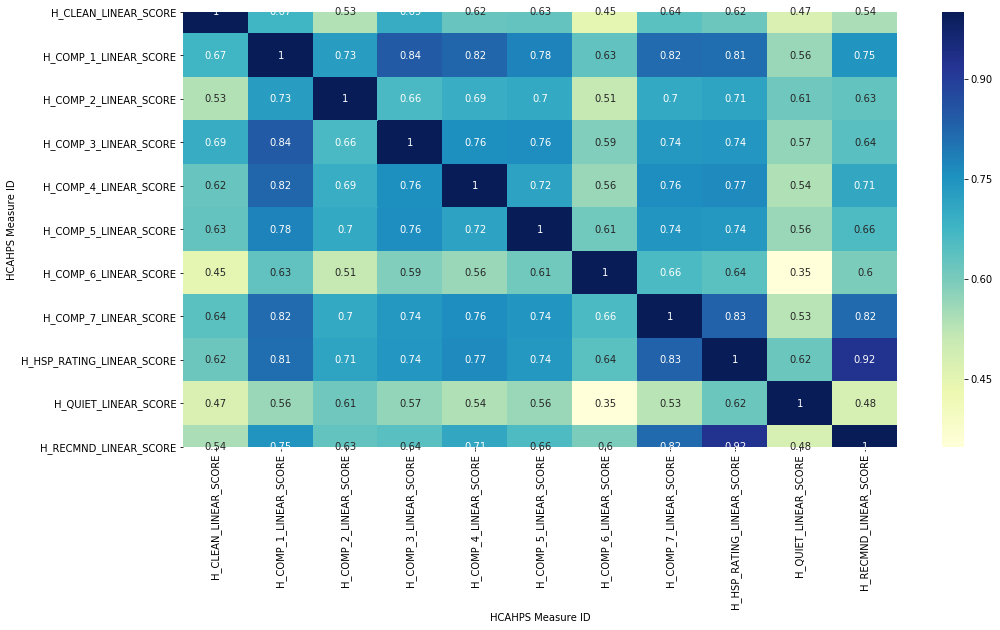

In [91]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [92]:
# Consider 5th group Effectiveness 
# Reading relevant csv File 

df = pd.read_csv(r"E:\DataScience\HealthCare\Case Study\Timely and Effective Care - Hospital.csv")

In [93]:
print(df.shape)
df.head()

(207174, 16)


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Condition,Measure ID,Measure Name,Score,Sample,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart Attack or Chest Pain,AMI_7a,Fibrinolytic Therapy Received Within 30 Minute...,Not Available,Not Available,7 - No cases met the criteria for this measure.,01/01/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart Attack or Chest Pain,AMI_8a,Primary PCI Received Within 90 Minutes of Hosp...,92,24,3 - Results are based on a shorter time period...,01/01/2015,09/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Children's Asthma,CAC_3,Home Management Plan of Care Document,Not Available,Not Available,5 - Results are not available for this reporti...,01/01/2015,12/31/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Emergency Department,ED_1b,ED1,269,535,2 - Data submitted were based on a sample of c...,01/01/2015,12/31/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Emergency Department,ED_2b,ED2,68,535,2 - Data submitted were based on a sample of c...,01/01/2015,12/31/2015


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207174 entries, 0 to 207173
Data columns (total 16 columns):
Provider ID           207174 non-null int64
Hospital Name         207174 non-null object
Address               207174 non-null object
City                  207174 non-null object
State                 207174 non-null object
ZIP Code              207174 non-null int64
County Name           206529 non-null object
Phone Number          207174 non-null int64
Condition             207174 non-null object
Measure ID            207174 non-null object
Measure Name          207174 non-null object
Score                 207174 non-null object
Sample                202356 non-null object
Footnote              160185 non-null object
Measure Start Date    207174 non-null object
Measure End Date      207174 non-null object
dtypes: int64(3), object(13)
memory usage: 25.3+ MB


In [95]:
# We have same excel describing values for timeliness and effectiveness of care 
# therefore, we will be dividing this measure under both category deom measure descritpion 

df["Measure ID"].unique()

array(['AMI_7a', 'AMI_8a', 'CAC_3', 'ED_1b', 'ED_2b', 'EDV', 'HF_2',
       'IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_1', 'OP_18b', 'OP_2',
       'OP_20', 'OP_21', 'OP_22', 'OP_23', 'OP_29', 'OP_30', 'OP_3b',
       'OP_4', 'OP_5', 'PC_01', 'PN_6', 'SCIP_CARD_2', 'SCIP_INF_1',
       'SCIP_INF_2', 'SCIP_INF_3', 'SCIP_INF_9', 'SCIP_VTE_2', 'STK_1',
       'STK_10', 'STK_2', 'STK_3', 'STK_4', 'STK_5', 'STK_6', 'STK_8',
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_4', 'VTE_5', 'VTE_6'], dtype=object)

In [96]:
# CAC_3	Home Management Plan of Care Document
# IMM_2	Immunization for influenza
# IMM_3_OP_27_FAC_ADHPCT	Healthcare workers given influenza vaccination
# OP_22	Left before being seen
# OP_23	Head CT results
# OP_29	Endoscopy/polyp surveillance: appropriate follow-up interval for normal colonoscopy in average risk patients
# OP_30	Endoscopy/polyp surveillance: colonoscopy interval for patients with a history of adenomatous polyps - avoidance of inappropriate use
# OP_4	Aspirin at Arrival
# PC_01	Percent of newborns whose deliveries were scheduled early (1-3 weeks early), when a scheduled delivery was not medically necessary
# STK_1	Venous Thromboembolism (VTE) Prophylaxis
# STK_5	Antithrombotic Therapy by End of Hospital Day 2
# STK_6	Discharged on Statin Medication
# STK_8	Stroke Education
# VTE_1	Venous thromboembolism prophylaxis
# VTE_2	ICU venous thromboembolism prophylaxis
# VTE_3	Anticoagulation overlap therapy
# VTE_5	Warfarin therapy discharge instructions
# VTE_6	Hospital acquired potentially preventable venous thromboembolism

df.drop(df.loc[~df["Measure ID"].isin(['CAC_3', 'IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 
                       'OP_22', 'OP_23', 'OP_29', 'OP_30',
                       'OP_4', 'PC_01', 'STK_1',
                        'STK_5', 'STK_6', 'STK_8',
                        'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6'])].index, inplace = True)

In [97]:
df_effective = df

In [98]:
# converting the df into format required

df_effective_final = df_effective[["Provider ID", "Measure ID", "Score"]].pivot(index = "Provider ID", columns = "Measure ID")

In [99]:
print(df_effective_final.shape)
df_effective_final.head()

(4818, 18)


Score                                                    \
Measure ID           CAC_3 IMM_2 IMM_3_OP_27_FAC_ADHPCT OP_22          OP_23   
Provider ID                                                                    
10001        Not Available    97                     81     4  Not Available   
10005        Not Available    99                     83     2             86   
10006        Not Available   100                     87     1  Not Available   
10007        Not Available    99                     53     1  Not Available   
10008        Not Available    95                     43     1  Not Available   

                                                                               \
Measure ID           OP_29 OP_30           OP_4          PC_01          STK_1   
Provider ID                                                                     
10001        Not Available    82  Not Available              0             99   
10005                   92    92             99              1             98   
10006                   70    88  Not Available              0             99   
10007                    0     0             89  Not Available             80   
10008                   96    97  Not Available  Not Available  Not Available   

                                                                               \
Measure ID           STK_5          STK_6          STK_8 VTE_1          VTE_2   
Provider ID                                                                     
10001                   98             99             87    97             99   
10005                   99             88            100    95             94   
10006                   99             97             90    98             89   
10007                  100             71  Not Available    97             99   
10008        Not Available  Not Available  Not Available    99  Not Available   

                                                          
Measure ID           VTE_3          VTE_5          VTE_6  
Provider ID                                               
10001                   91             90              0  
10005                  100            100  Not Available  
10006                   86             92              0  
10007        Not Available  Not Available  Not Available  
10008        Not Available  Not Available  Not Available

In [100]:
df_effective_final.replace("Not Available", np.nan, inplace = True)
df_effective_final.isna().sum()

# most number of null values are observe in CAC_ and VTE_6 
# as we need only 16 values out of 18 we will deleted 

       Measure ID            
Score  CAC_3                     4643
       IMM_2                     1034
       IMM_3_OP_27_FAC_ADHPCT     711
       OP_22                     1543
       OP_23                     3608
       OP_29                     2087
       OP_30                     2191
       OP_4                      2599
       PC_01                     2296
       STK_1                     2138
       STK_5                     3276
       STK_6                     2239
       STK_8                     2454
       VTE_1                     1200
       VTE_2                     1883
       VTE_3                     2332
       VTE_5                     2587
       VTE_6                     3560
dtype: int64

In [101]:
# The columns contains multiple level dropping the unnecessary one and reset int index

df_effective_final.columns = df_effective_final.columns.droplevel()
df_effective_final.reset_index(inplace = True)
df_effective_final.drop(["CAC_3", "VTE_6"], axis = 1, inplace = True)

# prinf effectiveness data 
df_effective_final.head()


Measure ID,Provider ID,IMM_2,IMM_3_OP_27_FAC_ADHPCT,OP_22,OP_23,OP_29,OP_30,OP_4,PC_01,STK_1,STK_5,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5
0,10001,97,81,4,NaN,NaN,82,NaN,0,99,98,99,87,97,99,91,90
1,10005,99,83,2,86,92,92,99,1,98,99,88,100,95,94,100,100
2,10006,100,87,1,NaN,70,88,NaN,0,99,99,97,90,98,89,86,92
3,10007,99,53,1,NaN,0,0,89,NaN,80,100,71,NaN,97,99,NaN,NaN
4,10008,95,43,1,NaN,96,97,NaN,NaN,NaN,NaN,NaN,NaN,99,NaN,NaN,NaN


In [102]:
# Converting all columns with df measure to float

df_effective_final.iloc[:,1:] = df_effective_final.iloc[:,1:].astype(float)
df_effective_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 17 columns):
Provider ID               4818 non-null int64
IMM_2                     3784 non-null float64
IMM_3_OP_27_FAC_ADHPCT    4107 non-null float64
OP_22                     3275 non-null float64
OP_23                     1210 non-null float64
OP_29                     2731 non-null float64
OP_30                     2627 non-null float64
OP_4                      2219 non-null float64
PC_01                     2522 non-null float64
STK_1                     2680 non-null float64
STK_5                     1542 non-null float64
STK_6                     2579 non-null float64
STK_8                     2364 non-null float64
VTE_1                     3618 non-null float64
VTE_2                     2935 non-null float64
VTE_3                     2486 non-null float64
VTE_5                     2231 non-null float64
dtypes: float64(16), int64(1)
memory usage: 640.0 KB


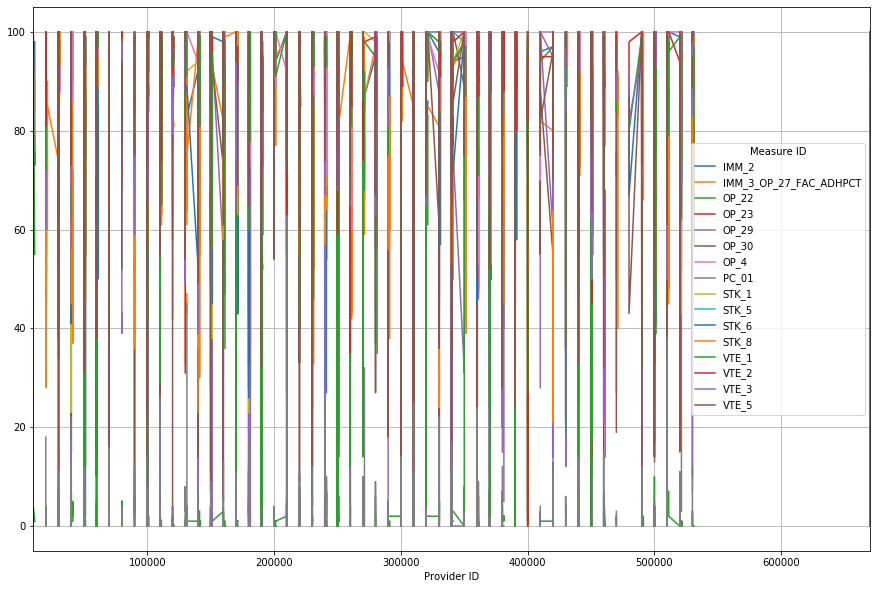

In [103]:
# plot line graph for each measure

df_effective_final.plot(x="Provider ID", y=['IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_22', 'OP_23',
       'OP_29', 'OP_30', 'OP_4', 'PC_01', 'STK_1', 'STK_5', 'STK_6', 'STK_8',
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5'] ,figsize=(15,10), grid=True  )
plt.show()

In [104]:
print(df_effective_final.shape)
df_effective_final.head()

(4818, 17)


Measure ID,Provider ID,IMM_2,IMM_3_OP_27_FAC_ADHPCT,OP_22,OP_23,OP_29,OP_30,OP_4,PC_01,STK_1,STK_5,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5
0,10001,97.0,81.0,4.0,NaN,NaN,82.0,NaN,0.0,99.0,98.0,99.0,87.0,97.0,99.0,91.0,90.0
1,10005,99.0,83.0,2.0,86.0,92.0,92.0,99.0,1.0,98.0,99.0,88.0,100.0,95.0,94.0,100.0,100.0
2,10006,100.0,87.0,1.0,NaN,70.0,88.0,NaN,0.0,99.0,99.0,97.0,90.0,98.0,89.0,86.0,92.0
3,10007,99.0,53.0,1.0,NaN,0.0,0.0,89.0,NaN,80.0,100.0,71.0,NaN,97.0,99.0,NaN,NaN
4,10008,95.0,43.0,1.0,NaN,96.0,97.0,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN


Finally we are left with 16 Measure for Effectiveness as required.
The final dataframe contains 4818 data records and 16 features. 

In [105]:
# There are 3 measures with negative impact on hospital rating namely(OP_22, PC_01)
# Thus, we need to scale it in reverse direction (for the same we will multiply it by -1)

# -1 indicates bad, i.e. (mu - x) / sigma

df_effective_final[['OP_22', 'PC_01']] = (df_effective_final[['OP_22', 'PC_01']].mean() - 
                                          df_effective_final[['OP_22', 'PC_01']])/df_effective_final[['OP_22', 'PC_01']].std()

# Rest all measures have positive impact on hospital rating
# Thus, we need to scale it in same direction (for the same we will multiply it by 1)

# 1 indicates good, i.e. (x - mu) / sigma

df_effective_final[['IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_23',
       'OP_29', 'OP_30', 'OP_4', 'STK_1', 'STK_5', 'STK_6', 'STK_8',
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5']] = (
    df_effective_final[['IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_23',
       'OP_29', 'OP_30', 'OP_4', 'STK_1', 'STK_5', 'STK_6', 'STK_8',
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5']] - df_effective_final[['IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_23',
       'OP_29', 'OP_30', 'OP_4', 'STK_1', 'STK_5', 'STK_6', 'STK_8',
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5']].mean())/df_effective_final[['IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_23',
       'OP_29', 'OP_30', 'OP_4', 'STK_1', 'STK_5', 'STK_6', 'STK_8',
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5']].std()

df_effective_final.head()

Measure ID,Provider ID,IMM_2,IMM_3_OP_27_FAC_ADHPCT,OP_22,OP_23,OP_29,OP_30,OP_4,PC_01,STK_1,STK_5,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5
0,10001,0.363809,-0.233089,-1.201289,NaN,NaN,0.071061,NaN,0.538773,0.352348,-0.024898,0.445919,-0.569954,0.333795,0.381111,-0.277674,-0.253613
1,10005,0.530202,-0.099014,-0.108298,0.783148,0.692044,0.500206,0.545747,0.323979,0.220794,0.193243,-0.915350,0.618204,0.178318,-0.450285,0.819390,0.635187
2,10006,0.613399,0.169136,0.438198,NaN,-0.101622,0.328548,NaN,0.538773,0.352348,0.193243,0.198415,-0.295763,0.411533,-1.281682,-0.887153,-0.075853
3,10007,0.530202,-2.110140,0.438198,NaN,-2.626925,-3.447929,-1.232279,NaN,-2.147170,0.411383,-3.019130,NaN,0.333795,0.381111,NaN,NaN
4,10008,0.197416,-2.780515,0.438198,NaN,0.836347,0.714779,NaN,NaN,NaN,NaN,NaN,NaN,0.489272,NaN,NaN,NaN


In [106]:
# Outlier imputation: According to the CMS documentation, they've trimmed the 
# measures at the 0.125th and the 99.875th percentiles

# lets check what are the values at this percentailes for each columns.

print(df_effective_final.iloc[:,1:].quantile(0.00126)) 
print(df_effective_final.iloc[:,1:].quantile(0.99876)) 
df_effective_final.iloc[:,1:].describe()

Measure ID
IMM_2                     -7.642479
IMM_3_OP_27_FAC_ADHPCT    -4.456453
OP_22                     -6.597803
OP_23                     -3.544522
OP_29                     -2.626925
OP_30                     -3.447929
OP_4                      -6.780666
PC_01                     -8.874254
STK_1                     -9.645724
STK_5                    -13.587799
STK_6                     -7.350442
STK_8                     -8.074820
VTE_1                     -7.206852
VTE_2                     -8.018618
VTE_3                     -5.804985
VTE_5                     -6.136595
Name: 0.00126, dtype: float64
Measure ID
IMM_2                     0.613399
IMM_3_OP_27_FAC_ADHPCT    1.040624
OP_22                     0.984693
OP_23                     1.487652
OP_29                     0.980650
OP_30                     0.843523
OP_4                      0.723550
PC_01                     0.538773
STK_1                     0.483901
STK_5                     0.411383
STK_6                 

Measure ID,IMM_2,IMM_3_OP_27_FAC_ADHPCT,OP_22,OP_23,OP_29,OP_30,OP_4,PC_01,STK_1,STK_5,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5
count,3.784000e+03,4.107000e+03,3.275000e+03,1.210000e+03,2.731000e+03,2.627000e+03,2.219000e+03,2.522000e+03,2.680000e+03,1.542000e+03,2.579000e+03,2.364000e+03,3.618000e+03,2.935000e+03,2.486000e+03,2.231000e+03
mean,-2.447244e-16,-4.871249e-16,-1.348201e-15,-3.345350e-16,3.388396e-16,1.253914e-16,2.941916e-16,6.584300e-16,-1.284089e-15,4.127697e-16,-7.572246e-17,7.212282e-16,2.809005e-16,-5.212563e-16,7.583993e-16,2.959931e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.706255e+00,-4.925716e+00,-1.759616e+01,-3.544522e+00,-2.626925e+00,-3.447929e+00,-7.633172e+00,-1.642994e+01,-1.267146e+01,-2.140268e+01,-8.587960e+00,-8.521466e+00,-7.206852e+00,-1.608053e+01,-6.616264e+00,-6.919610e+00
25%,-5.217373e-02,-4.342014e-01,-1.082979e-01,-5.755394e-01,-5.345314e-01,-4.009983e-01,-3.432656e-01,-1.056084e-01,-4.231313e-02,-2.489803e-02,-4.908804e-02,-1.129700e-01,-5.489834e-02,-1.177268e-01,-3.995697e-01,-1.647327e-01
50%,3.638090e-01,3.032114e-01,4.381978e-01,1.792868e-01,3.673624e-01,4.143775e-01,3.679448e-01,3.239793e-01,3.523476e-01,4.113833e-01,3.221672e-01,3.440135e-01,3.337948e-01,3.811109e-01,3.318061e-01,4.574270e-01
75%,5.302021e-01,7.724741e-01,4.381978e-01,7.328260e-01,8.002714e-01,7.576936e-01,7.235500e-01,5.387731e-01,4.839012e-01,4.113833e-01,5.696708e-01,6.182036e-01,4.892720e-01,5.473902e-01,8.193899e-01,6.351870e-01
max,6.133986e-01,1.040624e+00,9.846934e-01,1.487652e+00,9.806501e-01,8.435226e-01,7.235500e-01,5.387731e-01,4.839012e-01,4.113833e-01,5.696708e-01,6.182036e-01,5.670107e-01,5.473902e-01,8.193899e-01,6.351870e-01


In [107]:
# replaceing outliers by mean values for that columns

for col in df_effective_final.columns: 
    if col != 'Provider ID':
        df_effective_final[col].loc[((df_effective_final[col] <= df_effective_final[col].quantile(0.00126)) | 
           (df_effective_final[col] >= df_effective_final[col].quantile(0.99876)))] = df_effective_final[col].mean() 

In [108]:
df_effective_final.describe()

Measure ID,Provider ID,IMM_2,IMM_3_OP_27_FAC_ADHPCT,OP_22,OP_23,OP_29,OP_30,OP_4,PC_01,STK_1,STK_5,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5
count,4818.000000,3784.000000,4107.000000,3.275000e+03,1210.000000,2731.000000,2.627000e+03,2.219000e+03,2.522000e+03,2680.000000,1.542000e+03,2.579000e+03,2.364000e+03,3618.000000,2.935000e+03,2.486000e+03,2.231000e+03
mean,267983.546492,-0.077515,-0.024079,-1.692593e-01,-0.056374,0.052904,-1.634385e-01,-2.449021e-01,-2.271965e-01,0.019468,-1.839343e-01,-1.591856e-01,-1.772098e-01,-0.070508,-1.822140e-01,-2.127535e-01,-2.626269e-01
std,156646.082755,0.928273,0.961654,7.983124e-01,0.932001,0.926377,9.139809e-01,8.276807e-01,7.582149e-01,0.891053,6.728605e-01,8.722642e-01,8.718410e-01,0.894508,8.144477e-01,8.420398e-01,8.355632e-01
min,10001.000000,-7.623059,-4.389415,-6.119750e+00,-3.141948,-2.590849,-3.447929e+00,-6.744159e+00,-8.697362e+00,-9.119509,-1.354962e+01,-7.102938e+00,-8.064483e+00,-7.129113,-7.766572e+00,-5.275408e+00,-6.119690e+00
25%,140185.250000,-0.052174,-0.434201,-1.082979e-01,-0.575539,-0.426304,-4.009983e-01,-3.432656e-01,-1.056084e-01,-0.042313,-2.489803e-02,-4.908804e-02,-1.129700e-01,-0.054898,-1.177268e-01,-3.995697e-01,-1.647327e-01
50%,260037.000000,0.114219,0.236174,-1.348201e-15,0.078643,0.367362,1.253914e-16,2.941916e-16,6.584300e-16,0.352348,4.127697e-16,-7.572246e-17,7.212282e-16,0.100579,-5.212563e-16,7.583993e-16,2.959931e-16
75%,390209.250000,0.447006,0.705437,4.381978e-01,0.632183,0.800271,5.002065e-01,1.012409e-01,6.584300e-16,0.483901,4.127697e-16,3.221672e-01,2.526168e-01,0.411533,2.148317e-01,2.099101e-01,1.302723e-02
max,670112.000000,0.530202,0.973587,4.381978e-01,1.387009,0.980650,8.006081e-01,5.457474e-01,3.239793e-01,0.483901,1.932427e-01,4.459190e-01,5.268069e-01,0.489272,3.811109e-01,6.974940e-01,5.463070e-01


In [109]:
print(df_effective_final.shape)
df_effective_final.head()

(4818, 17)


Measure ID,Provider ID,IMM_2,IMM_3_OP_27_FAC_ADHPCT,OP_22,OP_23,OP_29,OP_30,OP_4,PC_01,STK_1,STK_5,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5
0,10001,3.638090e-01,-0.233089,-1.201289,NaN,NaN,0.071061,NaN,6.584300e-16,0.352348,-2.489803e-02,0.445919,-5.699535e-01,0.333795,0.381111,-2.776737e-01,-2.536127e-01
1,10005,5.302021e-01,-0.099014,-0.108298,0.783148,6.920441e-01,0.500206,0.545747,3.239793e-01,0.220794,1.932427e-01,-0.915350,7.212282e-16,0.178318,-0.450285,7.583993e-16,2.959931e-16
2,10006,-2.447244e-16,0.169136,0.438198,NaN,-1.016224e-01,0.328548,NaN,6.584300e-16,0.352348,1.932427e-01,0.198415,-2.957634e-01,0.411533,-1.281682,-8.871535e-01,-7.585273e-02
3,10007,5.302021e-01,-2.110140,0.438198,NaN,3.388396e-16,-3.447929,-1.232279,NaN,-2.147170,4.127697e-16,-3.019130,NaN,0.333795,0.381111,NaN,NaN
4,10008,1.974159e-01,-2.780515,0.438198,NaN,8.363471e-01,0.714779,NaN,NaN,NaN,NaN,NaN,NaN,0.489272,NaN,NaN,NaN


In [110]:
# all numeric (float) variables in the dataset
df_effective_final_numeric = df_effective_final.select_dtypes(include=['float64'])
df_effective_final_numeric.head()

Measure ID,IMM_2,IMM_3_OP_27_FAC_ADHPCT,OP_22,OP_23,OP_29,OP_30,OP_4,PC_01,STK_1,STK_5,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5
0,3.638090e-01,-0.233089,-1.201289,NaN,NaN,0.071061,NaN,6.584300e-16,0.352348,-2.489803e-02,0.445919,-5.699535e-01,0.333795,0.381111,-2.776737e-01,-2.536127e-01
1,5.302021e-01,-0.099014,-0.108298,0.783148,6.920441e-01,0.500206,0.545747,3.239793e-01,0.220794,1.932427e-01,-0.915350,7.212282e-16,0.178318,-0.450285,7.583993e-16,2.959931e-16
2,-2.447244e-16,0.169136,0.438198,NaN,-1.016224e-01,0.328548,NaN,6.584300e-16,0.352348,1.932427e-01,0.198415,-2.957634e-01,0.411533,-1.281682,-8.871535e-01,-7.585273e-02
3,5.302021e-01,-2.110140,0.438198,NaN,3.388396e-16,-3.447929,-1.232279,NaN,-2.147170,4.127697e-16,-3.019130,NaN,0.333795,0.381111,NaN,NaN
4,1.974159e-01,-2.780515,0.438198,NaN,8.363471e-01,0.714779,NaN,NaN,NaN,NaN,NaN,NaN,0.489272,NaN,NaN,NaN


In [111]:
# correlation matrix
cor = df_effective_final_numeric.corr()
cor

Measure ID,IMM_2,IMM_3_OP_27_FAC_ADHPCT,OP_22,OP_23,OP_29,OP_30,OP_4,PC_01,STK_1,STK_5,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5
Measure ID,,,,,,,,,,,,,,,,
IMM_2,1.000000,0.149672,0.105496,0.138973,0.065313,0.112153,0.231454,0.159731,0.308814,0.274850,0.174564,0.260484,0.460781,0.246799,0.098614,0.189351
IMM_3_OP_27_FAC_ADHPCT,0.149672,1.000000,0.041705,0.027851,0.073129,0.039779,0.082341,0.077643,0.093423,0.120264,0.118713,0.065032,0.160487,0.102173,0.093438,-0.007116
OP_22,0.105496,0.041705,1.000000,0.121466,0.050148,0.072365,0.067084,0.069045,0.029401,0.046504,0.017835,0.047290,0.079265,0.067683,0.049083,0.023722
OP_23,0.138973,0.027851,0.121466,1.000000,0.071006,0.043942,0.077167,-0.003710,0.146322,0.111773,0.162707,0.125665,0.192018,0.166246,0.087744,0.123465
OP_29,0.065313,0.073129,0.050148,0.071006,1.000000,0.296881,0.091473,0.049301,0.060164,0.076733,0.100617,0.093236,0.088327,0.076499,0.175893,0.038264
OP_30,0.112153,0.039779,0.072365,0.043942,0.296881,1.000000,0.133258,0.031143,0.084219,0.066979,0.069418,0.066703,0.115952,0.097026,0.130164,0.042023
OP_4,0.231454,0.082341,0.067084,0.077167,0.091473,0.133258,1.000000,0.124210,0.120479,0.064295,0.063412,0.005686,0.340734,0.138544,0.047333,0.080073
PC_01,0.159731,0.077643,0.069045,-0.003710,0.049301,0.031143,0.124210,1.000000,0.090944,0.065497,0.106888,0.084047,0.161141,0.136009,0.070354,0.035807
STK_1,0.308814,0.093423,0.029401,0.146322,0.060164,0.084219,0.120479,0.090944,1.000000,0.395151,0.519055,0.397833,0.595313,0.501913,0.245768,0.159268


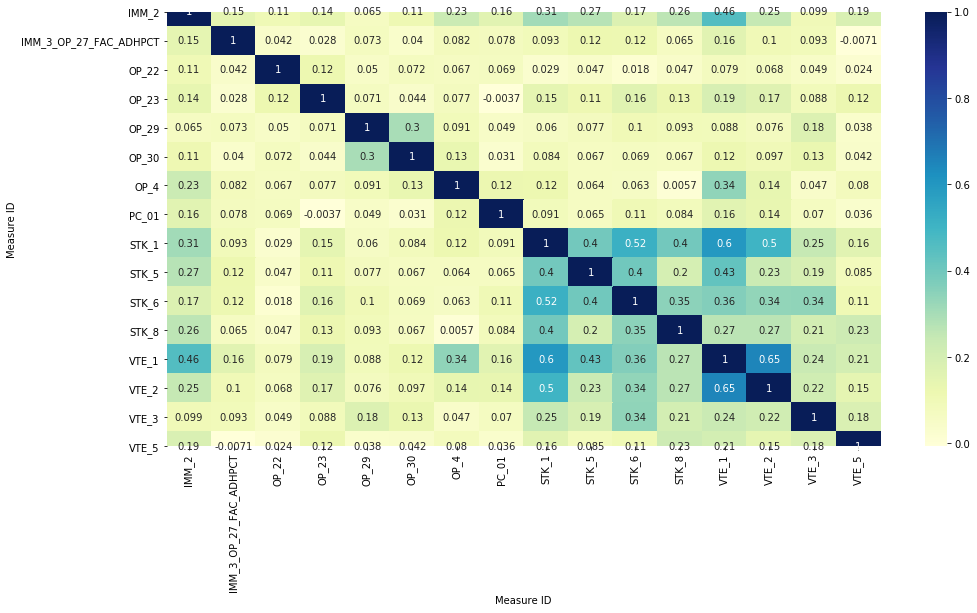

In [112]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [113]:
# Consider 6th group Timeliness 
# Reading relevant csv File 

df = pd.read_csv(r"E:\DataScience\HealthCare\Case Study\Timely and Effective Care - Hospital.csv")

In [114]:
print(df.shape)
df.head()

(207174, 16)


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Condition,Measure ID,Measure Name,Score,Sample,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart Attack or Chest Pain,AMI_7a,Fibrinolytic Therapy Received Within 30 Minute...,Not Available,Not Available,7 - No cases met the criteria for this measure.,01/01/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart Attack or Chest Pain,AMI_8a,Primary PCI Received Within 90 Minutes of Hosp...,92,24,3 - Results are based on a shorter time period...,01/01/2015,09/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Children's Asthma,CAC_3,Home Management Plan of Care Document,Not Available,Not Available,5 - Results are not available for this reporti...,01/01/2015,12/31/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Emergency Department,ED_1b,ED1,269,535,2 - Data submitted were based on a sample of c...,01/01/2015,12/31/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Emergency Department,ED_2b,ED2,68,535,2 - Data submitted were based on a sample of c...,01/01/2015,12/31/2015


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207174 entries, 0 to 207173
Data columns (total 16 columns):
Provider ID           207174 non-null int64
Hospital Name         207174 non-null object
Address               207174 non-null object
City                  207174 non-null object
State                 207174 non-null object
ZIP Code              207174 non-null int64
County Name           206529 non-null object
Phone Number          207174 non-null int64
Condition             207174 non-null object
Measure ID            207174 non-null object
Measure Name          207174 non-null object
Score                 207174 non-null object
Sample                202356 non-null object
Footnote              160185 non-null object
Measure Start Date    207174 non-null object
Measure End Date      207174 non-null object
dtypes: int64(3), object(13)
memory usage: 25.3+ MB


In [116]:
# We have same excel describing values for timeliness and effectiveness of care 
# therefore, we will be dividing this measure under both category deom measure descritpion 

df["Measure ID"].unique()

array(['AMI_7a', 'AMI_8a', 'CAC_3', 'ED_1b', 'ED_2b', 'EDV', 'HF_2',
       'IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_1', 'OP_18b', 'OP_2',
       'OP_20', 'OP_21', 'OP_22', 'OP_23', 'OP_29', 'OP_30', 'OP_3b',
       'OP_4', 'OP_5', 'PC_01', 'PN_6', 'SCIP_CARD_2', 'SCIP_INF_1',
       'SCIP_INF_2', 'SCIP_INF_3', 'SCIP_INF_9', 'SCIP_VTE_2', 'STK_1',
       'STK_10', 'STK_2', 'STK_3', 'STK_4', 'STK_5', 'STK_6', 'STK_8',
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_4', 'VTE_5', 'VTE_6'], dtype=object)

In [117]:
# ED_1b	ED1
# ED_2b	ED2
# OP_18b	OP 18
# OP_20	Door to diagnostic eval
# OP_21	Median time to pain med
# OP_3b	Median Time to Transfer to Another Facility for Acute Coronary Intervention
# OP_5	Median Time to ECG

# drop all other measures except for above mentioned ones

df.drop(df.loc[~df["Measure ID"].isin(['ED_1b', 'ED_2b', 'OP_18b',
       'OP_20', 'OP_21', 'OP_3b', 'OP_5'])].index, inplace = True)

In [118]:
# find all unique measures left 

df["Measure ID"].unique()

array(['ED_1b', 'ED_2b', 'OP_18b', 'OP_20', 'OP_21', 'OP_3b', 'OP_5'],
      dtype=object)

In [119]:
df_time = df

# converting the df into format required

df_time_final = df_time[["Provider ID", "Measure ID", "Score"]].pivot(index = "Provider ID", columns = "Measure ID")

In [120]:
print(df_time_final.shape)
df_time_final.head()

(4818, 7)


Score                                                       
Measure ID  ED_1b ED_2b OP_18b OP_20 OP_21          OP_3b           OP_5
Provider ID                                                             
10001         269    68    196    65    99  Not Available  Not Available
10005         243    71    117    27    60  Not Available             12
10006         217    78    133    10    58  Not Available  Not Available
10007         219    68    119    38    90  Not Available              7
10008         180    56     98    27    49  Not Available  Not Available

In [121]:
df_time_final.replace("Not Available", np.nan, inplace = True)
df_time_final.isna().sum()

       Measure ID
Score  ED_1b         1222
       ED_2b         1238
       OP_18b        1234
       OP_20         1223
       OP_21         1505
       OP_3b         4425
       OP_5          2574
dtype: int64

In [122]:
# There are string values avaliable in timeliness df
# replace them with nan

df_time_final.replace("Not Available", np.nan, inplace = True)

# The columns contains multiple level dropping the unnecessary one and reset int index

df_time_final.columns = df_time_final.columns.droplevel()
df_time_final.reset_index(inplace = True)

# Print final df

df_time_final.head()

Measure ID,Provider ID,ED_1b,ED_2b,OP_18b,OP_20,OP_21,OP_3b,OP_5
0,10001,269,68,196,65,99,NaN,NaN
1,10005,243,71,117,27,60,NaN,12
2,10006,217,78,133,10,58,NaN,NaN
3,10007,219,68,119,38,90,NaN,7
4,10008,180,56,98,27,49,NaN,NaN


In [123]:
# Converting all columns with df measure to float

df_time_final.iloc[:,1:] = df_time_final.iloc[:,1:].astype(float)
df_time_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 8 columns):
Provider ID    4818 non-null int64
ED_1b          3596 non-null float64
ED_2b          3580 non-null float64
OP_18b         3584 non-null float64
OP_20          3595 non-null float64
OP_21          3313 non-null float64
OP_3b          393 non-null float64
OP_5           2244 non-null float64
dtypes: float64(7), int64(1)
memory usage: 301.2 KB


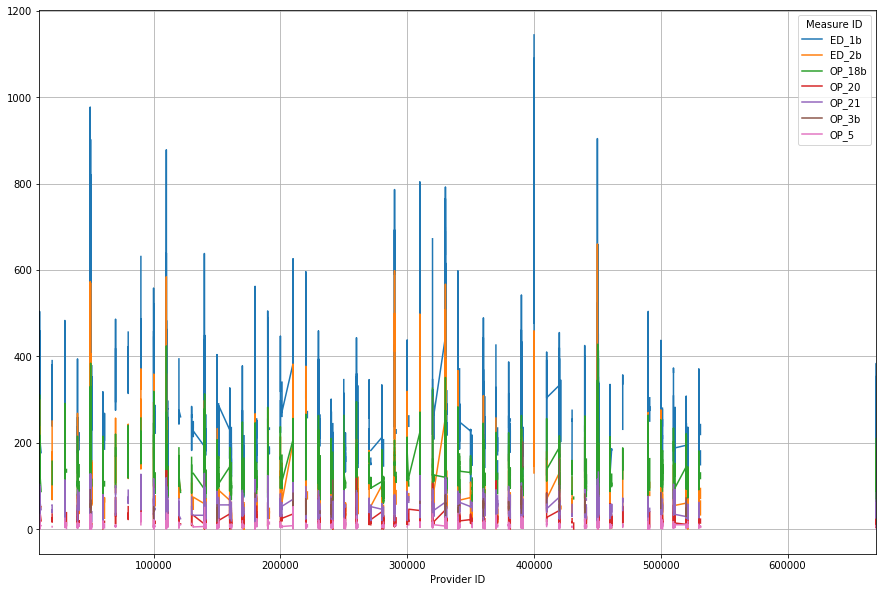

In [124]:
# plot line graph for each measure

df_time_final.plot(x="Provider ID", y=['ED_1b', 'ED_2b', 'OP_18b',
       'OP_20', 'OP_21', 'OP_3b', 'OP_5'] ,figsize=(15,10), grid=True  )
plt.show()

In [125]:
print(df_time_final.shape)
df_time_final.head()

(4818, 8)


Measure ID,Provider ID,ED_1b,ED_2b,OP_18b,OP_20,OP_21,OP_3b,OP_5
0,10001,269.0,68.0,196.0,65.0,99.0,NaN,NaN
1,10005,243.0,71.0,117.0,27.0,60.0,NaN,12.0
2,10006,217.0,78.0,133.0,10.0,58.0,NaN,NaN
3,10007,219.0,68.0,119.0,38.0,90.0,NaN,7.0
4,10008,180.0,56.0,98.0,27.0,49.0,NaN,NaN


Finally we are left with 7 Measure for Timeliness as required.
The final dataframe contains 4818 data records and 7features. 

In [126]:
# as Timeliness is negative measure Lower is Better.
# Thus, we need to scale it in reverse direction (for the same we will multiply it by -1)

# -1 indicates bad, i.e. (mu - x) / sigma

df_time_final.iloc[:,1:] = (df_time_final.iloc[:,1:].mean() - df_time_final.iloc[:,1:])/df_time_final.iloc[:,1:].std()
df_time_final.head()


Measure ID,Provider ID,ED_1b,ED_2b,OP_18b,OP_20,OP_21,OP_3b,OP_5
0,10001,0.089247,0.508286,-1.265605,-2.413565,-2.586986,NaN,NaN
1,10005,0.341500,0.462769,0.615752,-0.048967,-0.379753,NaN,-0.714375
2,10006,0.593753,0.356560,0.234718,1.008879,-0.266562,NaN,NaN
3,10007,0.574349,0.508286,0.568123,-0.733456,-2.077625,NaN,0.247960
4,10008,0.952728,0.690358,1.068231,-0.048967,0.242800,NaN,NaN


In [127]:
# Outlier imputation: According to the CMS documentation, they've trimmed the 
# measures at the 0.125th and the 99.875th percentiles

# lets check what are the values at this percentailes for each columns.

print(df_time_final.iloc[:,1:].quantile(0.00126)) 
print(df_time_final.iloc[:,1:].quantile(0.99876)) 
df_time_final.iloc[:,1:].describe()

Measure ID
ED_1b    -6.537190
ED_2b    -7.085167
OP_18b   -4.642425
OP_20    -5.514260
OP_21    -4.218464
OP_3b    -8.814558
OP_5     -5.977889
Name: 0.00126, dtype: float64
Measure ID
ED_1b     2.003003
ED_2b     1.540023
OP_18b    2.081713
OP_20     1.631141
OP_21     2.104409
OP_3b     1.204809
OP_5      1.595228
Name: 0.99876, dtype: float64


Measure ID,ED_1b,ED_2b,OP_18b,OP_20,OP_21,OP_3b,OP_5
count,3.596000e+03,3.580000e+03,3.584000e+03,3.595000e+03,3.313000e+03,3.930000e+02,2.244000e+03
mean,-2.728629e-16,-2.223547e-17,-1.062518e-16,8.029429e-18,-8.417990e-17,-1.765622e-17,4.523021e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.400027e+00,-8.473895e+00,-6.790605e+00,-6.831630e+00,-5.020602e+00,-1.013500e+01,-8.413048e+00
25%,-4.055561e-01,-3.868971e-01,-5.511657e-01,-4.223250e-01,-6.061362e-01,-1.923816e-01,-3.294408e-01
50%,1.959696e-01,2.427659e-01,1.156446e-01,1.999376e-01,7.301241e-02,1.981140e-01,5.549289e-02
75%,6.228589e-01,6.448399e-01,6.871963e-01,6.977476e-01,6.955653e-01,5.285334e-01,6.328934e-01
max,2.097567e+00,1.540023e+00,2.235149e+00,1.631141e+00,2.336841e+00,1.219410e+00,1.595228e+00


In [128]:
# replaceing outliers by mean values for that columns

for col in df_time_final.columns: 
    if col != 'Provider ID':
        df_time_final[col].loc[((df_time_final[col] <= df_time_final[col].quantile(0.00126)) | 
           (df_time_final[col] >= df_time_final[col].quantile(0.99876)))] = df_time_final[col].mean()    

In [129]:
df_time_final.describe()

Measure ID,Provider ID,ED_1b,ED_2b,OP_18b,OP_20,OP_21,OP_3b,OP_5
count,4818.000000,3596.000000,3580.000000,3584.000000,3595.000000,3313.000000,393.000000,2244.000000
mean,267983.546492,0.007447,0.006628,0.005046,0.002755,0.003401,0.022686,-0.023279
std,156646.082755,0.957696,0.956389,0.972323,0.967568,0.981223,0.856536,0.931758
min,10001.000000,-6.459622,-7.062843,-4.480583,-5.338199,-4.171667,-7.461607,-5.910979
25%,140185.250000,-0.405556,-0.386897,-0.551166,-0.422325,-0.606136,-0.192382,-0.329441
50%,260037.000000,0.195970,0.235180,0.115645,0.199938,0.073012,0.198114,0.055493
75%,390209.250000,0.613157,0.629667,0.687196,0.635521,0.695565,0.498495,0.632893
max,670112.000000,1.971441,1.524851,2.068446,1.568915,2.053863,1.189372,1.402761


In [130]:
print(df_time_final.shape)
df_time_final.head()

(4818, 8)


Measure ID,Provider ID,ED_1b,ED_2b,OP_18b,OP_20,OP_21,OP_3b,OP_5
0,10001,0.089247,0.508286,-1.265605,-2.413565,-2.586986,NaN,NaN
1,10005,0.341500,0.462769,0.615752,-0.048967,-0.379753,NaN,-0.714375
2,10006,0.593753,0.356560,0.234718,1.008879,-0.266562,NaN,NaN
3,10007,0.574349,0.508286,0.568123,-0.733456,-2.077625,NaN,0.247960
4,10008,0.952728,0.690358,1.068231,-0.048967,0.242800,NaN,NaN


In [131]:
# all numeric (float) variables in the dataset
df_time_final_numeric = df_time_final.select_dtypes(include=['float64'])
df_time_final_numeric.head()

Measure ID,ED_1b,ED_2b,OP_18b,OP_20,OP_21,OP_3b,OP_5
0,0.089247,0.508286,-1.265605,-2.413565,-2.586986,NaN,NaN
1,0.341500,0.462769,0.615752,-0.048967,-0.379753,NaN,-0.714375
2,0.593753,0.356560,0.234718,1.008879,-0.266562,NaN,NaN
3,0.574349,0.508286,0.568123,-0.733456,-2.077625,NaN,0.247960
4,0.952728,0.690358,1.068231,-0.048967,0.242800,NaN,NaN


In [132]:
# correlation matrix
cor = df_time_final_numeric.corr()
cor

Measure ID,ED_1b,ED_2b,OP_18b,OP_20,OP_21,OP_3b,OP_5
Measure ID,,,,,,,
ED_1b,1.000000,0.845048,0.704560,0.467084,0.430018,0.119790,0.202160
ED_2b,0.845048,1.000000,0.577457,0.339405,0.308023,0.072796,0.138764
OP_18b,0.704560,0.577457,1.000000,0.540764,0.471756,0.062688,0.149250
OP_20,0.467084,0.339405,0.540764,1.000000,0.549668,0.189609,0.181776
OP_21,0.430018,0.308023,0.471756,0.549668,1.000000,0.185153,0.247088
OP_3b,0.119790,0.072796,0.062688,0.189609,0.185153,1.000000,0.324007
OP_5,0.202160,0.138764,0.149250,0.181776,0.247088,0.324007,1.000000


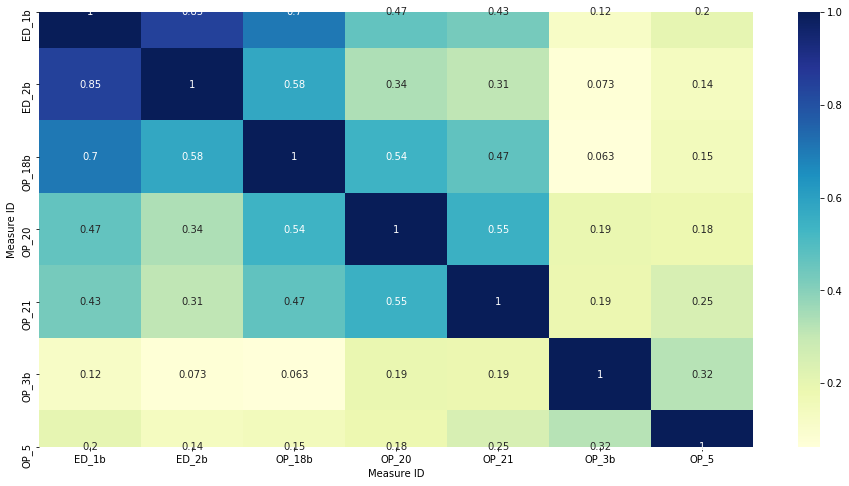

In [133]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [134]:
# Consider 7th group Efficient Use of Medical Imagning
# Reading relevant csv File 

df_image = pd.read_csv(r"E:\DataScience\HealthCare\Case Study\Outpatient Imaging Efficiency - Hospital.csv")

In [135]:
df_image.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Measure Name,Score,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_10,Abdomen CT Use of Contrast Material,6.4,NaN,07/01/2014,06/30/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_11,Thorax CT Use of Contrast Material,0.9,NaN,07/01/2014,06/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_13,Outpatients who got cardiac imaging stress tes...,7.1,NaN,07/01/2014,06/30/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_14,Outpatients with brain CT scans who got a sinu...,2.4,NaN,07/01/2014,06/30/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_8,MRI Lumbar Spine for Low Back Pain,38.1,NaN,07/01/2014,06/30/2015


In [136]:
df_image.shape

(28908, 14)

In [137]:
# OP_10	Abdomen CT Use of Contrast Material
# OP_11	Thorax CT Use of Contrast Material
# OP_13	Outpatients who got cardiac imaging stress tests before low-risk outpatient surgery
# OP_14	Outpatients with brain CT scans who got a sinus CT scan at the same time
# OP_8	MRI Lumbar Spine for Low Back Pain
# OP_9	Mammography Follow-up Rates

# OP_9 includes the follow up rate but we need efficiency of imaging measures only therefore delete OP_9

df_image.drop(df_image[df_image["Measure ID"] == "OP_9"].index, inplace = True)
df_image["Measure ID"].unique()

array(['OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8'], dtype=object)

In [138]:

# converting the df into required format 

df_image_final = df_image[["Provider ID", "Measure ID", "Score"]].pivot(index = "Provider ID", columns = "Measure ID")

In [139]:
print(df_image_final.shape)
df_image_final.head()

(4818, 5)


Score                                                            
Measure ID  OP_10          OP_11          OP_13          OP_14           OP_8
Provider ID                                                                  
10001         6.4            0.9            7.1            2.4           38.1
10005        13.3           10.2            5.3            4.0           42.8
10006        11.8            4.6            0.0            4.6           45.6
10007        24.3            6.1  Not Available  Not Available  Not Available
10008         3.6  Not Available  Not Available            0.6  Not Available

In [140]:
# There are string values avaliable in Medical imaging df
# replace them with nan

df_image_final.replace("Not Available", np.nan, inplace = True)

# The columns contains multiple level dropping the unnecessary one and reset int index

df_image_final.columns = df_image_final.columns.droplevel()
df_image_final.reset_index(inplace = True)

# Print final df

df_image_final.head()

Measure ID,Provider ID,OP_10,OP_11,OP_13,OP_14,OP_8
0,10001,6.4,0.9,7.1,2.4,38.1
1,10005,13.3,10.2,5.3,4.0,42.8
2,10006,11.8,4.6,0.0,4.6,45.6
3,10007,24.3,6.1,NaN,NaN,NaN
4,10008,3.6,NaN,NaN,0.6,NaN


Finally we are left with 5 Measure for mortality as required.
The final dataframe contains 4818 data records and 5 features. 

In [141]:
df_image_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 6 columns):
Provider ID    4818 non-null int64
OP_10          3629 non-null object
OP_11          3349 non-null object
OP_13          2233 non-null object
OP_14          2304 non-null object
OP_8           1524 non-null object
dtypes: int64(1), object(5)
memory usage: 225.9+ KB


In [142]:
# Converting all columns with df measure to float

df_image_final.iloc[:,1:] = df_image_final.iloc[:,1:].astype(float)
df_image_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 6 columns):
Provider ID    4818 non-null int64
OP_10          3629 non-null float64
OP_11          3349 non-null float64
OP_13          2233 non-null float64
OP_14          2304 non-null float64
OP_8           1524 non-null float64
dtypes: float64(5), int64(1)
memory usage: 225.9 KB


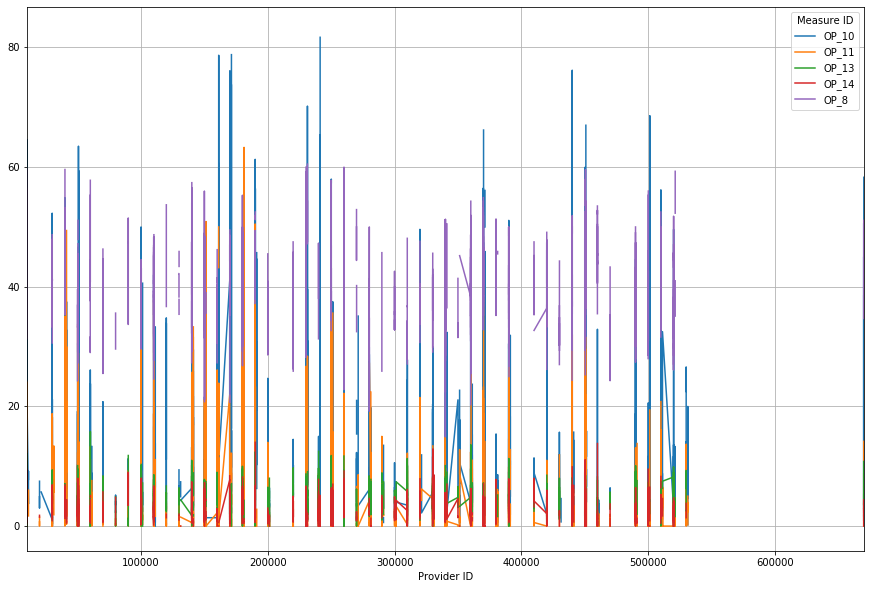

In [143]:
# plot line graph for each measure
df_image_final.plot(x="Provider ID", y=['OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8'] ,figsize=(15,10), grid=True  )
plt.show()

In [144]:
print(df_image_final.shape)
df_image_final.head()

(4818, 6)


Measure ID,Provider ID,OP_10,OP_11,OP_13,OP_14,OP_8
0,10001,6.4,0.9,7.1,2.4,38.1
1,10005,13.3,10.2,5.3,4.0,42.8
2,10006,11.8,4.6,0.0,4.6,45.6
3,10007,24.3,6.1,NaN,NaN,NaN
4,10008,3.6,NaN,NaN,0.6,NaN


Finally we are left with 5 Measure for Imaging as required.
The final dataframe contains 4818 data records and 5 features. 

In [145]:
# Meaning of variables: The data dictionary states that 
# 'The measures on the use of medical imaging show how often a hospital 
# provides specific imaging tests for Medicare beneficiaries under circumstances where 
# they may not be medically appropriate.' Thus , lower percentages suggest more efficient use of 
# medical imaging

# Thus, we need to scale it in reverse direction (for the same we will multiply it by -1)

# -1 indicates bad, i.e. (mu - x) / sigma

df_image_final.iloc[:,1:] = (df_image_final.iloc[:,1:].mean() - df_image_final.iloc[:,1:])/df_image_final.iloc[:,1:].std()
df_image_final.head()


Measure ID,Provider ID,OP_10,OP_11,OP_13,OP_14,OP_8
0,10001,0.250738,0.388644,-1.199985,0.207497,0.299604
1,10005,-0.423442,-1.203647,-0.305172,-0.648977,-0.378309
2,10006,-0.276881,-0.244848,2.329554,-0.970155,-0.782173
3,10007,-1.498222,-0.501669,NaN,NaN,NaN
4,10008,0.524318,NaN,NaN,1.171030,NaN


In [146]:
# Outlier imputation: According to the CMS documentation, they've trimmed the 
# measures at the 0.125th and the 99.875th percentiles

# lets check what are the values at this percentailes for each columns.

print(df_image_final.iloc[:,1:].quantile(0.00126)) 
print(df_image_final.iloc[:,1:].quantile(0.99876)) 
df_image_final.iloc[:,1:].describe()

Measure ID
OP_10   -6.563649
OP_11   -7.995522
OP_13   -3.931073
OP_14   -5.418370
OP_8    -3.135170
Name: 0.00126, dtype: float64
Measure ID
OP_10    0.876065
OP_11    0.542737
OP_13    2.329554
OP_14    1.492208
OP_8     2.884707
Name: 0.99876, dtype: float64


Measure ID,OP_10,OP_11,OP_13,OP_14,OP_8
count,3.629000e+03,3.349000e+03,2.233000e+03,2.304000e+03,1.524000e+03
mean,-1.991916e-16,3.698312e-16,8.698819e-16,1.756889e-15,1.265181e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.194558e+00,-1.029511e+01,-5.524914e+00,-6.001938e+00,-3.349589e+00
25%,-1.400911e-01,-3.939099e-02,-5.537314e-01,-6.489769e-01,-6.523594e-01
50%,3.191332e-01,3.886441e-01,4.281050e-02,1.539673e-01,9.767220e-02
75%,5.634014e-01,5.256154e-01,6.393524e-01,6.892635e-01,6.601959e-01
max,8.760647e-01,5.427368e-01,2.329554e+00,1.492208e+00,3.645899e+00


In [147]:
# replaceing outliers by mean values for that columns

for col in df_image_final.columns: 
    if col != 'Provider ID':
        df_image_final[col].loc[((df_image_final[col] <= df_image_final[col].quantile(0.00126)) | 
           (df_image_final[col] >= df_image_final[col].quantile(0.99876)))] = df_image_final[col].mean()    

In [148]:
df_image_final.describe()

Measure ID,Provider ID,OP_10,OP_11,OP_13,OP_14,OP_8
count,4818.000000,3629.000000,3.349000e+03,2233.000000,2.304000e+03,1.524000e+03
mean,267983.546492,-0.003527,-1.203306e-01,-0.037507,-9.090803e-02,-8.197477e-07
std,156646.082755,0.960652,8.932922e-01,0.930778,8.950208e-01,9.852176e-01
min,10001.000000,-6.559460,-7.915237e+00,-3.884424,-5.413112e+00,-3.118810e+00
25%,140185.250000,-0.140091,-3.939099e-02,-0.553731,-6.489769e-01,-6.523594e-01
50%,260037.000000,0.299592,3.698312e-16,0.042810,1.756889e-15,9.046036e-02
75%,390209.250000,0.553631,3.886441e-01,0.589641,5.286746e-01,6.601959e-01
max,670112.000000,0.866294,5.256154e-01,1.931860,1.438678e+00,2.867020e+00


In [149]:
print(df_image_final.shape)
df_image_final.head()

(4818, 6)


Measure ID,Provider ID,OP_10,OP_11,OP_13,OP_14,OP_8
0,10001,0.250738,0.388644,-1.199985e+00,0.207497,0.299604
1,10005,-0.423442,-1.203647,-3.051723e-01,-0.648977,-0.378309
2,10006,-0.276881,-0.244848,8.698819e-16,-0.970155,-0.782173
3,10007,-1.498222,-0.501669,NaN,NaN,NaN
4,10008,0.524318,NaN,NaN,1.171030,NaN


In [150]:
# all numeric (float) variables in the dataset
df_image_final_numeric = df_image_final.select_dtypes(include=['float64'])
df_image_final_numeric.head()

Measure ID,OP_10,OP_11,OP_13,OP_14,OP_8
0,0.250738,0.388644,-1.199985e+00,0.207497,0.299604
1,-0.423442,-1.203647,-3.051723e-01,-0.648977,-0.378309
2,-0.276881,-0.244848,8.698819e-16,-0.970155,-0.782173
3,-1.498222,-0.501669,NaN,NaN,NaN
4,0.524318,NaN,NaN,1.171030,NaN


In [151]:
# correlation matrix
cor = df_image_final_numeric.corr()
cor

Measure ID,OP_10,OP_11,OP_13,OP_14,OP_8
Measure ID,,,,,
OP_10,1.000000,0.424365,0.010645,-0.020247,0.081366
OP_11,0.424365,1.000000,-0.045337,0.008815,0.060780
OP_13,0.010645,-0.045337,1.000000,0.056035,-0.031280
OP_14,-0.020247,0.008815,0.056035,1.000000,0.098690
OP_8,0.081366,0.060780,-0.031280,0.098690,1.000000


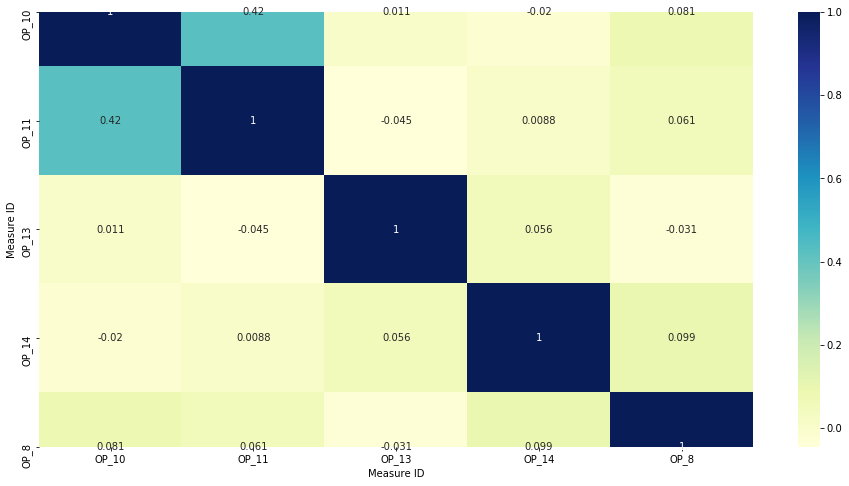

In [152]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [153]:
# All df finally we are left with are as follows

print("1. Mortality contains " + str(df_mortality_final.shape[0]) + " Records and " + str(df_mortality_final.shape[1] - 1) + " Measures." )
print("2. Safety of Care contains " + str(df_safety_final.shape[0]) + " Records and " + str(df_safety_final.shape[1] - 1) + " Measures." )
print("3. Readmission contains " + str(df_readmission_final.shape[0]) + " Records and " + str(df_readmission_final.shape[1] - 1) + " Measures." )
print("4. Patient Experience contains " + str(df_experience_final.shape[0]) + " Records and " + str(df_experience_final.shape[1] - 1) + " Measures." )
print("5. Effectiveness of Care contains " + str(df_effective_final.shape[0]) + " Records and " + str(df_effective_final.shape[1] - 1) + " Measures." )
print("6. Timeliness of Care contains " + str(df_time_final.shape[0]) + " Records and " + str(df_time_final.shape[1] - 1) + " Measures." )
print("7. Efficient use of Medical Imaging contains " + str(df_image_final.shape[0]) + " Records and " + str(df_image_final.shape[1] - 1) + " Measures." )

1. Mortality contains 4818 Records and 7 Measures.
2. Safety of Care contains 4818 Records and 8 Measures.
3. Readmission contains 4818 Records and 8 Measures.
4. Patient Experience contains 4818 Records and 11 Measures.
5. Effectiveness of Care contains 4818 Records and 16 Measures.
6. Timeliness of Care contains 4818 Records and 7 Measures.
7. Efficient use of Medical Imaging contains 4818 Records and 5 Measures.


In [154]:
# Now lets combine all the dataframes to since dataframe

df_measure_final = pd.merge(df_mortality_final, df_safety_final)
df_measure_final = pd.merge(df_measure_final,df_readmission_final)
df_measure_final = pd.merge(df_measure_final,df_experience_final)
df_measure_final = pd.merge(df_measure_final,df_effective_final)
df_measure_final = pd.merge(df_measure_final,df_time_final)
df_measure_final = pd.merge(df_measure_final,df_image_final)

In [155]:
print(df_measure_final.shape)
df_measure_final.head()

(4818, 63)


,Provider ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_4_SURG_COMP,COMP_HIP_KNEE,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_4_SIR,HAI_5_SIR,HAI_6_SIR,PSI_90_SAFETY,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_4_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,IMM_2,IMM_3_OP_27_FAC_ADHPCT,OP_22,OP_23,OP_29,OP_30,OP_4,PC_01,STK_1,STK_5,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5,ED_1b,ED_2b,OP_18b,OP_20,OP_21,OP_3b,OP_5,OP_10,OP_11,OP_13,OP_14,OP_8
0,10001,1.249254,-0.995579,-1.093980,-0.165533,0.427653,-0.282009,-1.711558e+00,-1.354968,-2.351227,-2.087871e+00,-1.134824,-6.104930e-16,0.646805,5.664079e-02,1.210759,0.408636,-0.614857,-0.866788,0.370373,-0.884008,0.215383,-1.105347,-0.124545,-0.852686,-0.523545,0.041177,-1.199873,-0.606383,-0.415225,0.027637,0.164883,0.084187,0.968547,0.450029,3.638090e-01,-0.233089,-1.201289,NaN,NaN,0.071061,NaN,6.584300e-16,0.352348,-2.489803e-02,0.445919,-5.699535e-01,0.333795,0.381111,-2.776737e-01,-2.536127e-01,0.089247,0.508286,-1.265605,-2.413565,-2.586986,NaN,NaN,0.250738,0.388644,-1.199985e+00,0.207497,0.299604
1,10005,-1.545741,NaN,0.433948,-2.286130,-2.103406,-0.342103,-2.297783e+00,0.074460,-1.023000,5.002750e-02,0.722932,NaN,-0.456856,7.984215e-01,0.230418,0.199928,NaN,1.574335,0.036448,-1.968080,0.820556,0.495580,-0.776969,-1.111599,-0.129172,0.859592,-0.290031,0.166720,0.284507,0.308654,-0.183346,0.391502,0.577224,0.221265,5.302021e-01,-0.099014,-0.108298,0.783148,6.920441e-01,0.500206,0.545747,3.239793e-01,0.220794,1.932427e-01,-0.915350,7.212282e-16,0.178318,-0.450285,7.583993e-16,2.959931e-16,0.341500,0.462769,0.615752,-0.048967,-0.379753,NaN,-0.714375,-0.423442,-1.203647,-3.051723e-01,-0.648977,-0.378309
2,10006,-2.104740,-0.880934,0.883338,-2.354537,-0.861754,-1.784350,1.651503e-15,-1.354968,0.389466,-3.572962e-01,0.818073,NaN,-0.311757,5.887034e-01,-0.115585,0.826052,-0.703595,0.156909,0.904652,-0.703330,0.215383,-0.548503,0.527879,-1.111599,-0.129172,0.859592,-0.517492,-0.219832,-0.181981,-1.096430,-0.531575,-1.145072,0.577224,-0.922555,-2.447244e-16,0.169136,0.438198,NaN,-1.016224e-01,0.328548,NaN,6.584300e-16,0.352348,1.932427e-01,0.198415,-2.957634e-01,0.411533,-1.281682,-8.871535e-01,-7.585273e-02,0.593753,0.356560,0.234718,1.008879,-0.266562,NaN,NaN,-0.276881,-0.244848,8.698819e-16,-0.970155,-0.782173
3,10007,NaN,NaN,-1.093980,-1.533660,-1.148289,-1.003133,NaN,NaN,NaN,-4.786852e-17,NaN,NaN,NaN,-6.389551e-16,0.576421,NaN,NaN,0.078163,0.570727,NaN,-1.237030,-0.130870,-0.124545,0.441879,-0.129172,1.678007,0.392350,0.553271,0.750996,-0.253380,0.164883,-0.530442,1.751192,-0.465027,5.302021e-01,-2.110140,0.438198,NaN,3.388396e-16,-3.447929,-1.232279,NaN,-2.147170,4.127697e-16,-3.019130,NaN,0.333795,0.381111,NaN,NaN,0.574349,0.508286,0.568123,-0.733456,-2.077625,NaN,0.247960,-1.498222,-0.501669,NaN,NaN,NaN
4,10008,NaN,NaN,-0.105321,-0.370752,0.332141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.488913e-01,-0.057918,NaN,NaN,0.629384,-0.764971,NaN,-0.147720,0.774002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.974159e-01,-2.780515,0.438198,NaN,8.363471e-01,0.714779,NaN,NaN,NaN,NaN,NaN,NaN,0.489272,NaN,NaN,NaN,0.952728,0.690358,1.068231,-0.048967,0.242800,NaN,NaN,0.524318,NaN,NaN,1.171030,NaN


In [156]:
# Finally we are left with (rows,columns) = (4818, 63)

# Finally we have dataset containing all 62 Measures as required namely
df_measure_final.columns

Index(['Provider ID', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD',
       'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK', 'PSI_4_SURG_COMP',
       'COMP_HIP_KNEE', 'HAI_1_SIR', 'HAI_2_SIR', 'HAI_3_SIR', 'HAI_4_SIR',
       'HAI_5_SIR', 'HAI_6_SIR', 'PSI_90_SAFETY', 'READM_30_AMI',
       'READM_30_CABG', 'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK',
       'H_CLEAN_LINEAR_SCORE', 'H_COMP_1_LINEAR_SCORE',
       'H_COMP_2_LINEAR_SCORE', 'H_COMP_3_LINEAR_SCORE',
       'H_COMP_4_LINEAR_SCORE', 'H_COMP_5_LINEAR_SCORE',
       'H_COMP_6_LINEAR_SCORE', 'H_COMP_7_LINEAR_SCORE',
       'H_HSP_RATING_LINEAR_SCORE', 'H_QUIET_LINEAR_SCORE',
       'H_RECMND_LINEAR_SCORE', 'IMM_2', 'IMM_3_OP_27_FAC_ADHPCT', 'OP_22',
       'OP_23', 'OP_29', 'OP_30', 'OP_4', 'PC_01', 'STK_1', 'STK_5', 'STK_6',
       'STK_8', 'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'ED_1b', 'ED_2b', 'OP_18b',
       'OP_20', 'OP_21', 'OP_3b', 'OP_5', 'OP_10', 'OP_11', 'O

In [157]:
# Consider Hospital General Information data set 
# Reading relevant csv File 

df = pd.read_csv(r"E:\DataScience\HealthCare\Case Study\Hospital General Information.csv", engine="python", sep=',', quotechar='"', error_bad_lines=False)

In [158]:
print(df.shape)
df.head()

(4818, 28)


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Below the National average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,3,NaN,Same as the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Not Available,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,Yes,Y,3,NaN,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Above the National average,NaN,Not Available,Results are not available for this reporting p...


Final data set contains 4818 rows and 28 columns.
we will be combining the data set for measures with this master data set. 
But before that lets clean the data set.

### Data Cleaning and Analysis

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 28 columns):
Provider ID                                                      4818 non-null int64
Hospital Name                                                    4818 non-null object
Address                                                          4818 non-null object
City                                                             4818 non-null object
State                                                            4818 non-null object
ZIP Code                                                         4818 non-null int64
County Name                                                      4803 non-null object
Phone Number                                                     4818 non-null int64
Hospital Type                                                    4818 non-null object
Hospital Ownership                                               4818 non-null object
Emergency Services                  

In [160]:
# replace values with text Not Available to np.nan

df.replace({'Not Available':np.nan}, inplace=True)

In [161]:
# lets get the percentage of missing values for above table 

df.isnull().sum() / df.shape[0] * 100.00 

Provider ID                                                       0.000000
Hospital Name                                                     0.000000
Address                                                           0.000000
City                                                              0.000000
State                                                             0.000000
ZIP Code                                                          0.000000
County Name                                                       0.311333
Phone Number                                                      0.000000
Hospital Type                                                     0.000000
Hospital Ownership                                                0.000000
Emergency Services                                                0.000000
Meets criteria for meaningful use of EHRs                         9.028643
Hospital overall rating                                          24.283935
Hospital overall rating f

In [162]:
# We will delete all columns with more than 50% null values 

df.drop(['Hospital overall rating footnote','Mortality national comparison footnote',
         'Safety of care national comparison footnote',
         'Readmission national comparison footnote', 'Patient experience national comparison footnote',
         'Effectiveness of care national comparison footnote', 'Timeliness of care national comparison footnote',
         'Efficient use of medical imaging national comparison footnote'], axis = 1, inplace = True)

df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,Below the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Above the National average,Below the National average
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,Below the National average,Same as the National average,Same as the National average,Below the National average,Same as the National average,Above the National average,Same as the National average
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,3,Same as the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Above the National average,NaN
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,Yes,Y,3,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,Above the National average,NaN


In [163]:
# Looking at the above data it is observed that there are boolean values available for two columns 
# i.e. Meets criteria for meaningful use of EHRs and Emergency Services

# Lets convert then into boolean of 0/1

df['Emergency Services'].replace({'Yes':1, 'No':0}, inplace=True)
df['Meets criteria for meaningful use of EHRs'].replace({'Y':1, np.nan:0}, inplace=True)

In [164]:
# find columns with unique values in each row or same values in each row

df.nunique()

Provider ID                                             4818
Hospital Name                                           4617
Address                                                 4789
City                                                    2949
State                                                     56
ZIP Code                                                4419
County Name                                             1565
Phone Number                                            4803
Hospital Type                                              3
Hospital Ownership                                        10
Emergency Services                                         2
Meets criteria for meaningful use of EHRs                  2
Hospital overall rating                                    5
Mortality national comparison                              3
Safety of care national comparison                         3
Readmission national comparison                            3
Patient experience natio

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 20 columns):
Provider ID                                             4818 non-null int64
Hospital Name                                           4818 non-null object
Address                                                 4818 non-null object
City                                                    4818 non-null object
State                                                   4818 non-null object
ZIP Code                                                4818 non-null int64
County Name                                             4803 non-null object
Phone Number                                            4818 non-null int64
Hospital Type                                           4818 non-null object
Hospital Ownership                                      4818 non-null object
Emergency Services                                      4818 non-null int64
Meets criteria for meaningful use of EHRs         

Text(0.5, 1.0, 'Hospital Rating vs Hospital Type')

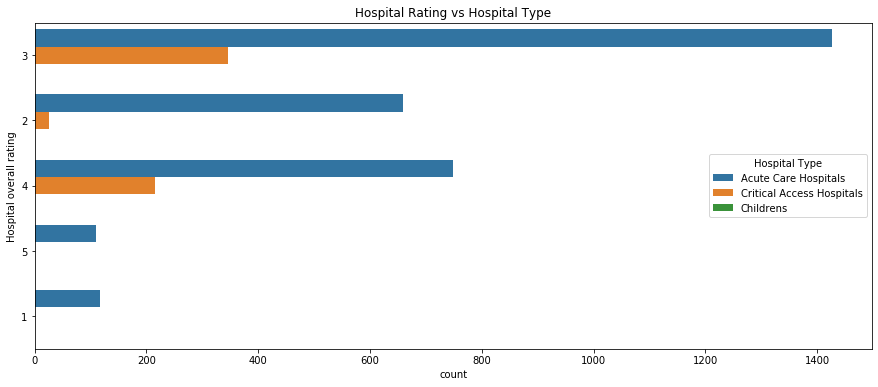

In [166]:
# Distribution of Hospital Rating vs Hospital type 

fig = plt.figure(figsize=(15,6))
sns.countplot(y = df['Hospital overall rating'], hue=df['Hospital Type']).set_title('Hospital Rating vs Hospital Type')

##### Inference 
1. Data for Hospital Type - Acute Care Hospitals is available more in comparision to other two hospital types
2. Most of the patients gave overall rating of 3
3. Least number of patient gave hospital rating of 1 which is then followed by 5

Text(0.5, 1.0, 'Hospital rating vs Mortality national comparison')

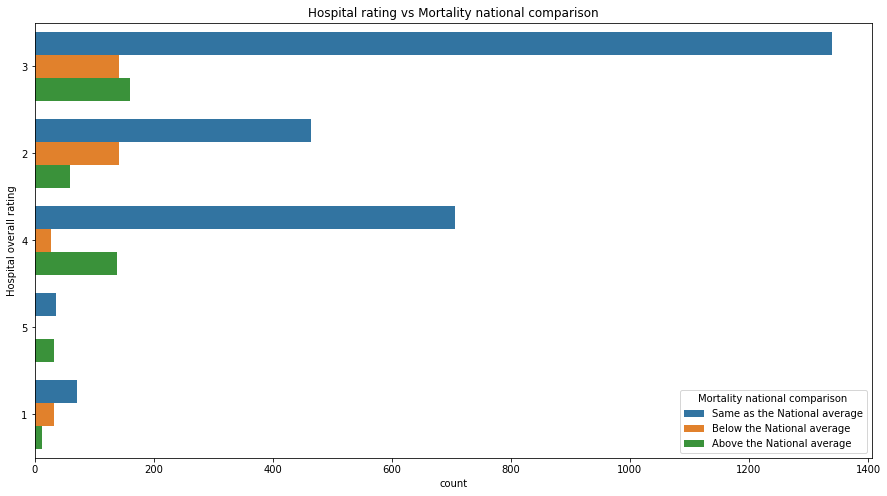

In [167]:
# distribution of hosital rating vs Mortality national comparison

fig = plt.figure(figsize = (15,8))
sns.countplot(y = df['Hospital overall rating'], hue=df['Mortality national comparison']).set_title('Hospital rating vs Mortality national comparison')

Text(0.5, 1.0, 'Hospital rating vs Safety of care national comparison')

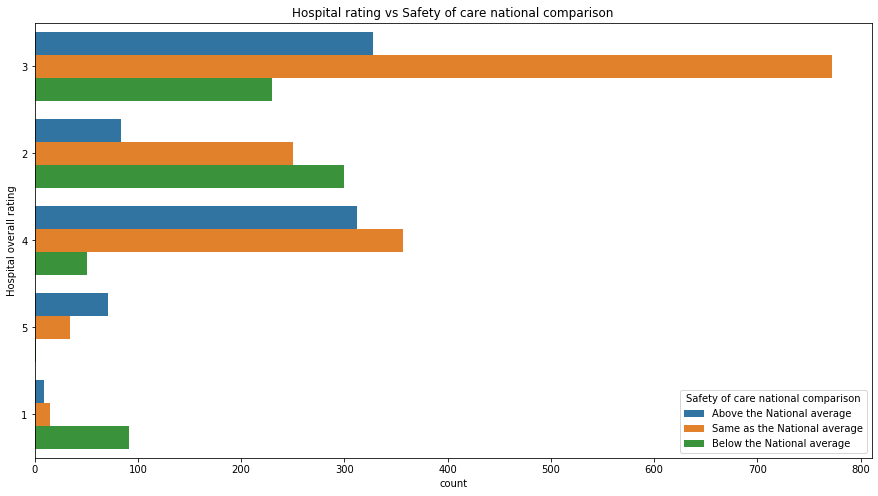

In [168]:
# distribution of hosital rating vs Safety of care national comparison

fig = plt.figure(figsize = (15,8))
sns.countplot(y = df['Hospital overall rating'], hue=df['Safety of care national comparison']).set_title('Hospital rating vs Safety of care national comparison')

Text(0.5, 1.0, 'Hospital rating vs Readmission national comparison')

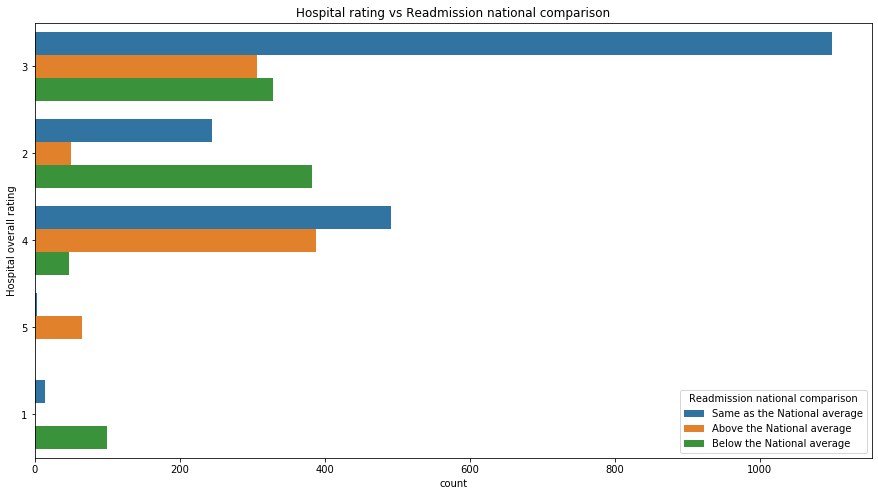

In [169]:
# distribution of hosital rating vs Readmission national comparison

fig = plt.figure(figsize = (15,8))
sns.countplot(y = df['Hospital overall rating'], hue=df['Readmission national comparison']).set_title('Hospital rating vs Readmission national comparison')

Text(0.5, 1.0, 'Hospital rating vs Patient experience national comparison')

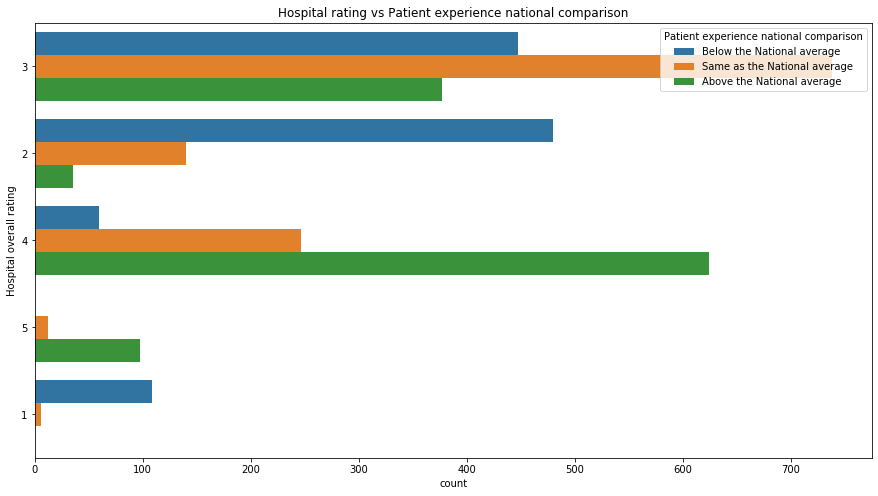

In [170]:
# distribution of hosital rating vs Patient experience national comparison

fig = plt.figure(figsize = (15,8))
sns.countplot(y = df['Hospital overall rating'], hue=df['Patient experience national comparison']).set_title('Hospital rating vs Patient experience national comparison')

Text(0.5, 1.0, 'Hospital rating vs Effectiveness of care national comparison')

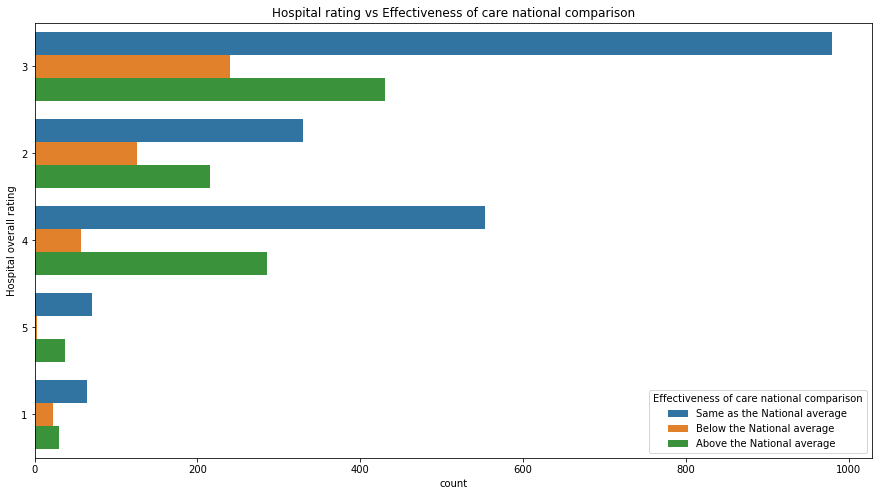

In [171]:
# distribution of hosital rating vs Effectiveness of care national comparison 

fig = plt.figure(figsize = (15,8))
sns.countplot(y = df['Hospital overall rating'], hue=df['Effectiveness of care national comparison']).set_title('Hospital rating vs Effectiveness of care national comparison')

Text(0.5, 1.0, 'Hospital rating vs Timeliness of care national comparison')

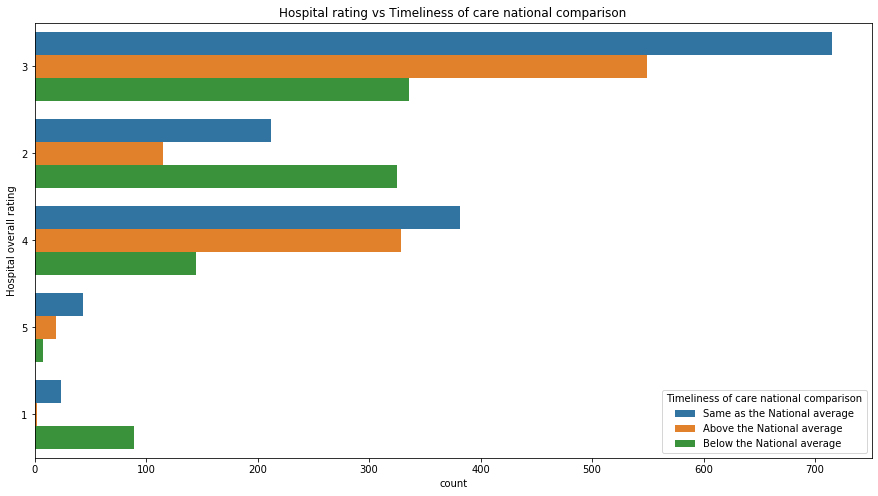

In [172]:
# distribution of hosital rating vs Timeliness of care national comparison

fig = plt.figure(figsize = (15,8))
sns.countplot(y = df['Hospital overall rating'], hue=df['Timeliness of care national comparison']).set_title('Hospital rating vs Timeliness of care national comparison')

Text(0.5, 1.0, 'Hospital rating vs Efficient use of medical imaging national comparison')

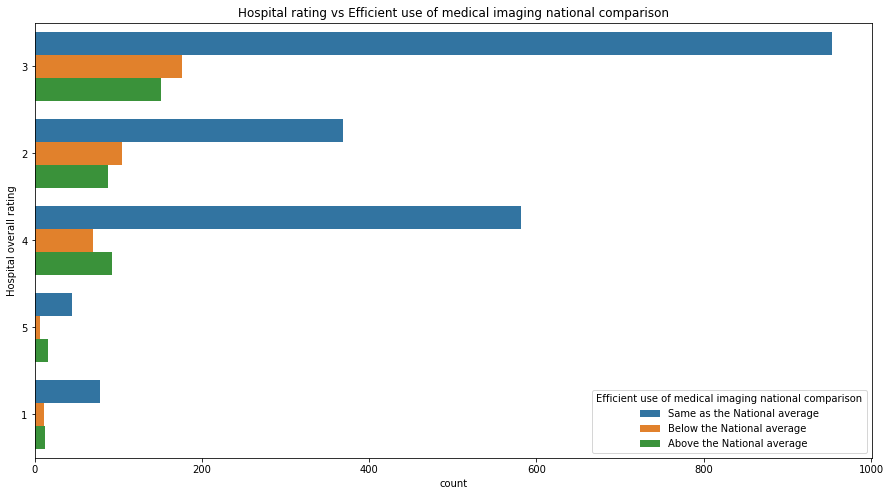

In [173]:
# distribution of hosital rating vs Efficient use of medical imaging national comparison

fig = plt.figure(figsize = (15,8))
sns.countplot(y = df['Hospital overall rating'], hue=df['Efficient use of medical imaging national comparison']).set_title('Hospital rating vs Efficient use of medical imaging national comparison')

In [174]:
# master dataframe

print(df.shape)
df.head()

(4818, 20)


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,1,1,3,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,1,1,3,Below the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Above the National average,Below the National average
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,1,1,2,Below the National average,Same as the National average,Same as the National average,Below the National average,Same as the National average,Above the National average,Same as the National average
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,1,1,3,Same as the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Above the National average,NaN
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,1,1,3,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,Above the National average,NaN


In [175]:
# datafrae with measures 

print(df_measure_final.shape)
df_measure_final.head()

(4818, 63)


,Provider ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_4_SURG_COMP,COMP_HIP_KNEE,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_4_SIR,HAI_5_SIR,HAI_6_SIR,PSI_90_SAFETY,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_4_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,IMM_2,IMM_3_OP_27_FAC_ADHPCT,OP_22,OP_23,OP_29,OP_30,OP_4,PC_01,STK_1,STK_5,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5,ED_1b,ED_2b,OP_18b,OP_20,OP_21,OP_3b,OP_5,OP_10,OP_11,OP_13,OP_14,OP_8
0,10001,1.249254,-0.995579,-1.093980,-0.165533,0.427653,-0.282009,-1.711558e+00,-1.354968,-2.351227,-2.087871e+00,-1.134824,-6.104930e-16,0.646805,5.664079e-02,1.210759,0.408636,-0.614857,-0.866788,0.370373,-0.884008,0.215383,-1.105347,-0.124545,-0.852686,-0.523545,0.041177,-1.199873,-0.606383,-0.415225,0.027637,0.164883,0.084187,0.968547,0.450029,3.638090e-01,-0.233089,-1.201289,NaN,NaN,0.071061,NaN,6.584300e-16,0.352348,-2.489803e-02,0.445919,-5.699535e-01,0.333795,0.381111,-2.776737e-01,-2.536127e-01,0.089247,0.508286,-1.265605,-2.413565,-2.586986,NaN,NaN,0.250738,0.388644,-1.199985e+00,0.207497,0.299604
1,10005,-1.545741,NaN,0.433948,-2.286130,-2.103406,-0.342103,-2.297783e+00,0.074460,-1.023000,5.002750e-02,0.722932,NaN,-0.456856,7.984215e-01,0.230418,0.199928,NaN,1.574335,0.036448,-1.968080,0.820556,0.495580,-0.776969,-1.111599,-0.129172,0.859592,-0.290031,0.166720,0.284507,0.308654,-0.183346,0.391502,0.577224,0.221265,5.302021e-01,-0.099014,-0.108298,0.783148,6.920441e-01,0.500206,0.545747,3.239793e-01,0.220794,1.932427e-01,-0.915350,7.212282e-16,0.178318,-0.450285,7.583993e-16,2.959931e-16,0.341500,0.462769,0.615752,-0.048967,-0.379753,NaN,-0.714375,-0.423442,-1.203647,-3.051723e-01,-0.648977,-0.378309
2,10006,-2.104740,-0.880934,0.883338,-2.354537,-0.861754,-1.784350,1.651503e-15,-1.354968,0.389466,-3.572962e-01,0.818073,NaN,-0.311757,5.887034e-01,-0.115585,0.826052,-0.703595,0.156909,0.904652,-0.703330,0.215383,-0.548503,0.527879,-1.111599,-0.129172,0.859592,-0.517492,-0.219832,-0.181981,-1.096430,-0.531575,-1.145072,0.577224,-0.922555,-2.447244e-16,0.169136,0.438198,NaN,-1.016224e-01,0.328548,NaN,6.584300e-16,0.352348,1.932427e-01,0.198415,-2.957634e-01,0.411533,-1.281682,-8.871535e-01,-7.585273e-02,0.593753,0.356560,0.234718,1.008879,-0.266562,NaN,NaN,-0.276881,-0.244848,8.698819e-16,-0.970155,-0.782173
3,10007,NaN,NaN,-1.093980,-1.533660,-1.148289,-1.003133,NaN,NaN,NaN,-4.786852e-17,NaN,NaN,NaN,-6.389551e-16,0.576421,NaN,NaN,0.078163,0.570727,NaN,-1.237030,-0.130870,-0.124545,0.441879,-0.129172,1.678007,0.392350,0.553271,0.750996,-0.253380,0.164883,-0.530442,1.751192,-0.465027,5.302021e-01,-2.110140,0.438198,NaN,3.388396e-16,-3.447929,-1.232279,NaN,-2.147170,4.127697e-16,-3.019130,NaN,0.333795,0.381111,NaN,NaN,0.574349,0.508286,0.568123,-0.733456,-2.077625,NaN,0.247960,-1.498222,-0.501669,NaN,NaN,NaN
4,10008,NaN,NaN,-0.105321,-0.370752,0.332141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.488913e-01,-0.057918,NaN,NaN,0.629384,-0.764971,NaN,-0.147720,0.774002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.974159e-01,-2.780515,0.438198,NaN,8.363471e-01,0.714779,NaN,NaN,NaN,NaN,NaN,NaN,0.489272,NaN,NaN,NaN,0.952728,0.690358,1.068231,-0.048967,0.242800,NaN,NaN,0.524318,NaN,NaN,1.171030,NaN


In [176]:
df_final = pd.merge(df, df_measure_final)
print(df_final.shape)
df_final.head()

(4818, 82)


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_4_SURG_COMP,COMP_HIP_KNEE,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_4_SIR,HAI_5_SIR,HAI_6_SIR,PSI_90_SAFETY,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_4_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,IMM_2,IMM_3_OP_27_FAC_ADHPCT,OP_22,OP_23,OP_29,OP_30,OP_4,PC_01,STK_1,STK_5,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5,ED_1b,ED_2b,OP_18b,OP_20,OP_21,OP_3b,OP_5,OP_10,OP_11,OP_13,OP_14,OP_8
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,1,1,3,Same as the National average,Above the National average,Same as the National average,Below the National average,Same as the National average,Same as the National average,Same as the National average,1.249254,-0.995579,-1.093980,-0.165533,0.427653,-0.282009,-1.711558e+00,-1.354968,-2.351227,-2.087871e+00,-1.134824,-6.104930e-16,0.646805,5.664079e-02,1.210759,0.408636,-0.614857,-0.866788,0.370373,-0.884008,0.215383,-1.105347,-0.124545,-0.852686,-0.523545,0.041177,-1.199873,-0.606383,-0.415225,0.027637,0.164883,0.084187,0.968547,0.450029,3.638090e-01,-0.233089,-1.201289,NaN,NaN,0.071061,NaN,6.584300e-16,0.352348,-2.489803e-02,0.445919,-5.699535e-01,0.333795,0.381111,-2.776737e-01,-2.536127e-01,0.089247,0.508286,-1.265605,-2.413565,-2.586986,NaN,NaN,0.250738,0.388644,-1.199985e+00,0.207497,0.299604
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,1,1,3,Below the National average,Same as the National average,Above the National average,Same as the National average,Same as the National average,Above the National average,Below the National average,-1.545741,NaN,0.433948,-2.286130,-2.103406,-0.342103,-2.297783e+00,0.074460,-1.023000,5.002750e-02,0.722932,NaN,-0.456856,7.984215e-01,0.230418,0.199928,NaN,1.574335,0.036448,-1.968080,0.820556,0.495580,-0.776969,-1.111599,-0.129172,0.859592,-0.290031,0.166720,0.284507,0.308654,-0.183346,0.391502,0.577224,0.221265,5.302021e-01,-0.099014,-0.108298,0.783148,6.920441e-01,0.500206,0.545747,3.239793e-01,0.220794,1.932427e-01,-0.915350,7.212282e-16,0.178318,-0.450285,7.583993e-16,2.959931e-16,0.341500,0.462769,0.615752,-0.048967,-0.379753,NaN,-0.714375,-0.423442,-1.203647,-3.051723e-01,-0.648977,-0.378309
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,1,1,2,Below the National average,Same as the National average,Same as the National average,Below the National average,Same as the National average,Above the National average,Same as the National average,-2.104740,-0.880934,0.883338,-2.354537,-0.861754,-1.784350,1.651503e-15,-1.354968,0.389466,-3.572962e-01,0.818073,NaN,-0.311757,5.887034e-01,-0.115585,0.826052,-0.703595,0.156909,0.904652,-0.703330,0.215383,-0.548503,0.527879,-1.111599,-0.129172,0.859592,-0.517492,-0.219832,-0.181981,-1.096430,-0.531575,-1.145072,0.577224,-0.922555,-2.447244e-16,0.169136,0.438198,NaN,-1.016224e-01,0.328548,NaN,6.584300e-16,0.352348,1.932427e-01,0.198415,-2.957634e-01,0.411533,-1.281682,-8.871535e-01,-7.585273e-0

In [177]:
# here we dont need columns containing additional data for provider
# also we will be considering only those providers which are having hospital type 
# 'Acute Care Hospital' for our analysis as most inofmation is available for this type

# drop rows where hospital type != 'Acute Care Hospitals'

index = df_final.loc[~(df_final['Hospital Type'] == 'Acute Care Hospitals')].index
df_final.drop(index, axis = 0, inplace = True)

# drop columns with columns containg additional provider information.

df_final.drop(['Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Hospital Type', 'Hospital Ownership',
       'Emergency Services', 'Meets criteria for meaningful use of EHRs',
       'Mortality national comparison',
       'Safety of care national comparison', 'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison'], axis = 1, inplace = True)

print(df_final.shape)
df_final.head()

(3382, 64)


,Provider ID,Hospital overall rating,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_4_SURG_COMP,COMP_HIP_KNEE,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_4_SIR,HAI_5_SIR,HAI_6_SIR,PSI_90_SAFETY,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_4_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,IMM_2,IMM_3_OP_27_FAC_ADHPCT,OP_22,OP_23,OP_29,OP_30,OP_4,PC_01,STK_1,STK_5,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5,ED_1b,ED_2b,OP_18b,OP_20,OP_21,OP_3b,OP_5,OP_10,OP_11,OP_13,OP_14,OP_8
0,10001,3,1.249254,-0.995579,-1.093980,-0.165533,0.427653,-0.282009,-1.711558e+00,-1.354968,-2.351227,-2.087871e+00,-1.134824,-6.104930e-16,0.646805,5.664079e-02,1.210759,0.408636,-0.614857,-0.866788,0.370373,-0.884008,0.215383,-1.105347,-0.124545,-0.852686,-0.523545,0.041177,-1.199873,-0.606383,-0.415225,0.027637,0.164883,0.084187,0.968547,0.450029,3.638090e-01,-0.233089,-1.201289,NaN,NaN,0.071061,NaN,6.584300e-16,0.352348,-2.489803e-02,0.445919,-5.699535e-01,0.333795,0.381111,-2.776737e-01,-2.536127e-01,0.089247,0.508286,-1.265605,-2.413565,-2.586986,NaN,NaN,0.250738,0.388644,-1.199985e+00,0.207497,0.299604
1,10005,3,-1.545741,NaN,0.433948,-2.286130,-2.103406,-0.342103,-2.297783e+00,0.074460,-1.023000,5.002750e-02,0.722932,NaN,-0.456856,7.984215e-01,0.230418,0.199928,NaN,1.574335,0.036448,-1.968080,0.820556,0.495580,-0.776969,-1.111599,-0.129172,0.859592,-0.290031,0.166720,0.284507,0.308654,-0.183346,0.391502,0.577224,0.221265,5.302021e-01,-0.099014,-0.108298,0.783148,6.920441e-01,0.500206,0.545747,3.239793e-01,0.220794,1.932427e-01,-0.915350,7.212282e-16,0.178318,-0.450285,7.583993e-16,2.959931e-16,0.341500,0.462769,0.615752,-0.048967,-0.379753,NaN,-0.714375,-0.423442,-1.203647,-3.051723e-01,-0.648977,-0.378309
2,10006,2,-2.104740,-0.880934,0.883338,-2.354537,-0.861754,-1.784350,1.651503e-15,-1.354968,0.389466,-3.572962e-01,0.818073,NaN,-0.311757,5.887034e-01,-0.115585,0.826052,-0.703595,0.156909,0.904652,-0.703330,0.215383,-0.548503,0.527879,-1.111599,-0.129172,0.859592,-0.517492,-0.219832,-0.181981,-1.096430,-0.531575,-1.145072,0.577224,-0.922555,-2.447244e-16,0.169136,0.438198,NaN,-1.016224e-01,0.328548,NaN,6.584300e-16,0.352348,1.932427e-01,0.198415,-2.957634e-01,0.411533,-1.281682,-8.871535e-01,-7.585273e-02,0.593753,0.356560,0.234718,1.008879,-0.266562,NaN,NaN,-0.276881,-0.244848,8.698819e-16,-0.970155,-0.782173
3,10007,3,NaN,NaN,-1.093980,-1.533660,-1.148289,-1.003133,NaN,NaN,NaN,-4.786852e-17,NaN,NaN,NaN,-6.389551e-16,0.576421,NaN,NaN,0.078163,0.570727,NaN,-1.237030,-0.130870,-0.124545,0.441879,-0.129172,1.678007,0.392350,0.553271,0.750996,-0.253380,0.164883,-0.530442,1.751192,-0.465027,5.302021e-01,-2.110140,0.438198,NaN,3.388396e-16,-3.447929,-1.232279,NaN,-2.147170,4.127697e-16,-3.019130,NaN,0.333795,0.381111,NaN,NaN,0.574349,0.508286,0.568123,-0.733456,-2.077625,NaN,0.247960,-1.498222,-0.501669,NaN,NaN,NaN
4,10008,3,NaN,NaN,-0.105321,-0.370752,0.332141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.488913e-01,-0.057918,NaN,NaN,0.629384,-0.764971,NaN,-0.147720,0.774002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.974159e-01,-2.780515,0.438198,NaN,8.363471e-01,0.714779,NaN,NaN,NaN,NaN,NaN,NaN,0.489272,NaN,NaN,NaN,0.952728,0.690358,1.068231,-0.048967,0.242800,NaN,NaN,0.524318,NaN,NaN,1.171030,NaN


In [178]:
# replace nan with 0 since we need to convert object type to int type or analysis 
df_final.fillna(0, inplace=True)

# convert object type to int type 
df_final['Hospital overall rating'] = df_final['Hospital overall rating'].astype(int)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 4817
Data columns (total 64 columns):
Provider ID                  3382 non-null int64
Hospital overall rating      3382 non-null int32
MORT_30_AMI                  3382 non-null float64
MORT_30_CABG                 3382 non-null float64
MORT_30_COPD                 3382 non-null float64
MORT_30_HF                   3382 non-null float64
MORT_30_PN                   3382 non-null float64
MORT_30_STK                  3382 non-null float64
PSI_4_SURG_COMP              3382 non-null float64
COMP_HIP_KNEE                3382 non-null float64
HAI_1_SIR                    3382 non-null float64
HAI_2_SIR                    3382 non-null float64
HAI_3_SIR                    3382 non-null float64
HAI_4_SIR                    3382 non-null float64
HAI_5_SIR                    3382 non-null float64
HAI_6_SIR                    3382 non-null float64
PSI_90_SAFETY                3382 non-null float64
READM_30_AMI                 3

In [179]:
# finally we dont have any null in final dataset
df_final.isna().sum()

Provider ID                  0
Hospital overall rating      0
MORT_30_AMI                  0
MORT_30_CABG                 0
MORT_30_COPD                 0
MORT_30_HF                   0
MORT_30_PN                   0
MORT_30_STK                  0
PSI_4_SURG_COMP              0
COMP_HIP_KNEE                0
HAI_1_SIR                    0
HAI_2_SIR                    0
HAI_3_SIR                    0
HAI_4_SIR                    0
HAI_5_SIR                    0
HAI_6_SIR                    0
PSI_90_SAFETY                0
READM_30_AMI                 0
READM_30_CABG                0
READM_30_COPD                0
READM_30_HF                  0
READM_30_HIP_KNEE            0
READM_30_HOSP_WIDE           0
READM_30_PN                  0
READM_30_STK                 0
H_CLEAN_LINEAR_SCORE         0
H_COMP_1_LINEAR_SCORE        0
H_COMP_2_LINEAR_SCORE        0
H_COMP_3_LINEAR_SCORE        0
H_COMP_4_LINEAR_SCORE        0
H_COMP_5_LINEAR_SCORE        0
H_COMP_6_LINEAR_SCORE        0
H_COMP_7

### Modelling

In [180]:
# creating copy of the final hv_user dataframe
df_final_PCA = df_final.copy()

# removing the columns not required for modeling
df_final_PCA.drop(['Provider ID'], axis=1, inplace=True)

In [181]:
from sklearn.model_selection import train_test_split

#putting features variables in X
X = df_final_PCA.drop(['Hospital overall rating'], axis=1)

#putting response variables in Y
y = df_final_PCA['Hospital overall rating']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [182]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '2': {}".format(sum(y_train==2)))
print("Before OverSampling, counts of label '3': {}".format(sum(y_train==3)))
print("Before OverSampling, counts of label '4': {}".format(sum(y_train==4)))
print("Before OverSampling, counts of label '5': {}".format(sum(y_train==5)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 75
Before OverSampling, counts of label '2': 473
Before OverSampling, counts of label '3': 998
Before OverSampling, counts of label '4': 530
Before OverSampling, counts of label '5': 73
Before OverSampling, counts of label '0': 218


#### The Data is imbalance. if the model is build using such data the moel wil be biased. To handle such imbalance in data we ill be using SMOTE

In [183]:
from imblearn.over_sampling import SMOTE
sm = SMOTE("all")
# sm = SMOTE(random_state=12, ratio = 1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [184]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res==2)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res==3)))
print("After OverSampling, counts of label '4': {}".format(sum(y_train_res==4)))
print("After OverSampling, counts of label '5': {}".format(sum(y_train_res==5)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (5988, 62)
After OverSampling, the shape of train_y: (5988,) 

After OverSampling, counts of label '1': 998
After OverSampling, counts of label '2': 998
After OverSampling, counts of label '3': 998
After OverSampling, counts of label '4': 998
After OverSampling, counts of label '5': 998
After OverSampling, counts of label '0': 998


### Random Forest

In [231]:
rf = RandomForestClassifier()

In [232]:
rf.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [233]:
# Making predictions
predictions = rf.predict(X_test)

In [234]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [235]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       103
           1       0.61      0.48      0.53        42
           2       0.57      0.65      0.60       186
           3       0.69      0.68      0.68       428
           4       0.62      0.61      0.61       219
           5       0.77      0.54      0.63        37

    accuracy                           0.67      1015
   macro avg       0.68      0.64      0.66      1015
weighted avg       0.67      0.67      0.66      1015



In [236]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[ 92   0   1   1   6   3]
 [  0  20  20   1   1   0]
 [  2  12 120  50   2   0]
 [  8   1  70 290  59   0]
 [  5   0   1  77 133   3]
 [  4   0   0   0  13  20]]


In [237]:
print(accuracy_score(y_test,predictions))

0.6650246305418719


### Tuning max_depth

Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.


In [238]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [239]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.061444,0.008829,0.004203,0.001167,2,{'max_depth': 2},0.541667,0.554167,0.540000,0.514238,0.587940,0.547595,0.023952,4,0.558271,0.547619,0.545530,0.505423,0.578640,0.547097,0.023913
1,0.127093,0.005366,0.004204,0.000401,7,{'max_depth': 7},0.787500,0.802500,0.812500,0.832496,0.845896,0.816132,0.020838,3,0.913325,0.898705,0.895990,0.898415,0.891531,0.899593,0.007331
2,0.198141,0.015282,0.005205,0.000750,12,{'max_depth': 12},0.845000,0.874167,0.887500,0.900335,0.901173,0.881597,0.020806,2,0.995405,0.994152,0.993943,0.993325,0.992491,0.993863,0.000963
3,0.190531,0.002877,0.004207,0.000398,17,{'max_depth': 17},0.841667,0.866667,0.878333,0.918760,0.905360,0.882098,0.027460,1,0.996449,0.998956,0.996867,0.997288,0.997914,0.997495,0.000876


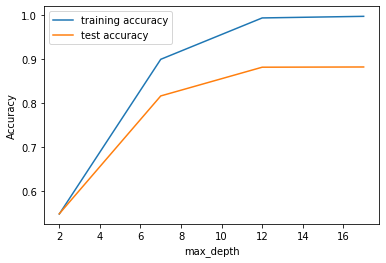

In [240]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning n_estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.
<br>


In [241]:
# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [242]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.822614,0.040678,0.028420,0.007343,100,{'n_estimators': 100},0.697500,0.735000,0.723333,0.733668,0.740369,0.725952,0.015275,4,0.761278,0.749373,0.751462,0.736546,0.749270,0.749586,0.007879
1,4.279994,0.191511,0.124292,0.007481,500,{'n_estimators': 500},0.688333,0.740833,0.725833,0.738693,0.744556,0.727622,0.020654,3,0.762531,0.753342,0.753133,0.745932,0.749896,0.752967,0.005487
2,7.581573,0.397977,0.233370,0.008612,900,{'n_estimators': 900},0.700833,0.742500,0.725833,0.741206,0.742881,0.730628,0.016217,1,0.767753,0.755221,0.751671,0.748227,0.747810,0.754136,0.007316
3,10.974954,0.446536,0.342043,0.012350,1300,{'n_estimators': 1300},0.695000,0.741667,0.725833,0.739531,0.741206,0.728624,0.017819,2,0.762740,0.755639,0.755639,0.746141,0.748436,0.753719,0.005901


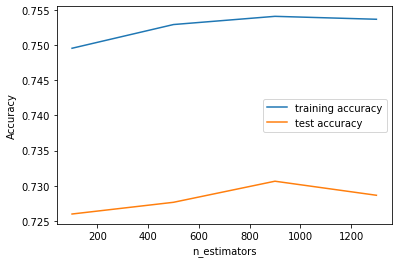

In [243]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [244]:
# GridSearchCV to find optimal max_features

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [245]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.065642,0.008759,0.004803,0.001167,4,{'max_features': 4},0.672500,0.675000,0.700000,0.695980,0.690955,0.686874,0.011137,5,0.730368,0.700710,0.730576,0.714435,0.707343,0.716686,0.012064
1,0.109486,0.012143,0.004203,0.000980,8,{'max_features': 8},0.667500,0.687500,0.700833,0.701005,0.722781,0.695892,0.018164,4,0.728279,0.696324,0.730368,0.716938,0.725490,0.719480,0.012448
2,0.158913,0.011096,0.003806,0.000751,14,{'max_features': 14},0.689167,0.710833,0.716667,0.722781,0.744556,0.716767,0.017914,2,0.753759,0.728070,0.747494,0.736754,0.743221,0.741860,0.008848
3,0.221161,0.011827,0.004003,0.001266,20,{'max_features': 20},0.683333,0.710833,0.713333,0.729481,0.741206,0.715598,0.019580,3,0.735798,0.732665,0.719925,0.746350,0.721527,0.731253,0.009731
4,0.265593,0.033409,0.004402,0.001854,24,{'max_features': 24},0.696667,0.729167,0.709167,0.724456,0.736181,0.719105,0.014312,1,0.742063,0.752297,0.733709,0.728411,0.731539,0.737604,0.008628


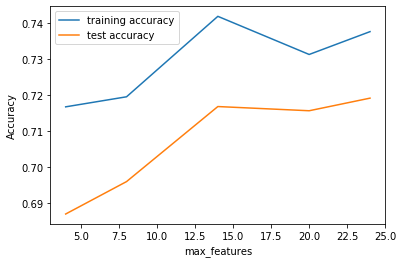

In [246]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Apparently, the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features. Think about why that might be the case.

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [247]:
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [248]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.092869,0.016039,0.003602,0.000490,100,{'min_samples_leaf': 100},0.680833,0.717500,0.716667,0.711893,0.736181,0.712592,0.017926,1,0.742690,0.744152,0.742063,0.736337,0.738632,0.740775,0.002864
1,0.071661,0.002283,0.003403,0.000200,150,{'min_samples_leaf': 150},0.631667,0.718333,0.688333,0.681742,0.711055,0.686206,0.030512,2,0.691103,0.730785,0.709273,0.702962,0.725073,0.711839,0.014488
2,0.074266,0.006936,0.003703,0.000749,200,{'min_samples_leaf': 200},0.665833,0.663333,0.614167,0.647404,0.695980,0.657315,0.026694,3,0.705305,0.691938,0.635547,0.657280,0.674593,0.672933,0.024717
3,0.065646,0.006840,0.003607,0.000494,250,{'min_samples_leaf': 250},0.630000,0.653333,0.603333,0.663317,0.670017,0.643955,0.024444,4,0.672097,0.647034,0.634712,0.663746,0.667501,0.657018,0.013998
4,0.060644,0.002802,0.003607,0.000494,300,{'min_samples_leaf': 300},0.620833,0.645000,0.626667,0.575377,0.662479,0.626086,0.029225,5,0.659566,0.645155,0.635756,0.596579,0.646016,0.636614,0.021409


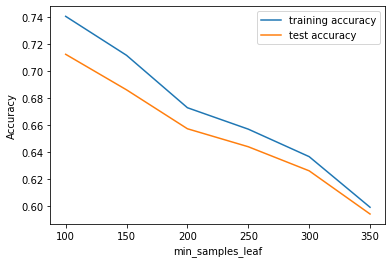

In [249]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that the model starts of overfit as you decrease the value of min_samples_leaf. 

### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [250]:
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [251]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.116282,0.019766,0.004203,0.000980,200,{'min_samples_split': 200},0.733333,0.758333,0.758333,0.745394,0.784757,0.756012,0.017102,1,0.808688,0.791980,0.781119,0.771381,0.785774,0.787789,0.012427
1,0.103285,0.002645,0.003803,0.000401,250,{'min_samples_split': 250},0.672500,0.725833,0.755000,0.722781,0.773869,0.729960,0.034430,2,0.762322,0.759190,0.778404,0.744264,0.767835,0.762403,0.011180
2,0.115082,0.011445,0.005405,0.001201,300,{'min_samples_split': 300},0.699167,0.735000,0.720833,0.726131,0.735343,0.723280,0.013262,3,0.741437,0.761487,0.755430,0.744889,0.718607,0.744370,0.014751
3,0.108573,0.017266,0.004800,0.001695,350,{'min_samples_split': 350},0.666667,0.705833,0.705833,0.705193,0.745394,0.705745,0.024891,4,0.732874,0.726190,0.721178,0.721110,0.735920,0.727454,0.006038
4,0.096884,0.010584,0.004107,0.000490,400,{'min_samples_split': 400},0.675000,0.680000,0.679167,0.676717,0.698492,0.681864,0.008486,5,0.728697,0.696324,0.715121,0.688569,0.690446,0.703831,0.015583


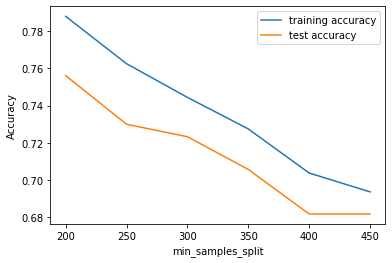

In [252]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using GridSearchCV.

In [268]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [7,12,14],
    'min_samples_leaf': range(50, 100, 150),
    'min_samples_split': range(100, 150, 200),
    'n_estimators': [400, 600, 900], 
    'max_features': [15, 25]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1)

In [269]:
# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 10.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [270]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8231462925851704 using {'max_depth': 14, 'max_features': 25, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 900}


**Fitting the final model with the best parameters obtained from grid search.**

In [271]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=14,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=25,
                             n_estimators=900)

In [272]:
# fit
rfc.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features=25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [273]:
# predict
predictions = rfc.predict(X_test)

In [274]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [275]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       103
           1       0.68      0.67      0.67        42
           2       0.62      0.68      0.65       186
           3       0.79      0.66      0.72       428
           4       0.66      0.75      0.71       219
           5       0.63      0.59      0.61        37

    accuracy                           0.71      1015
   macro avg       0.69      0.71      0.69      1015
weighted avg       0.71      0.71      0.71      1015



In [276]:
print(confusion_matrix(y_test,predictions))

[[ 91   0   0   3   7   2]
 [  2  28  12   0   0   0]
 [  7  13 127  36   3   0]
 [ 19   0  65 283  61   0]
 [  3   0   2  38 165  11]
 [  2   0   0   0  13  22]]


### Unsupervised Learning

In [379]:
print(df_final.shape)
df_final.head()

(3382, 64)


,Provider ID,Hospital overall rating,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_4_SURG_COMP,COMP_HIP_KNEE,HAI_1_SIR,HAI_2_SIR,HAI_3_SIR,HAI_4_SIR,HAI_5_SIR,HAI_6_SIR,PSI_90_SAFETY,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_4_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,IMM_2,IMM_3_OP_27_FAC_ADHPCT,OP_22,OP_23,OP_29,OP_30,OP_4,PC_01,STK_1,STK_5,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5,ED_1b,ED_2b,OP_18b,OP_20,OP_21,OP_3b,OP_5,OP_10,OP_11,OP_13,OP_14,OP_8
0,10001,3,1.249254,-0.995579,-1.093980,-0.165533,0.427653,-0.282009,-1.711558e+00,-1.354968,-2.351227,-2.087871e+00,-1.134824,-6.104930e-16,0.646805,5.664079e-02,1.210759,0.408636,-0.614857,-0.866788,0.370373,-0.884008,0.215383,-1.105347,-0.124545,-0.852686,-0.523545,0.041177,-1.199873,-0.606383,-0.415225,0.027637,0.164883,0.084187,0.968547,0.450029,3.638090e-01,-0.233089,-1.201289,0.000000,0.000000e+00,0.071061,0.000000,6.584300e-16,0.352348,-2.489803e-02,0.445919,-5.699535e-01,0.333795,0.381111,-2.776737e-01,-2.536127e-01,0.089247,0.508286,-1.265605,-2.413565,-2.586986,0.0,0.000000,0.250738,0.388644,-1.199985e+00,0.207497,0.299604
1,10005,3,-1.545741,0.000000,0.433948,-2.286130,-2.103406,-0.342103,-2.297783e+00,0.074460,-1.023000,5.002750e-02,0.722932,0.000000e+00,-0.456856,7.984215e-01,0.230418,0.199928,0.000000,1.574335,0.036448,-1.968080,0.820556,0.495580,-0.776969,-1.111599,-0.129172,0.859592,-0.290031,0.166720,0.284507,0.308654,-0.183346,0.391502,0.577224,0.221265,5.302021e-01,-0.099014,-0.108298,0.783148,6.920441e-01,0.500206,0.545747,3.239793e-01,0.220794,1.932427e-01,-0.915350,7.212282e-16,0.178318,-0.450285,7.583993e-16,2.959931e-16,0.341500,0.462769,0.615752,-0.048967,-0.379753,0.0,-0.714375,-0.423442,-1.203647,-3.051723e-01,-0.648977,-0.378309
2,10006,2,-2.104740,-0.880934,0.883338,-2.354537,-0.861754,-1.784350,1.651503e-15,-1.354968,0.389466,-3.572962e-01,0.818073,0.000000e+00,-0.311757,5.887034e-01,-0.115585,0.826052,-0.703595,0.156909,0.904652,-0.703330,0.215383,-0.548503,0.527879,-1.111599,-0.129172,0.859592,-0.517492,-0.219832,-0.181981,-1.096430,-0.531575,-1.145072,0.577224,-0.922555,-2.447244e-16,0.169136,0.438198,0.000000,-1.016224e-01,0.328548,0.000000,6.584300e-16,0.352348,1.932427e-01,0.198415,-2.957634e-01,0.411533,-1.281682,-8.871535e-01,-7.585273e-02,0.593753,0.356560,0.234718,1.008879,-0.266562,0.0,0.000000,-0.276881,-0.244848,8.698819e-16,-0.970155,-0.782173
3,10007,3,0.000000,0.000000,-1.093980,-1.533660,-1.148289,-1.003133,0.000000e+00,0.000000,0.000000,-4.786852e-17,0.000000,0.000000e+00,0.000000,-6.389551e-16,0.576421,0.000000,0.000000,0.078163,0.570727,0.000000,-1.237030,-0.130870,-0.124545,0.441879,-0.129172,1.678007,0.392350,0.553271,0.750996,-0.253380,0.164883,-0.530442,1.751192,-0.465027,5.302021e-01,-2.110140,0.438198,0.000000,3.388396e-16,-3.447929,-1.232279,0.000000e+00,-2.147170,4.127697e-16,-3.019130,0.000000e+00,0.333795,0.381111,0.000000e+00,0.000000e+00,0.574349,0.508286,0.568123,-0.733456,-2.077625,0.0,0.247960,-1.498222,-0.501669,0.000000e+00,0.000000,0.000000
4,10008,3,0.000000,0.000000,-0.105321,-0.370752,0.332141,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,4.488913e-01,-0.057918,0.000000,0.000000,0.629384,-0.764971,0.000000,-0.147720,0.774002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.974159e-01,-2.780515,0.438198,0.000000,8.363471e-01,0.714779,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.489272,0.000000,0.000000e+00,0.000000e+00,0.952728,0.690358,1.068231,-0.048967,0.242800,0.0,0.000000,0.524318,0.000000,0.000000e+00,1.171030,0.000000


In [380]:
# creating copy of the final hv_user dataframe
df_final_PCA_UL = df_final.copy()

# removing the columns not required for modeling
df_final_PCA_UL.drop(['Provider ID'], axis=1, inplace=True)

In [381]:
from sklearn.model_selection import train_test_split

#putting features variables in X
X = df_final_PCA_UL.drop(['Hospital overall rating'], axis=1)

#putting response variables in Y
y = df_final_PCA_UL['Hospital overall rating']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [383]:
#Importing the PCA module

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [384]:
#Doing the PCA on the train data

pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [385]:
pca.explained_variance_ratio_[:80]

array([0.18472101, 0.06220019, 0.05921415, 0.04736597, 0.04089203,
       0.02674681, 0.02622354, 0.02175678, 0.02116692, 0.02020484,
       0.01884266, 0.01807273, 0.01788233, 0.0157915 , 0.01515988,
       0.01473984, 0.01441931, 0.01415237, 0.01402   , 0.01351308,
       0.01346546, 0.01314911, 0.01248032, 0.01231636, 0.01209483,
       0.01182396, 0.01163405, 0.01160379, 0.01124957, 0.0108996 ,
       0.01061638, 0.01045923, 0.01037349, 0.01001877, 0.00975145,
       0.00941815, 0.00932106, 0.00919367, 0.00907332, 0.00862602,
       0.00847287, 0.0082023 , 0.00808121, 0.00774433, 0.00738948,
       0.00733437, 0.00690634, 0.00664912, 0.00641333, 0.00614942,
       0.00584999, 0.00533683, 0.00493085, 0.00468831, 0.00377491,
       0.00361305, 0.00349738, 0.00299877, 0.00286246, 0.00236916,
       0.001129  , 0.00095199])

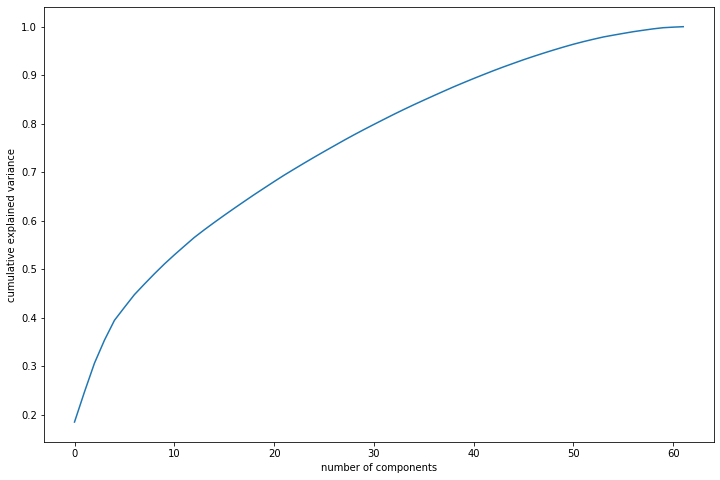

In [386]:
#Making the screeplot - plotting the cumulative variance against the number of components

%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [387]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=45)

In [389]:
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(2367, 45)

In [390]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.014758501001359713 , min corr:  -0.01106717325516486


In [392]:

#Applying selected components to the test data - 50 components

X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(1015, 45)

#### After PCA we are left with 45 features 

In [393]:
# k-means with some arbitrary k

# As we have to rate hosptials from 1 to 5 we will take n_clusters = 5 

kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(X_train_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [394]:
len(kmeans.labels_)

2367

In [396]:
score = metrics.accuracy_score(y_test,kmeans.predict(X_test_pca))
print('Accuracy:{0:f}'.format(score))

Accuracy:0.337931


In [399]:
print(kmeans.predict(X_test_pca))

[1 2 3 ... 3 3 3]


In [401]:
print(kmeans.labels_)
print(y_test)

[4 0 2 ... 0 4 3]
641     4
375     3
264     2
2906    1
1727    3
751     4
3381    3
1341    3
2086    4
3342    3
146     0
2585    5
3267    5
5       2
4804    0
839     3
1198    1
2942    3
1150    2
376     4
2313    3
3580    4
3007    3
4621    3
806     3
2877    3
1230    3
629     4
426     5
4503    3
858     2
2515    4
361     3
3590    2
2443    3
2087    2
387     2
4421    2
3677    0
2458    3
122     4
1567    3
1807    4
3039    3
3339    2
4376    3
1819    3
2695    4
1706    3
2865    3
       ..
2944    3
331     3
2007    4
2571    3
3719    0
2747    2
1583    0
3050    3
2180    4
2319    4
3397    0
80      3
1930    0
3214    2
2785    2
142     2
4464    2
4315    4
206     2
2061    4
3194    5
775     2
1853    0
3550    3
1204    4
3235    3
1843    0
3535    4
4030    3
3748    3
2009    5
329     1
74      3
4761    3
2919    3
1122    2
1951    0
3788    0
4176    4
2973    2
1568    3
843     3
3617    4
1710    3
1324    3
3153    4
3276    0
60

In [1]:
## Recommendations The Key measures for improvement are:
#i)  Readmission
#ii) Patient Experience
#iii) Safety